In [1]:
!pip install soundfile

In [1]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

In [2]:
#DataFlair - Emotions in the RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "ps"
}

# Define the emotions available in all datasets
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy",
    "fear",
    "disgust",
    "ps"
    
}

In [3]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result


In [4]:
# Function to load data from multiple datasets
def load_data(data_paths, test_size=0.2):
    X, y = [], []
    for data_path in data_paths:
        for file in glob.glob(os.path.join(data_path, "*.wav")):
            # get the base name of the audio file
            basename = os.path.basename(file)
            # print the file name for debugging
            print("Processing file:", basename)
            
            # Dynamically identify the emotion label from the file name
            emotion = None
            for label in int2emotion.values():
                if label.lower() in basename.lower():
                    emotion = label
                    break
            
            # If emotion is not found, skip the file
            if emotion is None:
                print("Error extracting emotion from:", basename)
                continue
            
            # we allow only AVAILABLE_EMOTIONS we set
            if emotion not in AVAILABLE_EMOTIONS:
                continue
            
            # extract speech features
            features = extract_feature(file, mfcc=True, chroma=True, mel=True)
            # add to data
            X.append(features)
            l={'angry':1,'sad':2,'neutral':3,'happy':4,'fear':5,'disgust':6,'ps':7}
            y.append(l[emotion])
    
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)


In [5]:
data_paths = [
     "C:\\Users\\Desktop\\Train data\\Ravdess data\\Actor_*",
    "C:\\Users\\Desktop\\Train data\\Tess data",
    "C:\\Users\\Desktop\\Train data\\wav",
    "C:\\Users\\Desktop\\Train data\\ESR_data",
    "C:\\Users\\Desktop\\Train data\\data1",
   
   
]

In [6]:
X_train, X_test, y_train, y_test = load_data(data_paths,test_size=0.25)


Processing file: 01_01_01_01_dogs-sitting_disgust.wav
Processing file: 01_01_01_01_dogs-sitting_fear.wav
Processing file: 01_01_01_01_dogs-sitting_neutral.wav
Processing file: 01_01_01_01_dogs-sitting_ps.wav
Processing file: 01_01_01_01_dogs-sitting_sad.wav
Processing file: 01_01_01_01_kids-talking_angry.wav
Processing file: 01_01_01_01_kids-talking_disgust.wav
Processing file: 01_01_01_01_kids-talking_fear.wav
Processing file: 01_01_01_01_kids-talking_happy.wav
Processing file: 01_01_01_01_kids-talking_neutral.wav
Processing file: 01_01_01_01_kids-talking_ps.wav
Processing file: 01_01_01_01_kids-talking_sad.wav
Processing file: 01_01_01_02_dogs-sitting_angry.wav
Processing file: 01_01_01_02_dogs-sitting_disgust.wav
Processing file: 01_01_01_02_dogs-sitting_fear.wav
Processing file: 01_01_01_02_dogs-sitting_happy.wav
Processing file: 01_01_01_02_dogs-sitting_neutral.wav
Processing file: 01_01_01_02_dogs-sitting_ps.wav
Processing file: 01_01_01_02_dogs-sitting_sad.wav
Processing file: 0

Processing file: 02_01_02_01_dogs-sitting_happy.wav
Processing file: 02_01_02_01_dogs-sitting_ps.wav
Processing file: 02_01_02_01_dogs-sitting_sad.wav
Processing file: 02_01_02_01_kids-talking_angry.wav
Processing file: 02_01_02_01_kids-talking_disgust.wav
Processing file: 02_01_02_01_kids-talking_fear.wav
Processing file: 02_01_02_01_kids-talking_happy.wav
Processing file: 02_01_02_01_kids-talking_ps.wav
Processing file: 02_01_02_01_kids-talking_sad.wav
Processing file: 02_01_02_02_dogs-sitting_angry.wav
Processing file: 02_01_02_02_dogs-sitting_disgust.wav
Processing file: 02_01_02_02_dogs-sitting_fear.wav
Processing file: 02_01_02_02_dogs-sitting_happy.wav
Processing file: 02_01_02_02_dogs-sitting_ps.wav
Processing file: 02_01_02_02_dogs-sitting_sad.wav
Processing file: 02_01_02_02_kids-talking_angry.wav
Processing file: 02_01_02_02_kids-talking_disgust.wav
Processing file: 02_01_02_02_kids-talking_fear.wav
Processing file: 02_01_02_02_kids-talking_happy.wav
Processing file: 02_01_0

Processing file: 03_01_01_01_kids-talking_fear.wav
Processing file: 03_01_01_01_kids-talking_happy.wav
Processing file: 03_01_01_01_kids-talking_neutral.wav
Processing file: 03_01_01_01_kids-talking_ps.wav
Processing file: 03_01_01_01_kids-talking_sad.wav
Processing file: 03_01_01_02_dogs-sitting_angry.wav
Processing file: 03_01_01_02_dogs-sitting_disgust.wav
Processing file: 03_01_01_02_dogs-sitting_fear.wav
Processing file: 03_01_01_02_dogs-sitting_happy.wav
Processing file: 03_01_01_02_dogs-sitting_neutral.wav
Processing file: 03_01_01_02_dogs-sitting_ps.wav
Processing file: 03_01_01_02_dogs-sitting_sad.wav
Processing file: 03_01_01_02_kids-talking_angry.wav
Processing file: 03_01_01_02_kids-talking_disgust.wav
Processing file: 03_01_01_02_kids-talking_fear.wav
Processing file: 03_01_01_02_kids-talking_happy.wav
Processing file: 03_01_01_02_kids-talking_neutral.wav
Processing file: 03_01_01_02_kids-talking_ps.wav
Processing file: 03_01_01_02_kids-talking_sad.wav
Processing file: 03_

Processing file: 04_01_02_01_kids-talking_angry.wav
Processing file: 04_01_02_01_kids-talking_disgust.wav
Processing file: 04_01_02_01_kids-talking_fear.wav
Processing file: 04_01_02_01_kids-talking_happy.wav
Processing file: 04_01_02_01_kids-talking_ps.wav
Processing file: 04_01_02_01_kids-talking_sad.wav
Processing file: 04_01_02_02_dogs-sitting_angry.wav
Processing file: 04_01_02_02_dogs-sitting_disgust.wav
Processing file: 04_01_02_02_dogs-sitting_fear.wav
Processing file: 04_01_02_02_dogs-sitting_happy.wav
Processing file: 04_01_02_02_dogs-sitting_ps.wav
Processing file: 04_01_02_02_dogs-sitting_sad.wav
Processing file: 04_01_02_02_kids-talking_angry.wav
Processing file: 04_01_02_02_kids-talking_disgust.wav
Processing file: 04_01_02_02_kids-talking_fear.wav
Processing file: 04_01_02_02_kids-talking_happy.wav
Processing file: 04_01_02_02_kids-talking_ps.wav
Processing file: 04_01_02_02_kids-talking_sad.wav
Processing file: 04_02_01_01_dogs-sitting_angry.wav
Processing file: 04_02_0

Processing file: 05_02_01_02_dogs-sitting_angry.wav
Processing file: 05_02_01_02_dogs-sitting_fear.wav
Processing file: 05_02_01_02_dogs-sitting_happy.wav
Processing file: 05_02_01_02_dogs-sitting_neutral.wav
Processing file: 05_02_01_02_dogs-sitting_sad.wav
Processing file: 05_02_01_02_kids-talking_angry.wav
Processing file: 05_02_01_02_kids-talking_fear.wav
Processing file: 05_02_01_02_kids-talking_happy.wav
Processing file: 05_02_01_02_kids-talking_neutral.wav
Processing file: 05_02_01_02_kids-talking_sad.wav
Processing file: 05_02_02_01_dogs-sitting_angry.wav
Processing file: 05_02_02_01_dogs-sitting_fear.wav
Processing file: 05_02_02_01_dogs-sitting_happy.wav
Processing file: 05_02_02_01_dogs-sitting_sad.wav
Processing file: 05_02_02_01_kids-talking_angry.wav
Processing file: 05_02_02_01_kids-talking_fear.wav
Processing file: 05_02_02_01_kids-talking_happy.wav
Processing file: 05_02_02_01_kids-talking_sad.wav
Processing file: 05_02_02_02_dogs-sitting_angry.wav
Processing file: 05_

Processing file: 07_01_01_01_dogs-sitting_disgust.wav
Processing file: 07_01_01_01_dogs-sitting_fear.wav
Processing file: 07_01_01_01_dogs-sitting_happy.wav
Processing file: 07_01_01_01_dogs-sitting_neutral.wav
Processing file: 07_01_01_01_dogs-sitting_ps.wav
Processing file: 07_01_01_01_dogs-sitting_sad.wav
Processing file: 07_01_01_01_kids-talking_angry.wav
Processing file: 07_01_01_01_kids-talking_disgust.wav
Processing file: 07_01_01_01_kids-talking_fear.wav
Processing file: 07_01_01_01_kids-talking_happy.wav
Processing file: 07_01_01_01_kids-talking_neutral.wav
Processing file: 07_01_01_01_kids-talking_ps.wav
Processing file: 07_01_01_01_kids-talking_sad.wav
Processing file: 07_01_01_02_dogs-sitting_angry.wav
Processing file: 07_01_01_02_dogs-sitting_disgust.wav
Processing file: 07_01_01_02_dogs-sitting_fear.wav
Processing file: 07_01_01_02_dogs-sitting_happy.wav
Processing file: 07_01_01_02_dogs-sitting_neutral.wav
Processing file: 07_01_01_02_dogs-sitting_ps.wav
Processing file:

Processing file: 08_02_01_01_kids-talking_fear.wav
Processing file: 08_02_01_01_kids-talking_happy.wav
Processing file: 08_02_01_01_kids-talking_neutral.wav
Processing file: 08_02_01_01_kids-talking_sad.wav
Processing file: 08_02_01_02_dogs-sitting_angry.wav
Processing file: 08_02_01_02_dogs-sitting_fear.wav
Processing file: 08_02_01_02_dogs-sitting_happy.wav
Processing file: 08_02_01_02_dogs-sitting_neutral.wav
Processing file: 08_02_01_02_dogs-sitting_sad.wav
Processing file: 08_02_01_02_kids-talking_angry.wav
Processing file: 08_02_01_02_kids-talking_fear.wav
Processing file: 08_02_01_02_kids-talking_happy.wav
Processing file: 08_02_01_02_kids-talking_neutral.wav
Processing file: 08_02_01_02_kids-talking_sad.wav
Processing file: 08_02_02_01_dogs-sitting_angry.wav
Processing file: 08_02_02_01_dogs-sitting_fear.wav
Processing file: 08_02_02_01_dogs-sitting_happy.wav
Processing file: 08_02_02_01_dogs-sitting_sad.wav
Processing file: 08_02_02_01_kids-talking_angry.wav
Processing file: 0

Processing file: 10_01_01_02_dogs-sitting_disgust.wav
Processing file: 10_01_01_02_dogs-sitting_fear.wav
Processing file: 10_01_01_02_dogs-sitting_happy.wav
Processing file: 10_01_01_02_dogs-sitting_neutral.wav
Processing file: 10_01_01_02_dogs-sitting_ps.wav
Processing file: 10_01_01_02_dogs-sitting_sad.wav
Processing file: 10_01_01_02_kids-talking_angry.wav
Processing file: 10_01_01_02_kids-talking_disgust.wav
Processing file: 10_01_01_02_kids-talking_fear.wav
Processing file: 10_01_01_02_kids-talking_happy.wav
Processing file: 10_01_01_02_kids-talking_neutral.wav
Processing file: 10_01_01_02_kids-talking_ps.wav
Processing file: 10_01_01_02_kids-talking_sad.wav
Processing file: 10_01_02_01_dogs-sitting_angry.wav
Processing file: 10_01_02_01_dogs-sitting_disgust.wav
Processing file: 10_01_02_01_dogs-sitting_fear.wav
Processing file: 10_01_02_01_dogs-sitting_happy.wav
Processing file: 10_01_02_01_dogs-sitting_ps.wav
Processing file: 10_01_02_01_dogs-sitting_sad.wav
Processing file: 10_

Processing file: 11_01_02_02_dogs-sitting_angry.wav
Processing file: 11_01_02_02_dogs-sitting_disgust.wav
Processing file: 11_01_02_02_dogs-sitting_fear.wav
Processing file: 11_01_02_02_dogs-sitting_happy.wav
Processing file: 11_01_02_02_dogs-sitting_ps.wav
Processing file: 11_01_02_02_dogs-sitting_sad.wav
Processing file: 11_01_02_02_kids-talking_angry.wav
Processing file: 11_01_02_02_kids-talking_disgust.wav
Processing file: 11_01_02_02_kids-talking_fear.wav
Processing file: 11_01_02_02_kids-talking_happy.wav
Processing file: 11_01_02_02_kids-talking_ps.wav
Processing file: 11_01_02_02_kids-talking_sad.wav
Processing file: 11_02_01_01_dogs-sitting_angry.wav
Processing file: 11_02_01_01_dogs-sitting_fear.wav
Processing file: 11_02_01_01_dogs-sitting_happy.wav
Processing file: 11_02_01_01_dogs-sitting_neutral.wav
Processing file: 11_02_01_01_dogs-sitting_sad.wav
Processing file: 11_02_01_01_kids-talking_angry.wav
Processing file: 11_02_01_01_kids-talking_fear.wav
Processing file: 11_02

Processing file: 12_02_01_02_kids-talking_angry.wav
Processing file: 12_02_01_02_kids-talking_fear.wav
Processing file: 12_02_01_02_kids-talking_happy.wav
Processing file: 12_02_01_02_kids-talking_neutral.wav
Processing file: 12_02_01_02_kids-talking_sad.wav
Processing file: 12_02_02_01_dogs-sitting_angry.wav
Processing file: 12_02_02_01_dogs-sitting_fear.wav
Processing file: 12_02_02_01_dogs-sitting_happy.wav
Processing file: 12_02_02_01_dogs-sitting_sad.wav
Processing file: 12_02_02_01_kids-talking_angry.wav
Processing file: 12_02_02_01_kids-talking_fear.wav
Processing file: 12_02_02_01_kids-talking_happy.wav
Processing file: 12_02_02_01_kids-talking_sad.wav
Processing file: 12_02_02_02_dogs-sitting_angry.wav
Processing file: 12_02_02_02_dogs-sitting_fear.wav
Processing file: 12_02_02_02_dogs-sitting_happy.wav
Processing file: 12_02_02_02_dogs-sitting_sad.wav
Processing file: 12_02_02_02_kids-talking_angry.wav
Processing file: 12_02_02_02_kids-talking_fear.wav
Processing file: 12_02_

Processing file: 03-02-03-01-02-01-14_happy.wav
Processing file: 03-02-03-01-02-02-14_happy.wav
Processing file: 03-02-03-02-01-01-14_happy.wav
Processing file: 03-02-03-02-01-02-14_happy.wav
Processing file: 03-02-03-02-02-01-14_happy.wav
Processing file: 03-02-03-02-02-02-14_happy.wav
Processing file: 03-02-04-01-01-01-14_sad.wav
Processing file: 03-02-04-01-01-02-14_sad.wav
Processing file: 03-02-04-01-02-01-14_sad.wav
Processing file: 03-02-04-01-02-02-14_sad.wav
Processing file: 03-02-04-02-01-01-14_sad.wav
Processing file: 03-02-04-02-01-02-14_sad.wav
Processing file: 03-02-04-02-02-01-14_sad.wav
Processing file: 03-02-04-02-02-02-14_sad.wav
Processing file: 03-02-05-01-01-01-14_angry.wav
Processing file: 03-02-05-01-01-02-14_angry.wav
Processing file: 03-02-05-01-02-01-14_angry.wav
Processing file: 03-02-05-01-02-02-14_angry.wav
Processing file: 03-02-05-02-01-01-14_angry.wav
Processing file: 03-02-05-02-01-02-14_angry.wav
Processing file: 03-02-05-02-02-01-14_angry.wav
Processi

Processing file: 03-02-04-01-01-02-16_sad.wav
Processing file: 03-02-04-01-02-01-16_sad.wav
Processing file: 03-02-04-01-02-02-16_sad.wav
Processing file: 03-02-04-02-01-01-16_sad.wav
Processing file: 03-02-04-02-01-02-16_sad.wav
Processing file: 03-02-04-02-02-01-16_sad.wav
Processing file: 03-02-04-02-02-02-16_sad.wav
Processing file: 03-02-05-01-01-01-16_angry.wav
Processing file: 03-02-05-01-01-02-16_angry.wav
Processing file: 03-02-05-01-02-01-16_angry.wav
Processing file: 03-02-05-01-02-02-16_angry.wav
Processing file: 03-02-05-02-01-01-16_angry.wav
Processing file: 03-02-05-02-01-02-16_angry.wav
Processing file: 03-02-05-02-02-01-16_angry.wav
Processing file: 03-02-05-02-02-02-16_angry.wav
Processing file: 03-02-06-01-01-01-16_fear.wav
Processing file: 03-02-06-01-01-02-16_fear.wav
Processing file: 03-02-06-01-02-01-16_fear.wav
Processing file: 03-02-06-01-02-02-16_fear.wav
Processing file: 03-02-06-02-01-01-16_fear.wav
Processing file: 03-02-06-02-01-02-16_fear.wav
Processing f

Processing file: 18_01_01_02_kids-talking_angry.wav
Processing file: 18_01_01_02_kids-talking_disgust.wav
Processing file: 18_01_01_02_kids-talking_fear.wav
Processing file: 18_01_01_02_kids-talking_happy.wav
Processing file: 18_01_01_02_kids-talking_neutral.wav
Processing file: 18_01_01_02_kids-talking_ps.wav
Processing file: 18_01_01_02_kids-talking_sad.wav
Processing file: 18_01_02_01_dogs-sitting_angry.wav
Processing file: 18_01_02_01_dogs-sitting_disgust.wav
Processing file: 18_01_02_01_dogs-sitting_fear.wav
Processing file: 18_01_02_01_dogs-sitting_happy.wav
Processing file: 18_01_02_01_dogs-sitting_ps.wav
Processing file: 18_01_02_01_dogs-sitting_sad.wav
Processing file: 18_01_02_01_kids-talking_angry.wav
Processing file: 18_01_02_01_kids-talking_disgust.wav
Processing file: 18_01_02_01_kids-talking_fear.wav
Processing file: 18_01_02_01_kids-talking_happy.wav
Processing file: 18_01_02_01_kids-talking_ps.wav
Processing file: 18_01_02_01_kids-talking_sad.wav
Processing file: 18_01

Processing file: 19_02_02_02_dogs-sitting_sad.wav
Processing file: 19_02_02_02_kids-talking_angry.wav
Processing file: 19_02_02_02_kids-talking_fear.wav
Processing file: 19_02_02_02_kids-talking_happy.wav
Processing file: 19_02_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-20_calm.wav
Processing file: 03-01-02-01-01-02-20_calm.wav
Processing file: 03-01-02-01-02-01-20_calm.wav
Processing file: 03-01-02-01-02-02-20_calm.wav
Processing file: 03-01-02-02-01-01-20_calm.wav
Processing file: 03-01-02-02-01-02-20_calm.wav
Processing file: 03-01-02-02-02-01-20_calm.wav
Processing file: 03-01-02-02-02-02-20_calm.wav
Processing file: 03-02-01-01-01-01-20_neutral.wav
Processing file: 03-02-01-01-01-02-20_neutral.wav
Processing file: 03-02-01-01-02-01-20_neutral.wav
Processing file: 03-02-01-01-02-02-20_neutral.wav
Processing file: 03-02-02-01-01-01-20_calm.wav
Processing file: 03-02-02-01-01-02-20_calm.wav
Processing file: 03-02-02-01-02-01-20_calm.wav
Processing file: 03-02-02-01

Processing file: 21_01_01_01_kids-talking_fear.wav
Processing file: 21_01_01_01_kids-talking_happy.wav
Processing file: 21_01_01_01_kids-talking_neutral.wav
Processing file: 21_01_01_01_kids-talking_ps.wav
Processing file: 21_01_01_01_kids-talking_sad.wav
Processing file: 21_01_01_02_dogs-sitting_angry.wav
Processing file: 21_01_01_02_dogs-sitting_disgust.wav
Processing file: 21_01_01_02_dogs-sitting_fear.wav
Processing file: 21_01_01_02_dogs-sitting_happy.wav
Processing file: 21_01_01_02_dogs-sitting_neutral.wav
Processing file: 21_01_01_02_dogs-sitting_ps.wav
Processing file: 21_01_01_02_dogs-sitting_sad.wav
Processing file: 21_01_01_02_kids-talking_angry.wav
Processing file: 21_01_01_02_kids-talking_disgust.wav
Processing file: 21_01_01_02_kids-talking_fear.wav
Processing file: 21_01_01_02_kids-talking_happy.wav
Processing file: 21_01_01_02_kids-talking_neutral.wav
Processing file: 21_01_01_02_kids-talking_ps.wav
Processing file: 21_01_01_02_kids-talking_sad.wav
Processing file: 21_

Processing file: 03-02-03-02-01-01-23_happy.wav
Processing file: 03-02-03-02-01-02-23_happy.wav
Processing file: 03-02-03-02-02-01-23_happy.wav
Processing file: 03-02-03-02-02-02-23_happy.wav
Processing file: 03-02-04-01-01-01-23_sad.wav
Processing file: 03-02-04-01-01-02-23_sad.wav
Processing file: 03-02-04-01-02-01-23_sad.wav
Processing file: 03-02-04-01-02-02-23_sad.wav
Processing file: 03-02-04-02-01-01-23_sad.wav
Processing file: 03-02-04-02-01-02-23_sad.wav
Processing file: 03-02-04-02-02-01-23_sad.wav
Processing file: 03-02-04-02-02-02-23_sad.wav
Processing file: 03-02-05-01-01-01-23_angry.wav
Processing file: 03-02-05-01-01-02-23_angry.wav
Processing file: 03-02-05-01-02-01-23_angry.wav
Processing file: 03-02-05-01-02-02-23_angry.wav
Processing file: 03-02-05-02-01-01-23_angry.wav
Processing file: 03-02-05-02-01-02-23_angry.wav
Processing file: 03-02-05-02-02-01-23_angry.wav
Processing file: 03-02-05-02-02-02-23_angry.wav
Processing file: 03-02-06-01-01-01-23_fear.wav
Processin

Processing file: 24_01_02_01_kids-talking_disgust.wav
Processing file: 24_01_02_01_kids-talking_fear.wav
Processing file: 24_01_02_01_kids-talking_happy.wav
Processing file: 24_01_02_01_kids-talking_ps.wav
Processing file: 24_01_02_01_kids-talking_sad.wav
Processing file: 24_01_02_02_dogs-sitting_angry.wav
Processing file: 24_01_02_02_dogs-sitting_disgust.wav
Processing file: 24_01_02_02_dogs-sitting_fear.wav
Processing file: 24_01_02_02_dogs-sitting_happy.wav
Processing file: 24_01_02_02_dogs-sitting_ps.wav
Processing file: 24_01_02_02_dogs-sitting_sad.wav
Processing file: 24_01_02_02_kids-talking_angry.wav
Processing file: 24_01_02_02_kids-talking_disgust.wav
Processing file: 24_01_02_02_kids-talking_fear.wav
Processing file: 24_01_02_02_kids-talking_happy.wav
Processing file: 24_01_02_02_kids-talking_ps.wav
Processing file: 24_01_02_02_kids-talking_sad.wav
Processing file: 24_02_01_01_dogs-sitting_angry.wav
Processing file: 24_02_01_01_dogs-sitting_fear.wav
Processing file: 24_02_01

Processing file: 25_01_01_01_haze_angry.wav
Processing file: 25_01_01_01_haze_disgust.wav
Processing file: 25_01_01_01_haze_fear.wav
Processing file: 25_01_01_01_haze_happy.wav
Processing file: 25_01_01_01_haze_neutral.wav
Processing file: 25_01_01_01_haze_ps.wav
Processing file: 25_01_01_01_haze_sad.wav
Processing file: 25_01_01_01_hire_angry.wav
Processing file: 25_01_01_01_hire_disgust.wav
Processing file: 25_01_01_01_hire_fear.wav
Processing file: 25_01_01_01_hire_happy.wav
Processing file: 25_01_01_01_hire_neutral.wav
Processing file: 25_01_01_01_hire_ps.wav
Processing file: 25_01_01_01_hire_sad.wav
Processing file: 25_01_01_01_hit_angry.wav
Processing file: 25_01_01_01_hit_disgust.wav
Processing file: 25_01_01_01_hit_fear.wav
Processing file: 25_01_01_01_hit_happy.wav
Processing file: 25_01_01_01_hit_neutral.wav
Processing file: 25_01_01_01_hit_ps.wav
Processing file: 25_01_01_01_hit_sad.wav
Processing file: 25_01_01_01_hole_angry.wav
Processing file: 25_01_01_01_hole_disgust.wav

Processing file: 25_01_01_01_life_angry.wav
Processing file: 25_01_01_01_life_disgust.wav
Processing file: 25_01_01_01_life_fear.wav
Processing file: 25_01_01_01_life_happy.wav
Processing file: 25_01_01_01_life_neutral.wav
Processing file: 25_01_01_01_life_ps.wav
Processing file: 25_01_01_01_life_sad.wav
Processing file: 25_01_01_01_limb_angry.wav
Processing file: 25_01_01_01_limb_disgust.wav
Processing file: 25_01_01_01_limb_fear.wav
Processing file: 25_01_01_01_limb_happy.wav
Processing file: 25_01_01_01_limb_neutral.wav
Processing file: 25_01_01_01_limb_ps.wav
Processing file: 25_01_01_01_limb_sad.wav
Processing file: 25_01_01_01_live_angry.wav
Processing file: 25_01_01_01_live_disgust.wav
Processing file: 25_01_01_01_live_fear.wav
Processing file: 25_01_01_01_live_happy.wav
Processing file: 25_01_01_01_live_neutral.wav
Processing file: 25_01_01_01_live_ps.wav
Processing file: 25_01_01_01_live_sad.wav
Processing file: 25_01_01_01_loaf_angry.wav
Processing file: 25_01_01_01_loaf_disg

Processing file: 25_01_01_01_numb_happy.wav
Processing file: 25_01_01_01_numb_neutral.wav
Processing file: 25_01_01_01_numb_ps.wav
Processing file: 25_01_01_01_numb_sad.wav
Processing file: 25_01_01_01_pad_angry.wav
Processing file: 25_01_01_01_pad_disgust.wav
Processing file: 25_01_01_01_pad_fear.wav
Processing file: 25_01_01_01_pad_happy.wav
Processing file: 25_01_01_01_pad_neutral.wav
Processing file: 25_01_01_01_pad_ps.wav
Processing file: 25_01_01_01_pad_sad.wav
Processing file: 25_01_01_01_page_angry.wav
Processing file: 25_01_01_01_page_disgust.wav
Processing file: 25_01_01_01_page_fear.wav
Processing file: 25_01_01_01_page_happy.wav
Processing file: 25_01_01_01_page_neutral.wav
Processing file: 25_01_01_01_page_ps.wav
Processing file: 25_01_01_01_page_sad.wav
Processing file: 25_01_01_01_pain_angry.wav
Processing file: 25_01_01_01_pain_disgust.wav
Processing file: 25_01_01_01_pain_fear.wav
Processing file: 25_01_01_01_pain_happy.wav
Processing file: 25_01_01_01_pain_neutral.wav

Processing file: 25_01_01_01_rough_ps.wav
Processing file: 25_01_01_01_rough_sad.wav
Processing file: 25_01_01_01_rush_angry.wav
Processing file: 25_01_01_01_rush_disgust.wav
Processing file: 25_01_01_01_rush_fear.wav
Processing file: 25_01_01_01_rush_happy.wav
Processing file: 25_01_01_01_rush_neutral.wav
Processing file: 25_01_01_01_rush_ps.wav
Processing file: 25_01_01_01_rush_sad.wav
Processing file: 25_01_01_01_said_angry.wav
Processing file: 25_01_01_01_said_disgust.wav
Processing file: 25_01_01_01_said_fear.wav
Processing file: 25_01_01_01_said_happy.wav
Processing file: 25_01_01_01_said_neutral.wav
Processing file: 25_01_01_01_said_ps.wav
Processing file: 25_01_01_01_said_sad.wav
Processing file: 25_01_01_01_sail_angry.wav
Processing file: 25_01_01_01_sail_disgust.wav
Processing file: 25_01_01_01_sail_fear.wav
Processing file: 25_01_01_01_sail_happy.wav
Processing file: 25_01_01_01_sail_neutral.wav
Processing file: 25_01_01_01_sail_ps.wav
Processing file: 25_01_01_01_sail_sad.w

Processing file: 25_01_01_01_third_happy.wav
Processing file: 25_01_01_01_third_neutral.wav
Processing file: 25_01_01_01_third_ps.wav
Processing file: 25_01_01_01_third_sad.wav
Processing file: 25_01_01_01_thought_angry.wav
Processing file: 25_01_01_01_thought_disgust.wav
Processing file: 25_01_01_01_thought_fear.wav
Processing file: 25_01_01_01_thought_happy.wav
Processing file: 25_01_01_01_thought_neutral.wav
Processing file: 25_01_01_01_thought_ps.wav
Processing file: 25_01_01_01_thought_sad.wav
Processing file: 25_01_01_01_thumb_angry.wav
Processing file: 25_01_01_01_thumb_disgust.wav
Processing file: 25_01_01_01_thumb_fear.wav
Processing file: 25_01_01_01_thumb_happy.wav
Processing file: 25_01_01_01_thumb_neutral.wav
Processing file: 25_01_01_01_thumb_ps.wav
Processing file: 25_01_01_01_thumb_sad.wav
Processing file: 25_01_01_01_time_angry.wav
Processing file: 25_01_01_01_time_disgust.wav
Processing file: 25_01_01_01_time_fear.wav
Processing file: 25_01_01_01_time_happy.wav
Proces

Processing file: 25_01_01_01_young_angry.wav
Processing file: 25_01_01_01_young_disgust.wav
Processing file: 25_01_01_01_young_fear.wav
Processing file: 25_01_01_01_young_neutral.wav
Processing file: 25_01_01_01_young_ps.wav
Processing file: 25_01_01_01_young_sad.wav
Processing file: 25_01_01_01_youth_angry.wav
Processing file: 25_01_01_01_youth_disgust.wav
Processing file: 25_01_01_01_youth_fear.wav
Processing file: 25_01_01_01_youth_neutral.wav
Processing file: 25_01_01_01_youth_ps.wav
Processing file: 25_01_01_01_youth_sad.wav
Processing file: 26_01_01_01_back_angry.wav
Processing file: 26_01_01_01_back_disgust.wav
Processing file: 26_01_01_01_back_fear.wav
Processing file: 26_01_01_01_back_happy.wav
Processing file: 26_01_01_01_back_neutral.wav
Processing file: 26_01_01_01_back_ps.wav
Processing file: 26_01_01_01_back_sad.wav
Processing file: 26_01_01_01_bar_angry.wav
Processing file: 26_01_01_01_bar_disgust.wav
Processing file: 26_01_01_01_bar_fear.wav
Processing file: 26_01_01_01

Processing file: 26_01_01_01_dead_ps.wav
Processing file: 26_01_01_01_dead_sad.wav
Processing file: 26_01_01_01_death_angry.wav
Processing file: 26_01_01_01_death_disgust.wav
Processing file: 26_01_01_01_death_fear.wav
Processing file: 26_01_01_01_death_happy.wav
Processing file: 26_01_01_01_death_neutral.wav
Processing file: 26_01_01_01_death_ps.wav
Processing file: 26_01_01_01_death_sad.wav
Processing file: 26_01_01_01_deep_angry.wav
Processing file: 26_01_01_01_deep_disgust.wav
Processing file: 26_01_01_01_deep_fear.wav
Processing file: 26_01_01_01_deep_happy.wav
Processing file: 26_01_01_01_deep_neutral.wav
Processing file: 26_01_01_01_deep_ps.wav
Processing file: 26_01_01_01_deep_sad.wav
Processing file: 26_01_01_01_dime_angry.wav
Processing file: 26_01_01_01_dime_disgust.wav
Processing file: 26_01_01_01_dime_fear.wav
Processing file: 26_01_01_01_dime_neutral.wav
Processing file: 26_01_01_01_dime_ps.wav
Processing file: 26_01_01_01_dime_sad.wav
Processing file: 26_01_01_01_dip_ang

Processing file: 26_01_01_01_hash_angry.wav
Processing file: 26_01_01_01_hash_disgust.wav
Processing file: 26_01_01_01_hash_fear.wav
Processing file: 26_01_01_01_hash_happy.wav
Processing file: 26_01_01_01_hash_neutral.wav
Processing file: 26_01_01_01_hash_sad.wav
Processing file: 26_01_01_01_hate_angry.wav
Processing file: 26_01_01_01_hate_disgust.wav
Processing file: 26_01_01_01_hate_fear.wav
Processing file: 26_01_01_01_hate_happy.wav
Processing file: 26_01_01_01_hate_neutral.wav
Processing file: 26_01_01_01_hate_sad.wav
Processing file: 26_01_01_01_have_angry.wav
Processing file: 26_01_01_01_have_disgust.wav
Processing file: 26_01_01_01_have_fear.wav
Processing file: 26_01_01_01_have_happy.wav
Processing file: 26_01_01_01_have_neutral.wav
Processing file: 26_01_01_01_have_sad.wav
Processing file: 26_01_01_01_haze_angry.wav
Processing file: 26_01_01_01_haze_disgust.wav
Processing file: 26_01_01_01_haze_fear.wav
Processing file: 26_01_01_01_haze_happy.wav
Processing file: 26_01_01_01

Processing file: 26_01_01_01_lid_disgust.wav
Processing file: 26_01_01_01_lid_fear.wav
Processing file: 26_01_01_01_lid_happy.wav
Processing file: 26_01_01_01_lid_neutral.wav
Processing file: 26_01_01_01_lid_ps.wav
Processing file: 26_01_01_01_lid_sad.wav
Processing file: 26_01_01_01_life_angry.wav
Processing file: 26_01_01_01_life_disgust.wav
Processing file: 26_01_01_01_life_fear.wav
Processing file: 26_01_01_01_life_happy.wav
Processing file: 26_01_01_01_life_neutral.wav
Processing file: 26_01_01_01_life_ps.wav
Processing file: 26_01_01_01_life_sad.wav
Processing file: 26_01_01_01_limb_angry.wav
Processing file: 26_01_01_01_limb_disgust.wav
Processing file: 26_01_01_01_limb_fear.wav
Processing file: 26_01_01_01_limb_happy.wav
Processing file: 26_01_01_01_limb_neutral.wav
Processing file: 26_01_01_01_limb_ps.wav
Processing file: 26_01_01_01_limb_sad.wav
Processing file: 26_01_01_01_live_angry.wav
Processing file: 26_01_01_01_live_disgust.wav
Processing file: 26_01_01_01_live_fear.wav

Processing file: 26_01_01_01_note_happy.wav
Processing file: 26_01_01_01_note_neutral.wav
Processing file: 26_01_01_01_note_ps.wav
Processing file: 26_01_01_01_note_sad.wav
Processing file: 26_01_01_01_numb_angry.wav
Processing file: 26_01_01_01_numb_disgust.wav
Processing file: 26_01_01_01_numb_fear.wav
Processing file: 26_01_01_01_numb_happy.wav
Processing file: 26_01_01_01_numb_neutral.wav
Processing file: 26_01_01_01_numb_ps.wav
Processing file: 26_01_01_01_numb_sad.wav
Processing file: 26_01_01_01_pad_angry.wav
Processing file: 26_01_01_01_pad_disgust.wav
Processing file: 26_01_01_01_pad_fear.wav
Processing file: 26_01_01_01_pad_happy.wav
Processing file: 26_01_01_01_pad_neutral.wav
Processing file: 26_01_01_01_pad_ps.wav
Processing file: 26_01_01_01_pad_sad.wav
Processing file: 26_01_01_01_page_angry.wav
Processing file: 26_01_01_01_page_disgust.wav
Processing file: 26_01_01_01_page_fear.wav
Processing file: 26_01_01_01_page_happy.wav
Processing file: 26_01_01_01_page_neutral.wav

Processing file: 26_01_01_01_rot_fear.wav
Processing file: 26_01_01_01_rot_happy.wav
Processing file: 26_01_01_01_rot_neutral.wav
Processing file: 26_01_01_01_rot_ps.wav
Processing file: 26_01_01_01_rot_sad.wav
Processing file: 26_01_01_01_rough_angry.wav
Processing file: 26_01_01_01_rough_disgust.wav
Processing file: 26_01_01_01_rough_fear.wav
Processing file: 26_01_01_01_rough_happy.wav
Processing file: 26_01_01_01_rough_neutral.wav
Processing file: 26_01_01_01_rough_ps.wav
Processing file: 26_01_01_01_rough_sad.wav
Processing file: 26_01_01_01_rush_angry.wav
Processing file: 26_01_01_01_rush_disgust.wav
Processing file: 26_01_01_01_rush_fear.wav
Processing file: 26_01_01_01_rush_happy.wav
Processing file: 26_01_01_01_rush_neutral.wav
Processing file: 26_01_01_01_rush_ps.wav
Processing file: 26_01_01_01_rush_sad.wav
Processing file: 26_01_01_01_said_angry.wav
Processing file: 26_01_01_01_said_disgust.wav
Processing file: 26_01_01_01_said_fear.wav
Processing file: 26_01_01_01_said_hap

Processing file: 26_01_01_01_thin_angry.wav
Processing file: 26_01_01_01_thin_disgust.wav
Processing file: 26_01_01_01_thin_fear.wav
Processing file: 26_01_01_01_thin_happy.wav
Processing file: 26_01_01_01_thin_neutral.wav
Processing file: 26_01_01_01_thin_ps.wav
Processing file: 26_01_01_01_third_angry.wav
Processing file: 26_01_01_01_third_disgust.wav
Processing file: 26_01_01_01_third_fear.wav
Processing file: 26_01_01_01_third_happy.wav
Processing file: 26_01_01_01_third_neutral.wav
Processing file: 26_01_01_01_third_ps.wav
Processing file: 26_01_01_01_thought_angry.wav
Processing file: 26_01_01_01_thought_disgust.wav
Processing file: 26_01_01_01_thought_fear.wav
Processing file: 26_01_01_01_thought_happy.wav
Processing file: 26_01_01_01_thought_neutral.wav
Processing file: 26_01_01_01_thought_ps.wav
Processing file: 26_01_01_01_thumb_angry.wav
Processing file: 26_01_01_01_thumb_disgust.wav
Processing file: 26_01_01_01_thumb_fear.wav
Processing file: 26_01_01_01_thumb_happy.wav
Pro

Processing file: 26_01_01_01_yearn_ps.wav
Processing file: 26_01_01_01_yearn_sad.wav
Processing file: 26_01_01_01_yes_angry.wav
Processing file: 26_01_01_01_yes_disgust.wav
Processing file: 26_01_01_01_yes_fear.wav
Processing file: 26_01_01_01_yes_happy.wav
Processing file: 26_01_01_01_yes_neutral.wav
Processing file: 26_01_01_01_yes_ps.wav
Processing file: 26_01_01_01_yes_sad.wav
Processing file: 26_01_01_01_young_angry.wav
Processing file: 26_01_01_01_young_disgust.wav
Processing file: 26_01_01_01_young_fear.wav
Processing file: 26_01_01_01_young_happy.wav
Processing file: 26_01_01_01_young_neutral.wav
Processing file: 26_01_01_01_young_ps.wav
Processing file: 26_01_01_01_young_sad.wav
Processing file: 26_01_01_01_youth_angry.wav
Processing file: 26_01_01_01_youth_disgust.wav
Processing file: 26_01_01_01_youth_fear.wav
Processing file: 26_01_01_01_youth_happy.wav
Processing file: 26_01_01_01_youth_neutral.wav
Processing file: 26_01_01_01_youth_ps.wav
Processing file: 26_01_01_01_yout

Processing file: OAF_deep_happy.wav
Processing file: OAF_deep_neutral.wav
Processing file: OAF_deep_ps.wav
Processing file: OAF_deep_sad.wav
Processing file: OAF_dime_angry.wav
Processing file: OAF_dime_disgust.wav
Processing file: OAF_dime_fear.wav
Processing file: OAF_dime_happy.wav
Processing file: OAF_dime_neutral.wav
Processing file: OAF_dime_ps.wav
Processing file: OAF_dime_sad.wav
Processing file: OAF_dip_angry.wav
Processing file: OAF_dip_disgust.wav
Processing file: OAF_dip_fear.wav
Processing file: OAF_dip_happy.wav
Processing file: OAF_dip_neutral.wav
Processing file: OAF_dip_ps.wav
Processing file: OAF_dip_sad.wav
Processing file: OAF_ditch_angry.wav
Processing file: OAF_ditch_disgust.wav
Processing file: OAF_ditch_fear.wav
Processing file: OAF_ditch_happy.wav
Processing file: OAF_ditch_neutral.wav
Processing file: OAF_ditch_ps.wav
Processing file: OAF_ditch_sad.wav
Processing file: OAF_dodge_angry.wav
Processing file: OAF_dodge_disgust.wav
Processing file: OAF_dodge_fear.w

Processing file: OAF_home_angry.wav
Processing file: OAF_home_disgust.wav
Processing file: OAF_home_fear.wav
Processing file: OAF_home_happy.wav
Processing file: OAF_home_neutral.wav
Processing file: OAF_home_ps.wav
Processing file: OAF_home_sad.wav
Processing file: OAF_hurl_angry.wav
Processing file: OAF_hurl_disgust.wav
Processing file: OAF_hurl_fear.wav
Processing file: OAF_hurl_happy.wav
Processing file: OAF_hurl_neutral.wav
Processing file: OAF_hurl_ps.wav
Processing file: OAF_hurl_sad.wav
Processing file: OAF_hush_angry.wav
Processing file: OAF_hush_disgust.wav
Processing file: OAF_hush_fear.wav
Processing file: OAF_hush_happy.wav
Processing file: OAF_hush_neutral.wav
Processing file: OAF_hush_ps.wav
Processing file: OAF_hush_sad.wav
Processing file: OAF_jail_angry.wav
Processing file: OAF_jail_disgust.wav
Processing file: OAF_jail_fear.wav
Processing file: OAF_jail_happy.wav
Processing file: OAF_jail_neutral.wav
Processing file: OAF_jail_ps.wav
Processing file: OAF_jail_sad.wav


Processing file: OAF_make_sad.wav
Processing file: OAF_match_angry.wav
Processing file: OAF_match_disgust.wav
Processing file: OAF_match_fear.wav
Processing file: OAF_match_happy.wav
Processing file: OAF_match_neutral.wav
Processing file: OAF_match_ps.wav
Processing file: OAF_match_sad.wav
Processing file: OAF_merge_angry.wav
Processing file: OAF_merge_disgust.wav
Processing file: OAF_merge_fear.wav
Processing file: OAF_merge_happy.wav
Processing file: OAF_merge_neutral.wav
Processing file: OAF_merge_ps.wav
Processing file: OAF_merge_sad.wav
Processing file: OAF_mess_angry.wav
Processing file: OAF_mess_disgust.wav
Processing file: OAF_mess_fear.wav
Processing file: OAF_mess_happy.wav
Processing file: OAF_mess_neutral.wav
Processing file: OAF_mess_ps.wav
Processing file: OAF_mess_sad.wav
Processing file: OAF_met_angry.wav
Processing file: OAF_met_disgust.wav
Processing file: OAF_met_fear.wav
Processing file: OAF_met_happy.wav
Processing file: OAF_met_neutral.wav
Processing file: OAF_met

Processing file: OAF_rain_neutral.wav
Processing file: OAF_rain_ps.wav
Processing file: OAF_rain_sad.wav
Processing file: OAF_raise_angry.wav
Processing file: OAF_raise_disgust.wav
Processing file: OAF_raise_fear.wav
Processing file: OAF_raise_happy.wav
Processing file: OAF_raise_neutral.wav
Processing file: OAF_raise_ps.wav
Processing file: OAF_raise_sad.wav
Processing file: OAF_rat_angry.wav
Processing file: OAF_rat_disgust.wav
Processing file: OAF_rat_fear.wav
Processing file: OAF_rat_happy.wav
Processing file: OAF_rat_neutral.wav
Processing file: OAF_rat_ps.wav
Processing file: OAF_rat_sad.wav
Processing file: OAF_reach_angry.wav
Processing file: OAF_reach_disgust.wav
Processing file: OAF_reach_fear.wav
Processing file: OAF_reach_happy.wav
Processing file: OAF_reach_neutral.wav
Processing file: OAF_reach_ps.wav
Processing file: OAF_reach_sad.wav
Processing file: OAF_read_angry.wav
Processing file: OAF_read_disgust.wav
Processing file: OAF_read_fear.wav
Processing file: OAF_read_hap

Processing file: OAF_sure_ps.wav
Processing file: OAF_sure_sad.wav
Processing file: OAF_take_angry.wav
Processing file: OAF_take_disgust.wav
Processing file: OAF_take_fear.wav
Processing file: OAF_take_happy.wav
Processing file: OAF_take_neutral.wav
Processing file: OAF_take_ps.wav
Processing file: OAF_take_sad.wav
Processing file: OAF_talk_angry.wav
Processing file: OAF_talk_disgust.wav
Processing file: OAF_talk_fear.wav
Processing file: OAF_talk_happy.wav
Processing file: OAF_talk_neutral.wav
Processing file: OAF_talk_ps.wav
Processing file: OAF_talk_sad.wav
Processing file: OAF_tape_angry.wav
Processing file: OAF_tape_disgust.wav
Processing file: OAF_tape_fear.wav
Processing file: OAF_tape_happy.wav
Processing file: OAF_tape_neutral.wav
Processing file: OAF_tape_ps.wav
Processing file: OAF_tape_sad.wav
Processing file: OAF_team_angry.wav
Processing file: OAF_team_disgust.wav
Processing file: OAF_team_fear.wav
Processing file: OAF_team_happy.wav
Processing file: OAF_team_neutral.wav


Processing file: OAF_yes_disgust.wav
Processing file: OAF_yes_fear.wav
Processing file: OAF_yes_happy.wav
Processing file: OAF_yes_neutral.wav
Processing file: OAF_yes_ps.wav
Processing file: OAF_yes_sad.wav
Processing file: OAF_young_angry.wav
Processing file: OAF_young_disgust.wav
Processing file: OAF_young_fear.wav
Processing file: OAF_young_happy.wav
Processing file: OAF_young_neutral.wav
Processing file: OAF_young_ps.wav
Processing file: OAF_young_sad.wav
Processing file: OAF_youth_angry.wav
Processing file: OAF_youth_disgust.wav
Processing file: OAF_youth_fear.wav
Processing file: OAF_youth_happy.wav
Processing file: OAF_youth_neutral.wav
Processing file: OAF_youth_ps.wav
Processing file: OAF_youth_sad.wav
Processing file: YAF_back_angry.wav
Processing file: YAF_back_disgust.wav
Processing file: YAF_back_fear.wav
Processing file: YAF_back_happy.wav
Processing file: YAF_back_neutral.wav
Processing file: YAF_back_ps.wav
Processing file: YAF_back_sad.wav
Processing file: YAF_bar_ang

Processing file: YAF_dime_neutral.wav
Processing file: YAF_dime_ps.wav
Processing file: YAF_dime_sad.wav
Processing file: YAF_dip_angry.wav
Processing file: YAF_dip_disgust.wav
Processing file: YAF_dip_fear.wav
Processing file: YAF_dip_happy.wav
Processing file: YAF_dip_neutral.wav
Processing file: YAF_dip_ps.wav
Processing file: YAF_dip_sad.wav
Processing file: YAF_ditch_angry.wav
Processing file: YAF_ditch_disgust.wav
Processing file: YAF_ditch_fear.wav
Processing file: YAF_ditch_happy.wav
Processing file: YAF_ditch_neutral.wav
Processing file: YAF_ditch_ps.wav
Processing file: YAF_ditch_sad.wav
Processing file: YAF_dodge_angry.wav
Processing file: YAF_dodge_disgust.wav
Processing file: YAF_dodge_fear.wav
Processing file: YAF_dodge_happy.wav
Processing file: YAF_dodge_neutral.wav
Processing file: YAF_dodge_ps.wav
Processing file: YAF_dodge_sad.wav
Processing file: YAF_dog_angry.wav
Processing file: YAF_dog_disgust.wav
Processing file: YAF_dog_fear.wav
Processing file: YAF_dog_happy.w

Processing file: YAF_hurl_neutral.wav
Processing file: YAF_hurl_ps.wav
Processing file: YAF_hurl_sad.wav
Processing file: YAF_hush_angry.wav
Processing file: YAF_hush_disgust.wav
Processing file: YAF_hush_fear.wav
Processing file: YAF_hush_happy.wav
Processing file: YAF_hush_neutral.wav
Processing file: YAF_hush_ps.wav
Processing file: YAF_hush_sad.wav
Processing file: YAF_jail_angry.wav
Processing file: YAF_jail_disgust.wav
Processing file: YAF_jail_fear.wav
Processing file: YAF_jail_happy.wav
Processing file: YAF_jail_neutral.wav
Processing file: YAF_jail_ps.wav
Processing file: YAF_jail_sad.wav
Processing file: YAF_jar_angry.wav
Processing file: YAF_jar_disgust.wav
Processing file: YAF_jar_fear.wav
Processing file: YAF_jar_happy.wav
Processing file: YAF_jar_neutral.wav
Processing file: YAF_jar_ps.wav
Processing file: YAF_jar_sad.wav
Processing file: YAF_join_angry.wav
Processing file: YAF_join_disgust.wav
Processing file: YAF_join_fear.wav
Processing file: YAF_join_happy.wav
Process

Processing file: YAF_match_happy.wav
Processing file: YAF_match_neutral.wav
Processing file: YAF_match_ps.wav
Processing file: YAF_match_sad.wav
Processing file: YAF_merge_angry.wav
Processing file: YAF_merge_disgust.wav
Processing file: YAF_merge_fear.wav
Processing file: YAF_merge_happy.wav
Processing file: YAF_merge_neutral.wav
Processing file: YAF_merge_ps.wav
Processing file: YAF_merge_sad.wav
Processing file: YAF_mess_angry.wav
Processing file: YAF_mess_disgust.wav
Processing file: YAF_mess_fear.wav
Processing file: YAF_mess_happy.wav
Processing file: YAF_mess_neutral.wav
Processing file: YAF_mess_ps.wav
Processing file: YAF_mess_sad.wav
Processing file: YAF_met_angry.wav
Processing file: YAF_met_disgust.wav
Processing file: YAF_met_fear.wav
Processing file: YAF_met_happy.wav
Processing file: YAF_met_neutral.wav
Processing file: YAF_met_ps.wav
Processing file: YAF_met_sad.wav
Processing file: YAF_mill_angry.wav
Processing file: YAF_mill_disgust.wav
Processing file: YAF_mill_fear.

Processing file: YAF_rain_neutral.wav
Processing file: YAF_rain_ps.wav
Processing file: YAF_rain_sad.wav
Processing file: YAF_raise_angry.wav
Processing file: YAF_raise_disgust.wav
Processing file: YAF_raise_fear.wav
Processing file: YAF_raise_happy.wav
Processing file: YAF_raise_neutral.wav
Processing file: YAF_raise_ps.wav
Processing file: YAF_raise_sad.wav
Processing file: YAF_rat_angry.wav
Processing file: YAF_rat_disgust.wav
Processing file: YAF_rat_fear.wav
Processing file: YAF_rat_happy.wav
Processing file: YAF_rat_neutral.wav
Processing file: YAF_rat_ps.wav
Processing file: YAF_rat_sad.wav
Processing file: YAF_reach_angry.wav
Processing file: YAF_reach_disgust.wav
Processing file: YAF_reach_fear.wav
Processing file: YAF_reach_happy.wav
Processing file: YAF_reach_neutral.wav
Processing file: YAF_reach_ps.wav
Processing file: YAF_reach_sad.wav
Processing file: YAF_read_angry.wav
Processing file: YAF_read_disgust.wav
Processing file: YAF_read_fear.wav
Processing file: YAF_read_hap

Processing file: YAF_sure_ps.wav
Processing file: YAF_sure_sad.wav
Processing file: YAF_take_angry.wav
Processing file: YAF_take_disgust.wav
Processing file: YAF_take_fear.wav
Processing file: YAF_take_happy.wav
Processing file: YAF_take_neutral.wav
Processing file: YAF_take_ps.wav
Processing file: YAF_take_sad.wav
Processing file: YAF_talk_angry.wav
Processing file: YAF_talk_disgust.wav
Processing file: YAF_talk_fear.wav
Processing file: YAF_talk_happy.wav
Processing file: YAF_talk_neutral.wav
Processing file: YAF_talk_ps.wav
Processing file: YAF_talk_sad.wav
Processing file: YAF_tape_angry.wav
Processing file: YAF_tape_disgust.wav
Processing file: YAF_tape_fear.wav
Processing file: YAF_tape_happy.wav
Processing file: YAF_tape_neutral.wav
Processing file: YAF_tape_ps.wav
Processing file: YAF_tape_sad.wav
Processing file: YAF_team_angry.wav
Processing file: YAF_team_disgust.wav
Processing file: YAF_team_fear.wav
Processing file: YAF_team_happy.wav
Processing file: YAF_team_neutral.wav


Processing file: YAF_yearn_fear.wav
Processing file: YAF_yearn_happy.wav
Processing file: YAF_yearn_neutral.wav
Processing file: YAF_yearn_ps.wav
Processing file: YAF_yearn_sad.wav
Processing file: YAF_yes_angry.wav
Processing file: YAF_yes_disgust.wav
Processing file: YAF_yes_fear.wav
Processing file: YAF_yes_happy.wav
Processing file: YAF_yes_neutral.wav
Processing file: YAF_yes_ps.wav
Processing file: YAF_yes_sad.wav
Processing file: YAF_young_angry.wav
Processing file: YAF_young_disgust.wav
Processing file: YAF_young_fear.wav
Processing file: YAF_young_happy.wav
Processing file: YAF_young_neutral.wav
Processing file: YAF_young_ps.wav
Processing file: YAF_young_sad.wav
Processing file: YAF_youth_angry.wav
Processing file: YAF_youth_disgust.wav
Processing file: YAF_youth_fear.wav
Processing file: YAF_youth_happy.wav
Processing file: YAF_youth_neutral.wav
Processing file: YAF_youth_ps.wav
Processing file: YAF_youth_sad.wav
Processing file: a03a01_angry.wav
Processing file: a03a01_happ

Processing file: b08a01_fear.wav
Processing file: b08a02_fear.wav
Processing file: b08a02_sad.wav
Processing file: b08a04_sad.wav
Processing file: b08a05_neutral.wav
Processing file: b08a07_sad.wav
Processing file: b08b01_bore.wav
Error extracting emotion from: b08b01_bore.wav
Processing file: b08b02_neutral.wav
Processing file: b08b03_neutral.wav
Processing file: b08b09_fear.wav
Processing file: b08b09_neutral.wav
Processing file: b08b09_sad.wav
Processing file: b09a01_angry.wav
Processing file: b09a01_neutral.wav
Processing file: b09a02_angry.wav
Processing file: b09a02_disgust.wav
Processing file: b09a04_neutral.wav
Processing file: b09a05_angry.wav
Processing file: b09a05_neutral.wav
Processing file: b09a05_sad.wav
Processing file: b09a07_angry.wav
Processing file: b09a07_disgust.wav
Processing file: b09b01_angry.wav
Processing file: b09b02_sad.wav
Processing file: b09b03_angry.wav
Processing file: b09b03_bore.wav
Error extracting emotion from: b09b03_bore.wav
Processing file: b09b

Processing file: c12a07_fear.wav
Processing file: c12b09_angry.wav
Processing file: c12b09_fear.wav
Processing file: c12b10_fear.wav
Processing file: c13a01_disgust.wav
Processing file: c13a01_fear.wav
Processing file: c13a02_bore.wav
Error extracting emotion from: c13a02_bore.wav
Processing file: c13a02_disgust.wav
Processing file: c13a02_neutral.wav
Processing file: c13a04_angry.wav
Processing file: c13a04_fear.wav
Processing file: c13a04_happy.wav
Processing file: c13a05_angry.wav
Processing file: c13a05_bore.wav
Error extracting emotion from: c13a05_bore.wav
Processing file: c13a05_sad.wav
Processing file: c13a07_sad.wav
Processing file: c13b01_disgust.wav
Processing file: c13b01_happy.wav
Processing file: c13b01_neutral.wav
Processing file: c13b02_bore.wav
Error extracting emotion from: c13b02_bore.wav
Processing file: c13b03_angry.wav
Processing file: c13b03_fear.wav
Processing file: c13b09_disgust.wav
Processing file: c13b09_happy.wav
Processing file: c13b10_angry.wav
Processing

Processing file: 0001_000057_neutral.wav
Processing file: 0001_000058_neutral.wav
Processing file: 0001_000059_neutral.wav
Processing file: 0001_000060_neutral.wav
Processing file: 0001_000061_neutral.wav
Processing file: 0001_000062_neutral.wav
Processing file: 0001_000063_neutral.wav
Processing file: 0001_000064_neutral.wav
Processing file: 0001_000065_neutral.wav
Processing file: 0001_000066_neutral.wav
Processing file: 0001_000067_neutral.wav
Processing file: 0001_000068_neutral.wav
Processing file: 0001_000069_neutral.wav
Processing file: 0001_000070_neutral.wav
Processing file: 0001_000071_neutral.wav
Processing file: 0001_000072_neutral.wav
Processing file: 0001_000073_neutral.wav
Processing file: 0001_000074_neutral.wav
Processing file: 0001_000075_neutral.wav
Processing file: 0001_000076_neutral.wav
Processing file: 0001_000077_neutral.wav
Processing file: 0001_000078_neutral.wav
Processing file: 0001_000079_neutral.wav
Processing file: 0001_000080_neutral.wav
Processing file:

Processing file: 0001_000264_neutral.wav
Processing file: 0001_000265_neutral.wav
Processing file: 0001_000266_neutral.wav
Processing file: 0001_000267_neutral.wav
Processing file: 0001_000268_neutral.wav
Processing file: 0001_000269_neutral.wav
Processing file: 0001_000270_neutral.wav
Processing file: 0001_000271_neutral.wav
Processing file: 0001_000272_neutral.wav
Processing file: 0001_000273_neutral.wav
Processing file: 0001_000274_neutral.wav
Processing file: 0001_000275_neutral.wav
Processing file: 0001_000276_neutral.wav
Processing file: 0001_000277_neutral.wav
Processing file: 0001_000278_neutral.wav
Processing file: 0001_000279_neutral.wav
Processing file: 0001_000280_neutral.wav
Processing file: 0001_000281_neutral.wav
Processing file: 0001_000282_neutral.wav
Processing file: 0001_000283_neutral.wav
Processing file: 0001_000284_neutral.wav
Processing file: 0001_000285_neutral.wav
Processing file: 0001_000286_neutral.wav
Processing file: 0001_000287_neutral.wav
Processing file:

Processing file: 0001_000470_angry.wav
Processing file: 0001_000471_angry.wav
Processing file: 0001_000472_angry.wav
Processing file: 0001_000473_angry.wav
Processing file: 0001_000474_angry.wav
Processing file: 0001_000475_angry.wav
Processing file: 0001_000476_angry.wav
Processing file: 0001_000477_angry.wav
Processing file: 0001_000478_angry.wav
Processing file: 0001_000479_angry.wav
Processing file: 0001_000480_angry.wav
Processing file: 0001_000481_angry.wav
Processing file: 0001_000482_angry.wav
Processing file: 0001_000483_angry.wav
Processing file: 0001_000484_angry.wav
Processing file: 0001_000485_angry.wav
Processing file: 0001_000486_angry.wav
Processing file: 0001_000487_angry.wav
Processing file: 0001_000488_angry.wav
Processing file: 0001_000489_angry.wav
Processing file: 0001_000490_angry.wav
Processing file: 0001_000491_angry.wav
Processing file: 0001_000492_angry.wav
Processing file: 0001_000493_angry.wav
Processing file: 0001_000494_angry.wav
Processing file: 0001_000

Processing file: 0001_000688_angry.wav
Processing file: 0001_000689_angry.wav
Processing file: 0001_000690_angry.wav
Processing file: 0001_000691_angry.wav
Processing file: 0001_000692_angry.wav
Processing file: 0001_000693_angry.wav
Processing file: 0001_000694_angry.wav
Processing file: 0001_000695_angry.wav
Processing file: 0001_000696_angry.wav
Processing file: 0001_000697_angry.wav
Processing file: 0001_000698_angry.wav
Processing file: 0001_000699_angry.wav
Processing file: 0001_000700_angry.wav
Processing file: 0001_000701_happy.wav
Processing file: 0001_000702_happy.wav
Processing file: 0001_000703_happy.wav
Processing file: 0001_000704_happy.wav
Processing file: 0001_000705_happy.wav
Processing file: 0001_000706_happy.wav
Processing file: 0001_000707_happy.wav
Processing file: 0001_000708_happy.wav
Processing file: 0001_000709_happy.wav
Processing file: 0001_000710_happy.wav
Processing file: 0001_000711_happy.wav
Processing file: 0001_000712_happy.wav
Processing file: 0001_000

Processing file: 0001_000904_happy.wav
Processing file: 0001_000905_happy.wav
Processing file: 0001_000906_happy.wav
Processing file: 0001_000907_happy.wav
Processing file: 0001_000908_happy.wav
Processing file: 0001_000909_happy.wav
Processing file: 0001_000910_happy.wav
Processing file: 0001_000911_happy.wav
Processing file: 0001_000912_happy.wav
Processing file: 0001_000913_happy.wav
Processing file: 0001_000914_happy.wav
Processing file: 0001_000915_happy.wav
Processing file: 0001_000916_happy.wav
Processing file: 0001_000917_happy.wav
Processing file: 0001_000918_happy.wav
Processing file: 0001_000919_happy.wav
Processing file: 0001_000920_happy.wav
Processing file: 0001_000921_happy.wav
Processing file: 0001_000922_happy.wav
Processing file: 0001_000923_happy.wav
Processing file: 0001_000924_happy.wav
Processing file: 0001_000925_happy.wav
Processing file: 0001_000926_happy.wav
Processing file: 0001_000927_happy.wav
Processing file: 0001_000928_happy.wav
Processing file: 0001_000

Processing file: 0001_001123_sad.wav
Processing file: 0001_001124_sad.wav
Processing file: 0001_001125_sad.wav
Processing file: 0001_001126_sad.wav
Processing file: 0001_001127_sad.wav
Processing file: 0001_001128_sad.wav
Processing file: 0001_001129_sad.wav
Processing file: 0001_001130_sad.wav
Processing file: 0001_001131_sad.wav
Processing file: 0001_001132_sad.wav
Processing file: 0001_001133_sad.wav
Processing file: 0001_001134_sad.wav
Processing file: 0001_001135_sad.wav
Processing file: 0001_001136_sad.wav
Processing file: 0001_001137_sad.wav
Processing file: 0001_001138_sad.wav
Processing file: 0001_001139_sad.wav
Processing file: 0001_001140_sad.wav
Processing file: 0001_001141_sad.wav
Processing file: 0001_001142_sad.wav
Processing file: 0001_001143_sad.wav
Processing file: 0001_001144_sad.wav
Processing file: 0001_001145_sad.wav
Processing file: 0001_001146_sad.wav
Processing file: 0001_001147_sad.wav
Processing file: 0001_001148_sad.wav
Processing file: 0001_001149_sad.wav
P

Processing file: 0001_001346_sad.wav
Processing file: 0001_001347_sad.wav
Processing file: 0001_001348_sad.wav
Processing file: 0001_001349_sad.wav
Processing file: 0001_001350_sad.wav
Processing file: 0001_001351_sad.wav
Processing file: 0001_001352_sad.wav
Processing file: 0001_001353_sad.wav
Processing file: 0001_001354_sad.wav
Processing file: 0001_001355_sad.wav
Processing file: 0001_001356_sad.wav
Processing file: 0001_001357_sad.wav
Processing file: 0001_001358_sad.wav
Processing file: 0001_001359_sad.wav
Processing file: 0001_001360_sad.wav
Processing file: 0001_001361_sad.wav
Processing file: 0001_001362_sad.wav
Processing file: 0001_001363_sad.wav
Processing file: 0001_001364_sad.wav
Processing file: 0001_001365_sad.wav
Processing file: 0001_001366_sad.wav
Processing file: 0001_001367_sad.wav
Processing file: 0001_001368_sad.wav
Processing file: 0001_001369_sad.wav
Processing file: 0001_001370_sad.wav
Processing file: 0001_001371_sad.wav
Processing file: 0001_001372_sad.wav
P

Processing file: 0001_001576_ps.wav
Processing file: 0001_001577_ps.wav
Processing file: 0001_001578_ps.wav
Processing file: 0001_001579_ps.wav
Processing file: 0001_001580_ps.wav
Processing file: 0001_001581_ps.wav
Processing file: 0001_001582_ps.wav
Processing file: 0001_001583_ps.wav
Processing file: 0001_001584_ps.wav
Processing file: 0001_001585_ps.wav
Processing file: 0001_001586_ps.wav
Processing file: 0001_001587_ps.wav
Processing file: 0001_001588_ps.wav
Processing file: 0001_001589_ps.wav
Processing file: 0001_001590_ps.wav
Processing file: 0001_001591_ps.wav
Processing file: 0001_001592_ps.wav
Processing file: 0001_001593_ps.wav
Processing file: 0001_001594_ps.wav
Processing file: 0001_001595_ps.wav
Processing file: 0001_001596_ps.wav
Processing file: 0001_001597_ps.wav
Processing file: 0001_001598_ps.wav
Processing file: 0001_001599_ps.wav
Processing file: 0001_001600_ps.wav
Processing file: 0001_001601_ps.wav
Processing file: 0001_001602_ps.wav
Processing file: 0001_001603

Processing file: 0002_000052_neutral.wav
Processing file: 0002_000053_neutral.wav
Processing file: 0002_000054_neutral.wav
Processing file: 0002_000055_neutral.wav
Processing file: 0002_000056_neutral.wav
Processing file: 0002_000057_neutral.wav
Processing file: 0002_000058_neutral.wav
Processing file: 0002_000059_neutral.wav
Processing file: 0002_000060_neutral.wav
Processing file: 0002_000061_neutral.wav
Processing file: 0002_000062_neutral.wav
Processing file: 0002_000063_neutral.wav
Processing file: 0002_000064_neutral.wav
Processing file: 0002_000065_neutral.wav
Processing file: 0002_000066_neutral.wav
Processing file: 0002_000067_neutral.wav
Processing file: 0002_000068_neutral.wav
Processing file: 0002_000069_neutral.wav
Processing file: 0002_000070_neutral.wav
Processing file: 0002_000071_neutral.wav
Processing file: 0002_000072_neutral.wav
Processing file: 0002_000073_neutral.wav
Processing file: 0002_000074_neutral.wav
Processing file: 0002_000075_neutral.wav
Processing file:

Processing file: 0002_000255_neutral.wav
Processing file: 0002_000256_neutral.wav
Processing file: 0002_000257_neutral.wav
Processing file: 0002_000258_neutral.wav
Processing file: 0002_000259_neutral.wav
Processing file: 0002_000260_neutral.wav
Processing file: 0002_000261_neutral.wav
Processing file: 0002_000262_neutral.wav
Processing file: 0002_000263_neutral.wav
Processing file: 0002_000264_neutral.wav
Processing file: 0002_000265_neutral.wav
Processing file: 0002_000266_neutral.wav
Processing file: 0002_000267_neutral.wav
Processing file: 0002_000268_neutral.wav
Processing file: 0002_000269_neutral.wav
Processing file: 0002_000270_neutral.wav
Processing file: 0002_000271_neutral.wav
Processing file: 0002_000272_neutral.wav
Processing file: 0002_000273_neutral.wav
Processing file: 0002_000274_neutral.wav
Processing file: 0002_000275_neutral.wav
Processing file: 0002_000276_neutral.wav
Processing file: 0002_000277_neutral.wav
Processing file: 0002_000278_neutral.wav
Processing file:

Processing file: 0002_000466_angry.wav
Processing file: 0002_000467_angry.wav
Processing file: 0002_000468_angry.wav
Processing file: 0002_000469_angry.wav
Processing file: 0002_000470_angry.wav
Processing file: 0002_000471_angry.wav
Processing file: 0002_000472_angry.wav
Processing file: 0002_000473_angry.wav
Processing file: 0002_000474_angry.wav
Processing file: 0002_000475_angry.wav
Processing file: 0002_000476_angry.wav
Processing file: 0002_000477_angry.wav
Processing file: 0002_000478_angry.wav
Processing file: 0002_000479_angry.wav
Processing file: 0002_000480_angry.wav
Processing file: 0002_000481_angry.wav
Processing file: 0002_000482_angry.wav
Processing file: 0002_000483_angry.wav
Processing file: 0002_000484_angry.wav
Processing file: 0002_000485_angry.wav
Processing file: 0002_000486_angry.wav
Processing file: 0002_000487_angry.wav
Processing file: 0002_000488_angry.wav
Processing file: 0002_000489_angry.wav
Processing file: 0002_000490_angry.wav
Processing file: 0002_000

Processing file: 0002_000681_angry.wav
Processing file: 0002_000682_angry.wav
Processing file: 0002_000683_angry.wav
Processing file: 0002_000684_angry.wav
Processing file: 0002_000685_angry.wav
Processing file: 0002_000686_angry.wav
Processing file: 0002_000687_angry.wav
Processing file: 0002_000688_angry.wav
Processing file: 0002_000689_angry.wav
Processing file: 0002_000690_angry.wav
Processing file: 0002_000691_angry.wav
Processing file: 0002_000692_angry.wav
Processing file: 0002_000693_angry.wav
Processing file: 0002_000694_angry.wav
Processing file: 0002_000695_angry.wav
Processing file: 0002_000696_angry.wav
Processing file: 0002_000697_angry.wav
Processing file: 0002_000698_angry.wav
Processing file: 0002_000699_angry.wav
Processing file: 0002_000700_angry.wav
Processing file: 0002_000701_happy.wav
Processing file: 0002_000702_happy.wav
Processing file: 0002_000703_happy.wav
Processing file: 0002_000704_happy.wav
Processing file: 0002_000705_happy.wav
Processing file: 0002_000

Processing file: 0002_000894_happy.wav
Processing file: 0002_000895_happy.wav
Processing file: 0002_000896_happy.wav
Processing file: 0002_000897_happy.wav
Processing file: 0002_000898_happy.wav
Processing file: 0002_000899_happy.wav
Processing file: 0002_000900_happy.wav
Processing file: 0002_000901_happy.wav
Processing file: 0002_000902_happy.wav
Processing file: 0002_000903_happy.wav
Processing file: 0002_000904_happy.wav
Processing file: 0002_000905_happy.wav
Processing file: 0002_000906_happy.wav
Processing file: 0002_000907_happy.wav
Processing file: 0002_000908_happy.wav
Processing file: 0002_000909_happy.wav
Processing file: 0002_000910_happy.wav
Processing file: 0002_000911_happy.wav
Processing file: 0002_000912_happy.wav
Processing file: 0002_000913_happy.wav
Processing file: 0002_000914_happy.wav
Processing file: 0002_000915_happy.wav
Processing file: 0002_000916_happy.wav
Processing file: 0002_000917_happy.wav
Processing file: 0002_000918_happy.wav
Processing file: 0002_000

Processing file: 0002_001108_sad.wav
Processing file: 0002_001109_sad.wav
Processing file: 0002_001110_sad.wav
Processing file: 0002_001111_sad.wav
Processing file: 0002_001112_sad.wav
Processing file: 0002_001113_sad.wav
Processing file: 0002_001114_sad.wav
Processing file: 0002_001115_sad.wav
Processing file: 0002_001116_sad.wav
Processing file: 0002_001117_sad.wav
Processing file: 0002_001118_sad.wav
Processing file: 0002_001119_sad.wav
Processing file: 0002_001120_sad.wav
Processing file: 0002_001121_sad.wav
Processing file: 0002_001122_sad.wav
Processing file: 0002_001123_sad.wav
Processing file: 0002_001124_sad.wav
Processing file: 0002_001125_sad.wav
Processing file: 0002_001126_sad.wav
Processing file: 0002_001127_sad.wav
Processing file: 0002_001128_sad.wav
Processing file: 0002_001129_sad.wav
Processing file: 0002_001130_sad.wav
Processing file: 0002_001131_sad.wav
Processing file: 0002_001132_sad.wav
Processing file: 0002_001133_sad.wav
Processing file: 0002_001134_sad.wav
P

Processing file: 0002_001330_sad.wav
Processing file: 0002_001331_sad.wav
Processing file: 0002_001332_sad.wav
Processing file: 0002_001333_sad.wav
Processing file: 0002_001334_sad.wav
Processing file: 0002_001335_sad.wav
Processing file: 0002_001336_sad.wav
Processing file: 0002_001337_sad.wav
Processing file: 0002_001338_sad.wav
Processing file: 0002_001339_sad.wav
Processing file: 0002_001340_sad.wav
Processing file: 0002_001341_sad.wav
Processing file: 0002_001342_sad.wav
Processing file: 0002_001343_sad.wav
Processing file: 0002_001344_sad.wav
Processing file: 0002_001345_sad.wav
Processing file: 0002_001346_sad.wav
Processing file: 0002_001347_sad.wav
Processing file: 0002_001348_sad.wav
Processing file: 0002_001349_sad.wav
Processing file: 0002_001350_sad.wav
Processing file: 0002_001351_sad.wav
Processing file: 0002_001352_sad.wav
Processing file: 0002_001353_sad.wav
Processing file: 0002_001354_sad.wav
Processing file: 0002_001355_sad.wav
Processing file: 0002_001356_sad.wav
P

Processing file: 0002_001560_ps.wav
Processing file: 0002_001561_ps.wav
Processing file: 0002_001562_ps.wav
Processing file: 0002_001563_ps.wav
Processing file: 0002_001564_ps.wav
Processing file: 0002_001565_ps.wav
Processing file: 0002_001566_ps.wav
Processing file: 0002_001567_ps.wav
Processing file: 0002_001568_ps.wav
Processing file: 0002_001569_ps.wav
Processing file: 0002_001570_ps.wav
Processing file: 0002_001571_ps.wav
Processing file: 0002_001572_ps.wav
Processing file: 0002_001573_ps.wav
Processing file: 0002_001574_ps.wav
Processing file: 0002_001575_ps.wav
Processing file: 0002_001576_ps.wav
Processing file: 0002_001577_ps.wav
Processing file: 0002_001578_ps.wav
Processing file: 0002_001579_ps.wav
Processing file: 0002_001580_ps.wav
Processing file: 0002_001581_ps.wav
Processing file: 0002_001582_ps.wav
Processing file: 0002_001583_ps.wav
Processing file: 0002_001584_ps.wav
Processing file: 0002_001585_ps.wav
Processing file: 0002_001586_ps.wav
Processing file: 0002_001587

Processing file: 0003_000035_neutral.wav
Processing file: 0003_000036_neutral.wav
Processing file: 0003_000037_neutral.wav
Processing file: 0003_000038_neutral.wav
Processing file: 0003_000039_neutral.wav
Processing file: 0003_000040_neutral.wav
Processing file: 0003_000041_neutral.wav
Processing file: 0003_000042_neutral.wav
Processing file: 0003_000043_neutral.wav
Processing file: 0003_000044_neutral.wav
Processing file: 0003_000045_neutral.wav
Processing file: 0003_000046_neutral.wav
Processing file: 0003_000047_neutral.wav
Processing file: 0003_000048_neutral.wav
Processing file: 0003_000049_neutral.wav
Processing file: 0003_000050_neutral.wav
Processing file: 0003_000051_neutral.wav
Processing file: 0003_000052_neutral.wav
Processing file: 0003_000053_neutral.wav
Processing file: 0003_000054_neutral.wav
Processing file: 0003_000055_neutral.wav
Processing file: 0003_000056_neutral.wav
Processing file: 0003_000057_neutral.wav
Processing file: 0003_000058_neutral.wav
Processing file:

Processing file: 0003_000242_neutral.wav
Processing file: 0003_000243_neutral.wav
Processing file: 0003_000244_neutral.wav
Processing file: 0003_000245_neutral.wav
Processing file: 0003_000246_neutral.wav
Processing file: 0003_000247_neutral.wav
Processing file: 0003_000248_neutral.wav
Processing file: 0003_000249_neutral.wav
Processing file: 0003_000250_neutral.wav
Processing file: 0003_000251_neutral.wav
Processing file: 0003_000252_neutral.wav
Processing file: 0003_000253_neutral.wav
Processing file: 0003_000254_neutral.wav
Processing file: 0003_000255_neutral.wav
Processing file: 0003_000256_neutral.wav
Processing file: 0003_000257_neutral.wav
Processing file: 0003_000258_neutral.wav
Processing file: 0003_000259_neutral.wav
Processing file: 0003_000260_neutral.wav
Processing file: 0003_000261_neutral.wav
Processing file: 0003_000262_neutral.wav
Processing file: 0003_000263_neutral.wav
Processing file: 0003_000264_neutral.wav
Processing file: 0003_000265_neutral.wav
Processing file:

Processing file: 0003_000453_angry.wav
Processing file: 0003_000454_angry.wav
Processing file: 0003_000455_angry.wav
Processing file: 0003_000456_angry.wav
Processing file: 0003_000457_angry.wav
Processing file: 0003_000458_angry.wav
Processing file: 0003_000459_angry.wav
Processing file: 0003_000460_angry.wav
Processing file: 0003_000461_angry.wav
Processing file: 0003_000462_angry.wav
Processing file: 0003_000463_angry.wav
Processing file: 0003_000464_angry.wav
Processing file: 0003_000465_angry.wav
Processing file: 0003_000466_angry.wav
Processing file: 0003_000467_angry.wav
Processing file: 0003_000468_angry.wav
Processing file: 0003_000469_angry.wav
Processing file: 0003_000470_angry.wav
Processing file: 0003_000471_angry.wav
Processing file: 0003_000472_angry.wav
Processing file: 0003_000473_angry.wav
Processing file: 0003_000474_angry.wav
Processing file: 0003_000475_angry.wav
Processing file: 0003_000476_angry.wav
Processing file: 0003_000477_angry.wav
Processing file: 0003_000

Processing file: 0003_000673_angry.wav
Processing file: 0003_000674_angry.wav
Processing file: 0003_000675_angry.wav
Processing file: 0003_000676_angry.wav
Processing file: 0003_000677_angry.wav
Processing file: 0003_000678_angry.wav
Processing file: 0003_000679_angry.wav
Processing file: 0003_000680_angry.wav
Processing file: 0003_000681_angry.wav
Processing file: 0003_000682_angry.wav
Processing file: 0003_000683_angry.wav
Processing file: 0003_000684_angry.wav
Processing file: 0003_000685_angry.wav
Processing file: 0003_000686_angry.wav
Processing file: 0003_000687_angry.wav
Processing file: 0003_000688_angry.wav
Processing file: 0003_000689_angry.wav
Processing file: 0003_000690_angry.wav
Processing file: 0003_000691_angry.wav
Processing file: 0003_000692_angry.wav
Processing file: 0003_000693_angry.wav
Processing file: 0003_000694_angry.wav
Processing file: 0003_000695_angry.wav
Processing file: 0003_000696_angry.wav
Processing file: 0003_000697_angry.wav
Processing file: 0003_000

Processing file: 0003_000891_happy.wav
Processing file: 0003_000892_happy.wav
Processing file: 0003_000893_happy.wav
Processing file: 0003_000894_happy.wav
Processing file: 0003_000895_happy.wav
Processing file: 0003_000896_happy.wav
Processing file: 0003_000897_happy.wav
Processing file: 0003_000898_happy.wav
Processing file: 0003_000899_happy.wav
Processing file: 0003_000900_happy.wav
Processing file: 0003_000901_happy.wav
Processing file: 0003_000902_happy.wav
Processing file: 0003_000903_happy.wav
Processing file: 0003_000904_happy.wav
Processing file: 0003_000905_happy.wav
Processing file: 0003_000906_happy.wav
Processing file: 0003_000907_happy.wav
Processing file: 0003_000908_happy.wav
Processing file: 0003_000909_happy.wav
Processing file: 0003_000910_happy.wav
Processing file: 0003_000911_happy.wav
Processing file: 0003_000912_happy.wav
Processing file: 0003_000913_happy.wav
Processing file: 0003_000914_happy.wav
Processing file: 0003_000915_happy.wav
Processing file: 0003_000

Processing file: 0003_001107_sad.wav
Processing file: 0003_001108_sad.wav
Processing file: 0003_001109_sad.wav
Processing file: 0003_001110_sad.wav
Processing file: 0003_001111_sad.wav
Processing file: 0003_001112_sad.wav
Processing file: 0003_001113_sad.wav
Processing file: 0003_001114_sad.wav
Processing file: 0003_001115_sad.wav
Processing file: 0003_001116_sad.wav
Processing file: 0003_001117_sad.wav
Processing file: 0003_001118_sad.wav
Processing file: 0003_001119_sad.wav
Processing file: 0003_001120_sad.wav
Processing file: 0003_001121_sad.wav
Processing file: 0003_001122_sad.wav
Processing file: 0003_001123_sad.wav
Processing file: 0003_001124_sad.wav
Processing file: 0003_001125_sad.wav
Processing file: 0003_001126_sad.wav
Processing file: 0003_001127_sad.wav
Processing file: 0003_001128_sad.wav
Processing file: 0003_001129_sad.wav
Processing file: 0003_001130_sad.wav
Processing file: 0003_001131_sad.wav
Processing file: 0003_001132_sad.wav
Processing file: 0003_001133_sad.wav
P

Processing file: 0003_001332_sad.wav
Processing file: 0003_001333_sad.wav
Processing file: 0003_001334_sad.wav
Processing file: 0003_001335_sad.wav
Processing file: 0003_001336_sad.wav
Processing file: 0003_001337_sad.wav
Processing file: 0003_001338_sad.wav
Processing file: 0003_001339_sad.wav
Processing file: 0003_001340_sad.wav
Processing file: 0003_001341_sad.wav
Processing file: 0003_001342_sad.wav
Processing file: 0003_001343_sad.wav
Processing file: 0003_001344_sad.wav
Processing file: 0003_001345_sad.wav
Processing file: 0003_001346_sad.wav
Processing file: 0003_001347_sad.wav
Processing file: 0003_001348_sad.wav
Processing file: 0003_001349_sad.wav
Processing file: 0003_001350_sad.wav
Processing file: 0003_001351_sad.wav
Processing file: 0003_001352_sad.wav
Processing file: 0003_001353_sad.wav
Processing file: 0003_001354_sad.wav
Processing file: 0003_001355_sad.wav
Processing file: 0003_001356_sad.wav
Processing file: 0003_001357_sad.wav
Processing file: 0003_001358_sad.wav
P

Processing file: 0003_001561_ps.wav
Processing file: 0003_001562_ps.wav
Processing file: 0003_001563_ps.wav
Processing file: 0003_001564_ps.wav
Processing file: 0003_001565_ps.wav
Processing file: 0003_001566_ps.wav
Processing file: 0003_001567_ps.wav
Processing file: 0003_001568_ps.wav
Processing file: 0003_001569_ps.wav
Processing file: 0003_001570_ps.wav
Processing file: 0003_001571_ps.wav
Processing file: 0003_001572_ps.wav
Processing file: 0003_001573_ps.wav
Processing file: 0003_001574_ps.wav
Processing file: 0003_001575_ps.wav
Processing file: 0003_001576_ps.wav
Processing file: 0003_001577_ps.wav
Processing file: 0003_001578_ps.wav
Processing file: 0003_001579_ps.wav
Processing file: 0003_001580_ps.wav
Processing file: 0003_001581_ps.wav
Processing file: 0003_001582_ps.wav
Processing file: 0003_001583_ps.wav
Processing file: 0003_001584_ps.wav
Processing file: 0003_001585_ps.wav
Processing file: 0003_001586_ps.wav
Processing file: 0003_001587_ps.wav
Processing file: 0003_001588

Processing file: 0004_000041_neutral.wav
Processing file: 0004_000042_neutral.wav
Processing file: 0004_000043_neutral.wav
Processing file: 0004_000044_neutral.wav
Processing file: 0004_000045_neutral.wav
Processing file: 0004_000046_neutral.wav
Processing file: 0004_000047_neutral.wav
Processing file: 0004_000048_neutral.wav
Processing file: 0004_000049_neutral.wav
Processing file: 0004_000050_neutral.wav
Processing file: 0004_000051_neutral.wav
Processing file: 0004_000052_neutral.wav
Processing file: 0004_000053_neutral.wav
Processing file: 0004_000054_neutral.wav
Processing file: 0004_000055_neutral.wav
Processing file: 0004_000056_neutral.wav
Processing file: 0004_000057_neutral.wav
Processing file: 0004_000058_neutral.wav
Processing file: 0004_000059_neutral.wav
Processing file: 0004_000060_neutral.wav
Processing file: 0004_000061_neutral.wav
Processing file: 0004_000062_neutral.wav
Processing file: 0004_000063_neutral.wav
Processing file: 0004_000064_neutral.wav
Processing file:

Processing file: 0004_000248_neutral.wav
Processing file: 0004_000249_neutral.wav
Processing file: 0004_000250_neutral.wav
Processing file: 0004_000251_neutral.wav
Processing file: 0004_000252_neutral.wav
Processing file: 0004_000253_neutral.wav
Processing file: 0004_000254_neutral.wav
Processing file: 0004_000255_neutral.wav
Processing file: 0004_000256_neutral.wav
Processing file: 0004_000257_neutral.wav
Processing file: 0004_000258_neutral.wav
Processing file: 0004_000259_neutral.wav
Processing file: 0004_000260_neutral.wav
Processing file: 0004_000261_neutral.wav
Processing file: 0004_000262_neutral.wav
Processing file: 0004_000263_neutral.wav
Processing file: 0004_000264_neutral.wav
Processing file: 0004_000265_neutral.wav
Processing file: 0004_000266_neutral.wav
Processing file: 0004_000267_neutral.wav
Processing file: 0004_000268_neutral.wav
Processing file: 0004_000269_neutral.wav
Processing file: 0004_000270_neutral.wav
Processing file: 0004_000271_neutral.wav
Processing file:

Processing file: 0004_000458_angry.wav
Processing file: 0004_000459_angry.wav
Processing file: 0004_000460_angry.wav
Processing file: 0004_000461_angry.wav
Processing file: 0004_000462_angry.wav
Processing file: 0004_000463_angry.wav
Processing file: 0004_000464_angry.wav
Processing file: 0004_000465_angry.wav
Processing file: 0004_000466_angry.wav
Processing file: 0004_000467_angry.wav
Processing file: 0004_000468_angry.wav
Processing file: 0004_000469_angry.wav
Processing file: 0004_000470_angry.wav
Processing file: 0004_000471_angry.wav
Processing file: 0004_000472_angry.wav
Processing file: 0004_000473_angry.wav
Processing file: 0004_000474_angry.wav
Processing file: 0004_000475_angry.wav
Processing file: 0004_000476_angry.wav
Processing file: 0004_000477_angry.wav
Processing file: 0004_000478_angry.wav
Processing file: 0004_000479_angry.wav
Processing file: 0004_000480_angry.wav
Processing file: 0004_000481_angry.wav
Processing file: 0004_000482_angry.wav
Processing file: 0004_000

Processing file: 0004_000669_angry.wav
Processing file: 0004_000670_angry.wav
Processing file: 0004_000671_angry.wav
Processing file: 0004_000672_angry.wav
Processing file: 0004_000673_angry.wav
Processing file: 0004_000674_angry.wav
Processing file: 0004_000675_angry.wav
Processing file: 0004_000676_angry.wav
Processing file: 0004_000677_angry.wav
Processing file: 0004_000678_angry.wav
Processing file: 0004_000679_angry.wav
Processing file: 0004_000680_angry.wav
Processing file: 0004_000681_angry.wav
Processing file: 0004_000682_angry.wav
Processing file: 0004_000683_angry.wav
Processing file: 0004_000684_angry.wav
Processing file: 0004_000685_angry.wav
Processing file: 0004_000686_angry.wav
Processing file: 0004_000687_angry.wav
Processing file: 0004_000688_angry.wav
Processing file: 0004_000689_angry.wav
Processing file: 0004_000690_angry.wav
Processing file: 0004_000691_angry.wav
Processing file: 0004_000692_angry.wav
Processing file: 0004_000693_angry.wav
Processing file: 0004_000

Processing file: 0004_000881_happy.wav
Processing file: 0004_000882_happy.wav
Processing file: 0004_000883_happy.wav
Processing file: 0004_000884_happy.wav
Processing file: 0004_000885_happy.wav
Processing file: 0004_000886_happy.wav
Processing file: 0004_000887_happy.wav
Processing file: 0004_000888_happy.wav
Processing file: 0004_000889_happy.wav
Processing file: 0004_000890_happy.wav
Processing file: 0004_000891_happy.wav
Processing file: 0004_000892_happy.wav
Processing file: 0004_000893_happy.wav
Processing file: 0004_000894_happy.wav
Processing file: 0004_000895_happy.wav
Processing file: 0004_000896_happy.wav
Processing file: 0004_000897_happy.wav
Processing file: 0004_000898_happy.wav
Processing file: 0004_000899_happy.wav
Processing file: 0004_000900_happy.wav
Processing file: 0004_000901_happy.wav
Processing file: 0004_000902_happy.wav
Processing file: 0004_000903_happy.wav
Processing file: 0004_000904_happy.wav
Processing file: 0004_000905_happy.wav
Processing file: 0004_000

Processing file: 0004_001095_sad.wav
Processing file: 0004_001096_sad.wav
Processing file: 0004_001097_sad.wav
Processing file: 0004_001098_sad.wav
Processing file: 0004_001099_sad.wav
Processing file: 0004_001100_sad.wav
Processing file: 0004_001101_sad.wav
Processing file: 0004_001102_sad.wav
Processing file: 0004_001103_sad.wav
Processing file: 0004_001104_sad.wav
Processing file: 0004_001105_sad.wav
Processing file: 0004_001106_sad.wav
Processing file: 0004_001107_sad.wav
Processing file: 0004_001108_sad.wav
Processing file: 0004_001109_sad.wav
Processing file: 0004_001110_sad.wav
Processing file: 0004_001111_sad.wav
Processing file: 0004_001112_sad.wav
Processing file: 0004_001113_sad.wav
Processing file: 0004_001114_sad.wav
Processing file: 0004_001115_sad.wav
Processing file: 0004_001116_sad.wav
Processing file: 0004_001117_sad.wav
Processing file: 0004_001118_sad.wav
Processing file: 0004_001119_sad.wav
Processing file: 0004_001120_sad.wav
Processing file: 0004_001121_sad.wav
P

Processing file: 0004_001317_sad.wav
Processing file: 0004_001318_sad.wav
Processing file: 0004_001319_sad.wav
Processing file: 0004_001320_sad.wav
Processing file: 0004_001321_sad.wav
Processing file: 0004_001322_sad.wav
Processing file: 0004_001323_sad.wav
Processing file: 0004_001324_sad.wav
Processing file: 0004_001325_sad.wav
Processing file: 0004_001326_sad.wav
Processing file: 0004_001327_sad.wav
Processing file: 0004_001328_sad.wav
Processing file: 0004_001329_sad.wav
Processing file: 0004_001330_sad.wav
Processing file: 0004_001331_sad.wav
Processing file: 0004_001332_sad.wav
Processing file: 0004_001333_sad.wav
Processing file: 0004_001334_sad.wav
Processing file: 0004_001335_sad.wav
Processing file: 0004_001336_sad.wav
Processing file: 0004_001337_sad.wav
Processing file: 0004_001338_sad.wav
Processing file: 0004_001339_sad.wav
Processing file: 0004_001340_sad.wav
Processing file: 0004_001341_sad.wav
Processing file: 0004_001342_sad.wav
Processing file: 0004_001343_sad.wav
P

Processing file: 0004_001548_ps.wav
Processing file: 0004_001549_ps.wav
Processing file: 0004_001550_ps.wav
Processing file: 0004_001551_ps.wav
Processing file: 0004_001552_ps.wav
Processing file: 0004_001553_ps.wav
Processing file: 0004_001554_ps.wav
Processing file: 0004_001555_ps.wav
Processing file: 0004_001556_ps.wav
Processing file: 0004_001557_ps.wav
Processing file: 0004_001558_ps.wav
Processing file: 0004_001559_ps.wav
Processing file: 0004_001560_ps.wav
Processing file: 0004_001561_ps.wav
Processing file: 0004_001562_ps.wav
Processing file: 0004_001563_ps.wav
Processing file: 0004_001564_ps.wav
Processing file: 0004_001565_ps.wav
Processing file: 0004_001566_ps.wav
Processing file: 0004_001567_ps.wav
Processing file: 0004_001568_ps.wav
Processing file: 0004_001569_ps.wav
Processing file: 0004_001570_ps.wav
Processing file: 0004_001571_ps.wav
Processing file: 0004_001572_ps.wav
Processing file: 0004_001573_ps.wav
Processing file: 0004_001574_ps.wav
Processing file: 0004_001575

Processing file: 0005_000028_neutral.wav
Processing file: 0005_000029_neutral.wav
Processing file: 0005_000030_neutral.wav
Processing file: 0005_000031_neutral.wav
Processing file: 0005_000032_neutral.wav
Processing file: 0005_000033_neutral.wav
Processing file: 0005_000034_neutral.wav
Processing file: 0005_000035_neutral.wav
Processing file: 0005_000036_neutral.wav
Processing file: 0005_000037_neutral.wav
Processing file: 0005_000038_neutral.wav
Processing file: 0005_000039_neutral.wav
Processing file: 0005_000040_neutral.wav
Processing file: 0005_000041_neutral.wav
Processing file: 0005_000042_neutral.wav
Processing file: 0005_000043_neutral.wav
Processing file: 0005_000044_neutral.wav
Processing file: 0005_000045_neutral.wav
Processing file: 0005_000046_neutral.wav
Processing file: 0005_000047_neutral.wav
Processing file: 0005_000048_neutral.wav
Processing file: 0005_000049_neutral.wav
Processing file: 0005_000050_neutral.wav
Processing file: 0005_000051_neutral.wav
Processing file:

Processing file: 0005_000235_neutral.wav
Processing file: 0005_000236_neutral.wav
Processing file: 0005_000237_neutral.wav
Processing file: 0005_000238_neutral.wav
Processing file: 0005_000239_neutral.wav
Processing file: 0005_000240_neutral.wav
Processing file: 0005_000241_neutral.wav
Processing file: 0005_000242_neutral.wav
Processing file: 0005_000243_neutral.wav
Processing file: 0005_000244_neutral.wav
Processing file: 0005_000245_neutral.wav
Processing file: 0005_000246_neutral.wav
Processing file: 0005_000247_neutral.wav
Processing file: 0005_000248_neutral.wav
Processing file: 0005_000249_neutral.wav
Processing file: 0005_000250_neutral.wav
Processing file: 0005_000251_neutral.wav
Processing file: 0005_000252_neutral.wav
Processing file: 0005_000253_neutral.wav
Processing file: 0005_000254_neutral.wav
Processing file: 0005_000255_neutral.wav
Processing file: 0005_000256_neutral.wav
Processing file: 0005_000257_neutral.wav
Processing file: 0005_000258_neutral.wav
Processing file:

Processing file: 0005_000445_angry.wav
Processing file: 0005_000446_angry.wav
Processing file: 0005_000447_angry.wav
Processing file: 0005_000448_angry.wav
Processing file: 0005_000449_angry.wav
Processing file: 0005_000450_angry.wav
Processing file: 0005_000451_angry.wav
Processing file: 0005_000452_angry.wav
Processing file: 0005_000453_angry.wav
Processing file: 0005_000454_angry.wav
Processing file: 0005_000455_angry.wav
Processing file: 0005_000456_angry.wav
Processing file: 0005_000457_angry.wav
Processing file: 0005_000458_angry.wav
Processing file: 0005_000459_angry.wav
Processing file: 0005_000460_angry.wav
Processing file: 0005_000461_angry.wav
Processing file: 0005_000462_angry.wav
Processing file: 0005_000463_angry.wav
Processing file: 0005_000464_angry.wav
Processing file: 0005_000465_angry.wav
Processing file: 0005_000466_angry.wav
Processing file: 0005_000467_angry.wav
Processing file: 0005_000468_angry.wav
Processing file: 0005_000469_angry.wav
Processing file: 0005_000

Processing file: 0005_000660_angry.wav
Processing file: 0005_000661_angry.wav
Processing file: 0005_000662_angry.wav
Processing file: 0005_000663_angry.wav
Processing file: 0005_000664_angry.wav
Processing file: 0005_000665_angry.wav
Processing file: 0005_000666_angry.wav
Processing file: 0005_000667_angry.wav
Processing file: 0005_000668_angry.wav
Processing file: 0005_000669_angry.wav
Processing file: 0005_000670_angry.wav
Processing file: 0005_000671_angry.wav
Processing file: 0005_000672_angry.wav
Processing file: 0005_000673_angry.wav
Processing file: 0005_000674_angry.wav
Processing file: 0005_000675_angry.wav
Processing file: 0005_000676_angry.wav
Processing file: 0005_000677_angry.wav
Processing file: 0005_000678_angry.wav
Processing file: 0005_000679_angry.wav
Processing file: 0005_000680_angry.wav
Processing file: 0005_000681_angry.wav
Processing file: 0005_000682_angry.wav
Processing file: 0005_000683_angry.wav
Processing file: 0005_000684_angry.wav
Processing file: 0005_000

Processing file: 0005_000877_happy.wav
Processing file: 0005_000878_happy.wav
Processing file: 0005_000879_happy.wav
Processing file: 0005_000880_happy.wav
Processing file: 0005_000881_happy.wav
Processing file: 0005_000882_happy.wav
Processing file: 0005_000883_happy.wav
Processing file: 0005_000884_happy.wav
Processing file: 0005_000885_happy.wav
Processing file: 0005_000886_happy.wav
Processing file: 0005_000887_happy.wav
Processing file: 0005_000888_happy.wav
Processing file: 0005_000889_happy.wav
Processing file: 0005_000890_happy.wav
Processing file: 0005_000891_happy.wav
Processing file: 0005_000892_happy.wav
Processing file: 0005_000893_happy.wav
Processing file: 0005_000894_happy.wav
Processing file: 0005_000895_happy.wav
Processing file: 0005_000896_happy.wav
Processing file: 0005_000897_happy.wav
Processing file: 0005_000898_happy.wav
Processing file: 0005_000899_happy.wav
Processing file: 0005_000900_happy.wav
Processing file: 0005_000901_happy.wav
Processing file: 0005_000

Processing file: 0005_001090_sad.wav
Processing file: 0005_001091_sad.wav
Processing file: 0005_001092_sad.wav
Processing file: 0005_001093_sad.wav
Processing file: 0005_001094_sad.wav
Processing file: 0005_001095_sad.wav
Processing file: 0005_001096_sad.wav
Processing file: 0005_001097_sad.wav
Processing file: 0005_001098_sad.wav
Processing file: 0005_001099_sad.wav
Processing file: 0005_001100_sad.wav
Processing file: 0005_001101_sad.wav
Processing file: 0005_001102_sad.wav
Processing file: 0005_001103_sad.wav
Processing file: 0005_001104_sad.wav
Processing file: 0005_001105_sad.wav
Processing file: 0005_001106_sad.wav
Processing file: 0005_001107_sad.wav
Processing file: 0005_001108_sad.wav
Processing file: 0005_001109_sad.wav
Processing file: 0005_001110_sad.wav
Processing file: 0005_001111_sad.wav
Processing file: 0005_001112_sad.wav
Processing file: 0005_001113_sad.wav
Processing file: 0005_001114_sad.wav
Processing file: 0005_001115_sad.wav
Processing file: 0005_001116_sad.wav
P

Processing file: 0005_001319_sad.wav
Processing file: 0005_001320_sad.wav
Processing file: 0005_001321_sad.wav
Processing file: 0005_001322_sad.wav
Processing file: 0005_001323_sad.wav
Processing file: 0005_001324_sad.wav
Processing file: 0005_001325_sad.wav
Processing file: 0005_001326_sad.wav
Processing file: 0005_001327_sad.wav
Processing file: 0005_001328_sad.wav
Processing file: 0005_001329_sad.wav
Processing file: 0005_001330_sad.wav
Processing file: 0005_001331_sad.wav
Processing file: 0005_001332_sad.wav
Processing file: 0005_001333_sad.wav
Processing file: 0005_001334_sad.wav
Processing file: 0005_001335_sad.wav
Processing file: 0005_001336_sad.wav
Processing file: 0005_001337_sad.wav
Processing file: 0005_001338_sad.wav
Processing file: 0005_001339_sad.wav
Processing file: 0005_001340_sad.wav
Processing file: 0005_001341_sad.wav
Processing file: 0005_001342_sad.wav
Processing file: 0005_001343_sad.wav
Processing file: 0005_001344_sad.wav
Processing file: 0005_001345_sad.wav
P

Processing file: 0005_001550_ps.wav
Processing file: 0005_001551_ps.wav
Processing file: 0005_001552_ps.wav
Processing file: 0005_001553_ps.wav
Processing file: 0005_001554_ps.wav
Processing file: 0005_001555_ps.wav
Processing file: 0005_001556_ps.wav
Processing file: 0005_001557_ps.wav
Processing file: 0005_001558_ps.wav
Processing file: 0005_001559_ps.wav
Processing file: 0005_001560_ps.wav
Processing file: 0005_001561_ps.wav
Processing file: 0005_001562_ps.wav
Processing file: 0005_001563_ps.wav
Processing file: 0005_001564_ps.wav
Processing file: 0005_001565_ps.wav
Processing file: 0005_001566_ps.wav
Processing file: 0005_001567_ps.wav
Processing file: 0005_001568_ps.wav
Processing file: 0005_001569_ps.wav
Processing file: 0005_001570_ps.wav
Processing file: 0005_001571_ps.wav
Processing file: 0005_001572_ps.wav
Processing file: 0005_001573_ps.wav
Processing file: 0005_001574_ps.wav
Processing file: 0005_001575_ps.wav
Processing file: 0005_001576_ps.wav
Processing file: 0005_001577

Processing file: 0006_000028_neutral.wav
Processing file: 0006_000029_neutral.wav
Processing file: 0006_000030_neutral.wav
Processing file: 0006_000031_neutral.wav
Processing file: 0006_000032_neutral.wav
Processing file: 0006_000033_neutral.wav
Processing file: 0006_000034_neutral.wav
Processing file: 0006_000035_neutral.wav
Processing file: 0006_000036_neutral.wav
Processing file: 0006_000037_neutral.wav
Processing file: 0006_000038_neutral.wav
Processing file: 0006_000039_neutral.wav
Processing file: 0006_000040_neutral.wav
Processing file: 0006_000041_neutral.wav
Processing file: 0006_000042_neutral.wav
Processing file: 0006_000043_neutral.wav
Processing file: 0006_000044_neutral.wav
Processing file: 0006_000045_neutral.wav
Processing file: 0006_000046_neutral.wav
Processing file: 0006_000047_neutral.wav
Processing file: 0006_000048_neutral.wav
Processing file: 0006_000049_neutral.wav
Processing file: 0006_000050_neutral.wav
Processing file: 0006_000051_neutral.wav
Processing file:

Processing file: 0006_000232_neutral.wav
Processing file: 0006_000233_neutral.wav
Processing file: 0006_000234_neutral.wav
Processing file: 0006_000235_neutral.wav
Processing file: 0006_000236_neutral.wav
Processing file: 0006_000237_neutral.wav
Processing file: 0006_000238_neutral.wav
Processing file: 0006_000239_neutral.wav
Processing file: 0006_000240_neutral.wav
Processing file: 0006_000241_neutral.wav
Processing file: 0006_000242_neutral.wav
Processing file: 0006_000243_neutral.wav
Processing file: 0006_000244_neutral.wav
Processing file: 0006_000245_neutral.wav
Processing file: 0006_000246_neutral.wav
Processing file: 0006_000247_neutral.wav
Processing file: 0006_000248_neutral.wav
Processing file: 0006_000249_neutral.wav
Processing file: 0006_000250_neutral.wav
Processing file: 0006_000251_neutral.wav
Processing file: 0006_000252_neutral.wav
Processing file: 0006_000253_neutral.wav
Processing file: 0006_000254_neutral.wav
Processing file: 0006_000255_neutral.wav
Processing file:

Processing file: 0006_000441_angry.wav
Processing file: 0006_000442_angry.wav
Processing file: 0006_000443_angry.wav
Processing file: 0006_000444_angry.wav
Processing file: 0006_000445_angry.wav
Processing file: 0006_000446_angry.wav
Processing file: 0006_000447_angry.wav
Processing file: 0006_000448_angry.wav
Processing file: 0006_000449_angry.wav
Processing file: 0006_000450_angry.wav
Processing file: 0006_000451_angry.wav
Processing file: 0006_000452_angry.wav
Processing file: 0006_000453_angry.wav
Processing file: 0006_000454_angry.wav
Processing file: 0006_000455_angry.wav
Processing file: 0006_000456_angry.wav
Processing file: 0006_000457_angry.wav
Processing file: 0006_000458_angry.wav
Processing file: 0006_000459_angry.wav
Processing file: 0006_000460_angry.wav
Processing file: 0006_000461_angry.wav
Processing file: 0006_000462_angry.wav
Processing file: 0006_000463_angry.wav
Processing file: 0006_000464_angry.wav
Processing file: 0006_000465_angry.wav
Processing file: 0006_000

Processing file: 0006_000652_angry.wav
Processing file: 0006_000653_angry.wav
Processing file: 0006_000654_angry.wav
Processing file: 0006_000655_angry.wav
Processing file: 0006_000656_angry.wav
Processing file: 0006_000657_angry.wav
Processing file: 0006_000658_angry.wav
Processing file: 0006_000659_angry.wav
Processing file: 0006_000660_angry.wav
Processing file: 0006_000661_angry.wav
Processing file: 0006_000662_angry.wav
Processing file: 0006_000663_angry.wav
Processing file: 0006_000664_angry.wav
Processing file: 0006_000665_angry.wav
Processing file: 0006_000666_angry.wav
Processing file: 0006_000667_angry.wav
Processing file: 0006_000668_angry.wav
Processing file: 0006_000669_angry.wav
Processing file: 0006_000670_angry.wav
Processing file: 0006_000671_angry.wav
Processing file: 0006_000672_angry.wav
Processing file: 0006_000673_angry.wav
Processing file: 0006_000674_angry.wav
Processing file: 0006_000675_angry.wav
Processing file: 0006_000676_angry.wav
Processing file: 0006_000

Processing file: 0006_000867_happy.wav
Processing file: 0006_000868_happy.wav
Processing file: 0006_000869_happy.wav
Processing file: 0006_000870_happy.wav
Processing file: 0006_000871_happy.wav
Processing file: 0006_000872_happy.wav
Processing file: 0006_000873_happy.wav
Processing file: 0006_000874_happy.wav
Processing file: 0006_000875_happy.wav
Processing file: 0006_000876_happy.wav
Processing file: 0006_000877_happy.wav
Processing file: 0006_000878_happy.wav
Processing file: 0006_000879_happy.wav
Processing file: 0006_000880_happy.wav
Processing file: 0006_000881_happy.wav
Processing file: 0006_000882_happy.wav
Processing file: 0006_000883_happy.wav
Processing file: 0006_000884_happy.wav
Processing file: 0006_000885_happy.wav
Processing file: 0006_000886_happy.wav
Processing file: 0006_000887_happy.wav
Processing file: 0006_000888_happy.wav
Processing file: 0006_000889_happy.wav
Processing file: 0006_000890_happy.wav
Processing file: 0006_000891_happy.wav
Processing file: 0006_000

Processing file: 0006_001079_sad.wav
Processing file: 0006_001080_sad.wav
Processing file: 0006_001081_sad.wav
Processing file: 0006_001082_sad.wav
Processing file: 0006_001083_sad.wav
Processing file: 0006_001084_sad.wav
Processing file: 0006_001085_sad.wav
Processing file: 0006_001086_sad.wav
Processing file: 0006_001087_sad.wav
Processing file: 0006_001088_sad.wav
Processing file: 0006_001089_sad.wav
Processing file: 0006_001090_sad.wav
Processing file: 0006_001091_sad.wav
Processing file: 0006_001092_sad.wav
Processing file: 0006_001093_sad.wav
Processing file: 0006_001094_sad.wav
Processing file: 0006_001095_sad.wav
Processing file: 0006_001096_sad.wav
Processing file: 0006_001097_sad.wav
Processing file: 0006_001098_sad.wav
Processing file: 0006_001099_sad.wav
Processing file: 0006_001100_sad.wav
Processing file: 0006_001101_sad.wav
Processing file: 0006_001102_sad.wav
Processing file: 0006_001103_sad.wav
Processing file: 0006_001104_sad.wav
Processing file: 0006_001105_sad.wav
P

Processing file: 0006_001306_sad.wav
Processing file: 0006_001307_sad.wav
Processing file: 0006_001308_sad.wav
Processing file: 0006_001309_sad.wav
Processing file: 0006_001310_sad.wav
Processing file: 0006_001311_sad.wav
Processing file: 0006_001312_sad.wav
Processing file: 0006_001313_sad.wav
Processing file: 0006_001314_sad.wav
Processing file: 0006_001315_sad.wav
Processing file: 0006_001316_sad.wav
Processing file: 0006_001317_sad.wav
Processing file: 0006_001318_sad.wav
Processing file: 0006_001319_sad.wav
Processing file: 0006_001320_sad.wav
Processing file: 0006_001321_sad.wav
Processing file: 0006_001322_sad.wav
Processing file: 0006_001323_sad.wav
Processing file: 0006_001324_sad.wav
Processing file: 0006_001325_sad.wav
Processing file: 0006_001326_sad.wav
Processing file: 0006_001327_sad.wav
Processing file: 0006_001328_sad.wav
Processing file: 0006_001329_sad.wav
Processing file: 0006_001330_sad.wav
Processing file: 0006_001331_sad.wav
Processing file: 0006_001332_sad.wav
P

Processing file: 0006_001533_ps.wav
Processing file: 0006_001534_ps.wav
Processing file: 0006_001535_ps.wav
Processing file: 0006_001536_ps.wav
Processing file: 0006_001537_ps.wav
Processing file: 0006_001538_ps.wav
Processing file: 0006_001539_ps.wav
Processing file: 0006_001540_ps.wav
Processing file: 0006_001541_ps.wav
Processing file: 0006_001542_ps.wav
Processing file: 0006_001543_ps.wav
Processing file: 0006_001544_ps.wav
Processing file: 0006_001545_ps.wav
Processing file: 0006_001546_ps.wav
Processing file: 0006_001547_ps.wav
Processing file: 0006_001548_ps.wav
Processing file: 0006_001549_ps.wav
Processing file: 0006_001550_ps.wav
Processing file: 0006_001551_ps.wav
Processing file: 0006_001552_ps.wav
Processing file: 0006_001553_ps.wav
Processing file: 0006_001554_ps.wav
Processing file: 0006_001555_ps.wav
Processing file: 0006_001556_ps.wav
Processing file: 0006_001557_ps.wav
Processing file: 0006_001558_ps.wav
Processing file: 0006_001559_ps.wav
Processing file: 0006_001560

Processing file: 0007_000011_neutral.wav
Processing file: 0007_000012_neutral.wav
Processing file: 0007_000013_neutral.wav
Processing file: 0007_000014_neutral.wav
Processing file: 0007_000015_neutral.wav
Processing file: 0007_000016_neutral.wav
Processing file: 0007_000017_neutral.wav
Processing file: 0007_000018_neutral.wav
Processing file: 0007_000019_neutral.wav
Processing file: 0007_000020_neutral.wav
Processing file: 0007_000021_neutral.wav
Processing file: 0007_000022_neutral.wav
Processing file: 0007_000023_neutral.wav
Processing file: 0007_000024_neutral.wav
Processing file: 0007_000025_neutral.wav
Processing file: 0007_000026_neutral.wav
Processing file: 0007_000027_neutral.wav
Processing file: 0007_000028_neutral.wav
Processing file: 0007_000029_neutral.wav
Processing file: 0007_000030_neutral.wav
Processing file: 0007_000031_neutral.wav
Processing file: 0007_000032_neutral.wav
Processing file: 0007_000033_neutral.wav
Processing file: 0007_000034_neutral.wav
Processing file:

Processing file: 0007_000211_neutral.wav
Processing file: 0007_000212_neutral.wav
Processing file: 0007_000213_neutral.wav
Processing file: 0007_000214_neutral.wav
Processing file: 0007_000215_neutral.wav
Processing file: 0007_000216_neutral.wav
Processing file: 0007_000217_neutral.wav
Processing file: 0007_000218_neutral.wav
Processing file: 0007_000219_neutral.wav
Processing file: 0007_000220_neutral.wav
Processing file: 0007_000221_neutral.wav
Processing file: 0007_000222_neutral.wav
Processing file: 0007_000223_neutral.wav
Processing file: 0007_000224_neutral.wav
Processing file: 0007_000225_neutral.wav
Processing file: 0007_000226_neutral.wav
Processing file: 0007_000227_neutral.wav
Processing file: 0007_000228_neutral.wav
Processing file: 0007_000229_neutral.wav
Processing file: 0007_000230_neutral.wav
Processing file: 0007_000231_neutral.wav
Processing file: 0007_000232_neutral.wav
Processing file: 0007_000233_neutral.wav
Processing file: 0007_000234_neutral.wav
Processing file:

Processing file: 0007_000417_angry.wav
Processing file: 0007_000418_angry.wav
Processing file: 0007_000419_angry.wav
Processing file: 0007_000420_angry.wav
Processing file: 0007_000421_angry.wav
Processing file: 0007_000422_angry.wav
Processing file: 0007_000423_angry.wav
Processing file: 0007_000424_angry.wav
Processing file: 0007_000425_angry.wav
Processing file: 0007_000426_angry.wav
Processing file: 0007_000427_angry.wav
Processing file: 0007_000428_angry.wav
Processing file: 0007_000429_angry.wav
Processing file: 0007_000430_angry.wav
Processing file: 0007_000431_angry.wav
Processing file: 0007_000432_angry.wav
Processing file: 0007_000433_angry.wav
Processing file: 0007_000434_angry.wav
Processing file: 0007_000435_angry.wav
Processing file: 0007_000436_angry.wav
Processing file: 0007_000437_angry.wav
Processing file: 0007_000438_angry.wav
Processing file: 0007_000439_angry.wav
Processing file: 0007_000440_angry.wav
Processing file: 0007_000441_angry.wav
Processing file: 0007_000

Processing file: 0007_000634_angry.wav
Processing file: 0007_000635_angry.wav
Processing file: 0007_000636_angry.wav
Processing file: 0007_000637_angry.wav
Processing file: 0007_000638_angry.wav
Processing file: 0007_000639_angry.wav
Processing file: 0007_000640_angry.wav
Processing file: 0007_000641_angry.wav
Processing file: 0007_000642_angry.wav
Processing file: 0007_000643_angry.wav
Processing file: 0007_000644_angry.wav
Processing file: 0007_000645_angry.wav
Processing file: 0007_000646_angry.wav
Processing file: 0007_000647_angry.wav
Processing file: 0007_000648_angry.wav
Processing file: 0007_000649_angry.wav
Processing file: 0007_000650_angry.wav
Processing file: 0007_000651_angry.wav
Processing file: 0007_000652_angry.wav
Processing file: 0007_000653_angry.wav
Processing file: 0007_000654_angry.wav
Processing file: 0007_000655_angry.wav
Processing file: 0007_000656_angry.wav
Processing file: 0007_000657_angry.wav
Processing file: 0007_000658_angry.wav
Processing file: 0007_000

Processing file: 0007_000855_happy.wav
Processing file: 0007_000856_happy.wav
Processing file: 0007_000857_happy.wav
Processing file: 0007_000858_happy.wav
Processing file: 0007_000859_happy.wav
Processing file: 0007_000860_happy.wav
Processing file: 0007_000861_happy.wav
Processing file: 0007_000862_happy.wav
Processing file: 0007_000863_happy.wav
Processing file: 0007_000864_happy.wav
Processing file: 0007_000865_happy.wav
Processing file: 0007_000866_happy.wav
Processing file: 0007_000867_happy.wav
Processing file: 0007_000868_happy.wav
Processing file: 0007_000869_happy.wav
Processing file: 0007_000870_happy.wav
Processing file: 0007_000871_happy.wav
Processing file: 0007_000872_happy.wav
Processing file: 0007_000873_happy.wav
Processing file: 0007_000874_happy.wav
Processing file: 0007_000875_happy.wav
Processing file: 0007_000876_happy.wav
Processing file: 0007_000877_happy.wav
Processing file: 0007_000878_happy.wav
Processing file: 0007_000879_happy.wav
Processing file: 0007_000

Processing file: 0007_001067_sad.wav
Processing file: 0007_001068_sad.wav
Processing file: 0007_001069_sad.wav
Processing file: 0007_001070_sad.wav
Processing file: 0007_001071_sad.wav
Processing file: 0007_001072_sad.wav
Processing file: 0007_001073_sad.wav
Processing file: 0007_001074_sad.wav
Processing file: 0007_001075_sad.wav
Processing file: 0007_001076_sad.wav
Processing file: 0007_001077_sad.wav
Processing file: 0007_001078_sad.wav
Processing file: 0007_001079_sad.wav
Processing file: 0007_001080_sad.wav
Processing file: 0007_001081_sad.wav
Processing file: 0007_001082_sad.wav
Processing file: 0007_001083_sad.wav
Processing file: 0007_001084_sad.wav
Processing file: 0007_001085_sad.wav
Processing file: 0007_001086_sad.wav
Processing file: 0007_001087_sad.wav
Processing file: 0007_001088_sad.wav
Processing file: 0007_001089_sad.wav
Processing file: 0007_001090_sad.wav
Processing file: 0007_001091_sad.wav
Processing file: 0007_001092_sad.wav
Processing file: 0007_001093_sad.wav
P

Processing file: 0007_001294_sad.wav
Processing file: 0007_001295_sad.wav
Processing file: 0007_001296_sad.wav
Processing file: 0007_001297_sad.wav
Processing file: 0007_001298_sad.wav
Processing file: 0007_001299_sad.wav
Processing file: 0007_001300_sad.wav
Processing file: 0007_001301_sad.wav
Processing file: 0007_001302_sad.wav
Processing file: 0007_001303_sad.wav
Processing file: 0007_001304_sad.wav
Processing file: 0007_001305_sad.wav
Processing file: 0007_001306_sad.wav
Processing file: 0007_001307_sad.wav
Processing file: 0007_001308_sad.wav
Processing file: 0007_001309_sad.wav
Processing file: 0007_001310_sad.wav
Processing file: 0007_001311_sad.wav
Processing file: 0007_001312_sad.wav
Processing file: 0007_001313_sad.wav
Processing file: 0007_001314_sad.wav
Processing file: 0007_001315_sad.wav
Processing file: 0007_001316_sad.wav
Processing file: 0007_001317_sad.wav
Processing file: 0007_001318_sad.wav
Processing file: 0007_001319_sad.wav
Processing file: 0007_001320_sad.wav
P

Processing file: 0007_001526_ps.wav
Processing file: 0007_001527_ps.wav
Processing file: 0007_001528_ps.wav
Processing file: 0007_001529_ps.wav
Processing file: 0007_001530_ps.wav
Processing file: 0007_001531_ps.wav
Processing file: 0007_001532_ps.wav
Processing file: 0007_001533_ps.wav
Processing file: 0007_001534_ps.wav
Processing file: 0007_001535_ps.wav
Processing file: 0007_001536_ps.wav
Processing file: 0007_001537_ps.wav
Processing file: 0007_001538_ps.wav
Processing file: 0007_001539_ps.wav
Processing file: 0007_001540_ps.wav
Processing file: 0007_001541_ps.wav
Processing file: 0007_001542_ps.wav
Processing file: 0007_001543_ps.wav
Processing file: 0007_001544_ps.wav
Processing file: 0007_001545_ps.wav
Processing file: 0007_001546_ps.wav
Processing file: 0007_001547_ps.wav
Processing file: 0007_001548_ps.wav
Processing file: 0007_001549_ps.wav
Processing file: 0007_001550_ps.wav
Processing file: 0007_001551_ps.wav
Processing file: 0007_001552_ps.wav
Processing file: 0007_001553

Processing file: 0008_000008_neutral.wav
Processing file: 0008_000009_neutral.wav
Processing file: 0008_000010_neutral.wav
Processing file: 0008_000011_neutral.wav
Processing file: 0008_000012_neutral.wav
Processing file: 0008_000013_neutral.wav
Processing file: 0008_000014_neutral.wav
Processing file: 0008_000015_neutral.wav
Processing file: 0008_000016_neutral.wav
Processing file: 0008_000017_neutral.wav
Processing file: 0008_000018_neutral.wav
Processing file: 0008_000019_neutral.wav
Processing file: 0008_000020_neutral.wav
Processing file: 0008_000021_neutral.wav
Processing file: 0008_000022_neutral.wav
Processing file: 0008_000023_neutral.wav
Processing file: 0008_000024_neutral.wav
Processing file: 0008_000025_neutral.wav
Processing file: 0008_000026_neutral.wav
Processing file: 0008_000027_neutral.wav
Processing file: 0008_000028_neutral.wav
Processing file: 0008_000029_neutral.wav
Processing file: 0008_000030_neutral.wav
Processing file: 0008_000031_neutral.wav
Processing file:

Processing file: 0008_000213_neutral.wav
Processing file: 0008_000214_neutral.wav
Processing file: 0008_000215_neutral.wav
Processing file: 0008_000216_neutral.wav
Processing file: 0008_000217_neutral.wav
Processing file: 0008_000218_neutral.wav
Processing file: 0008_000219_neutral.wav
Processing file: 0008_000220_neutral.wav
Processing file: 0008_000221_neutral.wav
Processing file: 0008_000222_neutral.wav
Processing file: 0008_000223_neutral.wav
Processing file: 0008_000224_neutral.wav
Processing file: 0008_000225_neutral.wav
Processing file: 0008_000226_neutral.wav
Processing file: 0008_000227_neutral.wav
Processing file: 0008_000228_neutral.wav
Processing file: 0008_000229_neutral.wav
Processing file: 0008_000230_neutral.wav
Processing file: 0008_000231_neutral.wav
Processing file: 0008_000232_neutral.wav
Processing file: 0008_000233_neutral.wav
Processing file: 0008_000234_neutral.wav
Processing file: 0008_000235_neutral.wav
Processing file: 0008_000236_neutral.wav
Processing file:

Processing file: 0008_000420_angry.wav
Processing file: 0008_000421_angry.wav
Processing file: 0008_000422_angry.wav
Processing file: 0008_000423_angry.wav
Processing file: 0008_000424_angry.wav
Processing file: 0008_000425_angry.wav
Processing file: 0008_000426_angry.wav
Processing file: 0008_000427_angry.wav
Processing file: 0008_000428_angry.wav
Processing file: 0008_000429_angry.wav
Processing file: 0008_000430_angry.wav
Processing file: 0008_000431_angry.wav
Processing file: 0008_000432_angry.wav
Processing file: 0008_000433_angry.wav
Processing file: 0008_000434_angry.wav
Processing file: 0008_000435_angry.wav
Processing file: 0008_000436_angry.wav
Processing file: 0008_000437_angry.wav
Processing file: 0008_000438_angry.wav
Processing file: 0008_000439_angry.wav
Processing file: 0008_000440_angry.wav
Processing file: 0008_000441_angry.wav
Processing file: 0008_000442_angry.wav
Processing file: 0008_000443_angry.wav
Processing file: 0008_000444_angry.wav
Processing file: 0008_000

Processing file: 0008_000631_angry.wav
Processing file: 0008_000632_angry.wav
Processing file: 0008_000633_angry.wav
Processing file: 0008_000634_angry.wav
Processing file: 0008_000635_angry.wav
Processing file: 0008_000636_angry.wav
Processing file: 0008_000637_angry.wav
Processing file: 0008_000638_angry.wav
Processing file: 0008_000639_angry.wav
Processing file: 0008_000640_angry.wav
Processing file: 0008_000641_angry.wav
Processing file: 0008_000642_angry.wav
Processing file: 0008_000643_angry.wav
Processing file: 0008_000644_angry.wav
Processing file: 0008_000645_angry.wav
Processing file: 0008_000646_angry.wav
Processing file: 0008_000647_angry.wav
Processing file: 0008_000648_angry.wav
Processing file: 0008_000649_angry.wav
Processing file: 0008_000650_angry.wav
Processing file: 0008_000651_angry.wav
Processing file: 0008_000652_angry.wav
Processing file: 0008_000653_angry.wav
Processing file: 0008_000654_angry.wav
Processing file: 0008_000655_angry.wav
Processing file: 0008_000

Processing file: 0008_000842_happy.wav
Processing file: 0008_000843_happy.wav
Processing file: 0008_000844_happy.wav
Processing file: 0008_000845_happy.wav
Processing file: 0008_000846_happy.wav
Processing file: 0008_000847_happy.wav
Processing file: 0008_000848_happy.wav
Processing file: 0008_000849_happy.wav
Processing file: 0008_000850_happy.wav
Processing file: 0008_000851_happy.wav
Processing file: 0008_000852_happy.wav
Processing file: 0008_000853_happy.wav
Processing file: 0008_000854_happy.wav
Processing file: 0008_000855_happy.wav
Processing file: 0008_000856_happy.wav
Processing file: 0008_000857_happy.wav
Processing file: 0008_000858_happy.wav
Processing file: 0008_000859_happy.wav
Processing file: 0008_000860_happy.wav
Processing file: 0008_000861_happy.wav
Processing file: 0008_000862_happy.wav
Processing file: 0008_000863_happy.wav
Processing file: 0008_000864_happy.wav
Processing file: 0008_000865_happy.wav
Processing file: 0008_000866_happy.wav
Processing file: 0008_000

Processing file: 0008_001053_sad.wav
Processing file: 0008_001054_sad.wav
Processing file: 0008_001055_sad.wav
Processing file: 0008_001056_sad.wav
Processing file: 0008_001057_sad.wav
Processing file: 0008_001058_sad.wav
Processing file: 0008_001059_sad.wav
Processing file: 0008_001060_sad.wav
Processing file: 0008_001061_sad.wav
Processing file: 0008_001062_sad.wav
Processing file: 0008_001063_sad.wav
Processing file: 0008_001064_sad.wav
Processing file: 0008_001065_sad.wav
Processing file: 0008_001066_sad.wav
Processing file: 0008_001067_sad.wav
Processing file: 0008_001068_sad.wav
Processing file: 0008_001069_sad.wav
Processing file: 0008_001070_sad.wav
Processing file: 0008_001071_sad.wav
Processing file: 0008_001072_sad.wav
Processing file: 0008_001073_sad.wav
Processing file: 0008_001074_sad.wav
Processing file: 0008_001075_sad.wav
Processing file: 0008_001076_sad.wav
Processing file: 0008_001077_sad.wav
Processing file: 0008_001078_sad.wav
Processing file: 0008_001079_sad.wav
P

Processing file: 0008_001277_sad.wav
Processing file: 0008_001278_sad.wav
Processing file: 0008_001279_sad.wav
Processing file: 0008_001280_sad.wav
Processing file: 0008_001281_sad.wav
Processing file: 0008_001282_sad.wav
Processing file: 0008_001283_sad.wav
Processing file: 0008_001284_sad.wav
Processing file: 0008_001285_sad.wav
Processing file: 0008_001286_sad.wav
Processing file: 0008_001287_sad.wav
Processing file: 0008_001288_sad.wav
Processing file: 0008_001289_sad.wav
Processing file: 0008_001290_sad.wav
Processing file: 0008_001291_sad.wav
Processing file: 0008_001292_sad.wav
Processing file: 0008_001293_sad.wav
Processing file: 0008_001294_sad.wav
Processing file: 0008_001295_sad.wav
Processing file: 0008_001296_sad.wav
Processing file: 0008_001297_sad.wav
Processing file: 0008_001298_sad.wav
Processing file: 0008_001299_sad.wav
Processing file: 0008_001300_sad.wav
Processing file: 0008_001301_sad.wav
Processing file: 0008_001302_sad.wav
Processing file: 0008_001303_sad.wav
P

Processing file: 0008_001505_ps.wav
Processing file: 0008_001506_ps.wav
Processing file: 0008_001507_ps.wav
Processing file: 0008_001508_ps.wav
Processing file: 0008_001509_ps.wav
Processing file: 0008_001510_ps.wav
Processing file: 0008_001511_ps.wav
Processing file: 0008_001512_ps.wav
Processing file: 0008_001513_ps.wav
Processing file: 0008_001514_ps.wav
Processing file: 0008_001515_ps.wav
Processing file: 0008_001516_ps.wav
Processing file: 0008_001517_ps.wav
Processing file: 0008_001518_ps.wav
Processing file: 0008_001519_ps.wav
Processing file: 0008_001520_ps.wav
Processing file: 0008_001521_ps.wav
Processing file: 0008_001522_ps.wav
Processing file: 0008_001523_ps.wav
Processing file: 0008_001524_ps.wav
Processing file: 0008_001525_ps.wav
Processing file: 0008_001526_ps.wav
Processing file: 0008_001527_ps.wav
Processing file: 0008_001528_ps.wav
Processing file: 0008_001529_ps.wav
Processing file: 0008_001530_ps.wav
Processing file: 0008_001531_ps.wav
Processing file: 0008_001532

Processing file: 0008_001736_ps.wav
Processing file: 0008_001737_ps.wav
Processing file: 0008_001738_ps.wav
Processing file: 0008_001739_ps.wav
Processing file: 0008_001740_ps.wav
Processing file: 0008_001741_ps.wav
Processing file: 0008_001742_ps.wav
Processing file: 0008_001743_ps.wav
Processing file: 0008_001744_ps.wav
Processing file: 0008_001745_ps.wav
Processing file: 0008_001746_ps.wav
Processing file: 0008_001747_ps.wav
Processing file: 0008_001748_ps.wav
Processing file: 0008_001749_ps.wav
Processing file: 0008_001750_ps.wav
Processing file: 0009_000001_neutral.wav
Processing file: 0009_000002_neutral.wav
Processing file: 0009_000003_neutral.wav
Processing file: 0009_000004_neutral.wav
Processing file: 0009_000005_neutral.wav
Processing file: 0009_000006_neutral.wav
Processing file: 0009_000007_neutral.wav
Processing file: 0009_000008_neutral.wav
Processing file: 0009_000009_neutral.wav
Processing file: 0009_000010_neutral.wav
Processing file: 0009_000011_neutral.wav
Processin

Processing file: 0009_000189_neutral.wav
Processing file: 0009_000190_neutral.wav
Processing file: 0009_000191_neutral.wav
Processing file: 0009_000192_neutral.wav
Processing file: 0009_000193_neutral.wav
Processing file: 0009_000194_neutral.wav
Processing file: 0009_000195_neutral.wav
Processing file: 0009_000196_neutral.wav
Processing file: 0009_000197_neutral.wav
Processing file: 0009_000198_neutral.wav
Processing file: 0009_000199_neutral.wav
Processing file: 0009_000200_neutral.wav
Processing file: 0009_000201_neutral.wav
Processing file: 0009_000202_neutral.wav
Processing file: 0009_000203_neutral.wav
Processing file: 0009_000204_neutral.wav
Processing file: 0009_000205_neutral.wav
Processing file: 0009_000206_neutral.wav
Processing file: 0009_000207_neutral.wav
Processing file: 0009_000208_neutral.wav
Processing file: 0009_000209_neutral.wav
Processing file: 0009_000210_neutral.wav
Processing file: 0009_000211_neutral.wav
Processing file: 0009_000212_neutral.wav
Processing file:

Processing file: 0009_000399_angry.wav
Processing file: 0009_000400_angry.wav
Processing file: 0009_000401_angry.wav
Processing file: 0009_000402_angry.wav
Processing file: 0009_000403_angry.wav
Processing file: 0009_000404_angry.wav
Processing file: 0009_000405_angry.wav
Processing file: 0009_000406_angry.wav
Processing file: 0009_000407_angry.wav
Processing file: 0009_000408_angry.wav
Processing file: 0009_000409_angry.wav
Processing file: 0009_000410_angry.wav
Processing file: 0009_000411_angry.wav
Processing file: 0009_000412_angry.wav
Processing file: 0009_000413_angry.wav
Processing file: 0009_000414_angry.wav
Processing file: 0009_000415_angry.wav
Processing file: 0009_000416_angry.wav
Processing file: 0009_000417_angry.wav
Processing file: 0009_000418_angry.wav
Processing file: 0009_000419_angry.wav
Processing file: 0009_000420_angry.wav
Processing file: 0009_000421_angry.wav
Processing file: 0009_000422_angry.wav
Processing file: 0009_000423_angry.wav
Processing file: 0009_000

Processing file: 0009_000618_angry.wav
Processing file: 0009_000619_angry.wav
Processing file: 0009_000620_angry.wav
Processing file: 0009_000621_angry.wav
Processing file: 0009_000622_angry.wav
Processing file: 0009_000623_angry.wav
Processing file: 0009_000624_angry.wav
Processing file: 0009_000625_angry.wav
Processing file: 0009_000626_angry.wav
Processing file: 0009_000627_angry.wav
Processing file: 0009_000628_angry.wav
Processing file: 0009_000629_angry.wav
Processing file: 0009_000630_angry.wav
Processing file: 0009_000631_angry.wav
Processing file: 0009_000632_angry.wav
Processing file: 0009_000633_angry.wav
Processing file: 0009_000634_angry.wav
Processing file: 0009_000635_angry.wav
Processing file: 0009_000636_angry.wav
Processing file: 0009_000637_angry.wav
Processing file: 0009_000638_angry.wav
Processing file: 0009_000639_angry.wav
Processing file: 0009_000640_angry.wav
Processing file: 0009_000641_angry.wav
Processing file: 0009_000642_angry.wav
Processing file: 0009_000

Processing file: 0009_000838_happy.wav
Processing file: 0009_000839_happy.wav
Processing file: 0009_000840_happy.wav
Processing file: 0009_000841_happy.wav
Processing file: 0009_000842_happy.wav
Processing file: 0009_000843_happy.wav
Processing file: 0009_000844_happy.wav
Processing file: 0009_000845_happy.wav
Processing file: 0009_000846_happy.wav
Processing file: 0009_000847_happy.wav
Processing file: 0009_000848_happy.wav
Processing file: 0009_000849_happy.wav
Processing file: 0009_000850_happy.wav
Processing file: 0009_000851_happy.wav
Processing file: 0009_000852_happy.wav
Processing file: 0009_000853_happy.wav
Processing file: 0009_000854_happy.wav
Processing file: 0009_000855_happy.wav
Processing file: 0009_000856_happy.wav
Processing file: 0009_000857_happy.wav
Processing file: 0009_000858_happy.wav
Processing file: 0009_000859_happy.wav
Processing file: 0009_000860_happy.wav
Processing file: 0009_000861_happy.wav
Processing file: 0009_000862_happy.wav
Processing file: 0009_000

Processing file: 0009_001052_sad.wav
Processing file: 0009_001053_sad.wav
Processing file: 0009_001054_sad.wav
Processing file: 0009_001055_sad.wav
Processing file: 0009_001056_sad.wav
Processing file: 0009_001057_sad.wav
Processing file: 0009_001058_sad.wav
Processing file: 0009_001059_sad.wav
Processing file: 0009_001060_sad.wav
Processing file: 0009_001061_sad.wav
Processing file: 0009_001062_sad.wav
Processing file: 0009_001063_sad.wav
Processing file: 0009_001064_sad.wav
Processing file: 0009_001065_sad.wav
Processing file: 0009_001066_sad.wav
Processing file: 0009_001067_sad.wav
Processing file: 0009_001068_sad.wav
Processing file: 0009_001069_sad.wav
Processing file: 0009_001070_sad.wav
Processing file: 0009_001071_sad.wav
Processing file: 0009_001072_sad.wav
Processing file: 0009_001073_sad.wav
Processing file: 0009_001074_sad.wav
Processing file: 0009_001075_sad.wav
Processing file: 0009_001076_sad.wav
Processing file: 0009_001077_sad.wav
Processing file: 0009_001078_sad.wav
P

Processing file: 0009_001275_sad.wav
Processing file: 0009_001276_sad.wav
Processing file: 0009_001277_sad.wav
Processing file: 0009_001278_sad.wav
Processing file: 0009_001279_sad.wav
Processing file: 0009_001280_sad.wav
Processing file: 0009_001281_sad.wav
Processing file: 0009_001282_sad.wav
Processing file: 0009_001283_sad.wav
Processing file: 0009_001284_sad.wav
Processing file: 0009_001285_sad.wav
Processing file: 0009_001286_sad.wav
Processing file: 0009_001287_sad.wav
Processing file: 0009_001288_sad.wav
Processing file: 0009_001289_sad.wav
Processing file: 0009_001290_sad.wav
Processing file: 0009_001291_sad.wav
Processing file: 0009_001292_sad.wav
Processing file: 0009_001293_sad.wav
Processing file: 0009_001294_sad.wav
Processing file: 0009_001295_sad.wav
Processing file: 0009_001296_sad.wav
Processing file: 0009_001297_sad.wav
Processing file: 0009_001298_sad.wav
Processing file: 0009_001299_sad.wav
Processing file: 0009_001300_sad.wav
Processing file: 0009_001301_sad.wav
P

Processing file: 0009_001507_ps.wav
Processing file: 0009_001508_ps.wav
Processing file: 0009_001509_ps.wav
Processing file: 0009_001510_ps.wav
Processing file: 0009_001511_ps.wav
Processing file: 0009_001512_ps.wav
Processing file: 0009_001513_ps.wav
Processing file: 0009_001514_ps.wav
Processing file: 0009_001515_ps.wav
Processing file: 0009_001516_ps.wav
Processing file: 0009_001517_ps.wav
Processing file: 0009_001518_ps.wav
Processing file: 0009_001519_ps.wav
Processing file: 0009_001520_ps.wav
Processing file: 0009_001521_ps.wav
Processing file: 0009_001522_ps.wav
Processing file: 0009_001523_ps.wav
Processing file: 0009_001524_ps.wav
Processing file: 0009_001525_ps.wav
Processing file: 0009_001526_ps.wav
Processing file: 0009_001527_ps.wav
Processing file: 0009_001528_ps.wav
Processing file: 0009_001529_ps.wav
Processing file: 0009_001530_ps.wav
Processing file: 0009_001531_ps.wav
Processing file: 0009_001532_ps.wav
Processing file: 0009_001533_ps.wav
Processing file: 0009_001534

Processing file: 0009_001739_ps.wav
Processing file: 0009_001740_ps.wav
Processing file: 0009_001741_ps.wav
Processing file: 0009_001742_ps.wav
Processing file: 0009_001743_ps.wav
Processing file: 0009_001744_ps.wav
Processing file: 0009_001745_ps.wav
Processing file: 0009_001746_ps.wav
Processing file: 0009_001747_ps.wav
Processing file: 0009_001748_ps.wav
Processing file: 0009_001749_ps.wav
Processing file: 0009_001750_ps.wav
Processing file: 0010_000001_neutral.wav
Processing file: 0010_000002_neutral.wav
Processing file: 0010_000003_neutral.wav
Processing file: 0010_000004_neutral.wav
Processing file: 0010_000005_neutral.wav
Processing file: 0010_000006_neutral.wav
Processing file: 0010_000007_neutral.wav
Processing file: 0010_000008_neutral.wav
Processing file: 0010_000009_neutral.wav
Processing file: 0010_000010_neutral.wav
Processing file: 0010_000011_neutral.wav
Processing file: 0010_000012_neutral.wav
Processing file: 0010_000013_neutral.wav
Processing file: 0010_000014_neutra

Processing file: 0010_000196_neutral.wav
Processing file: 0010_000197_neutral.wav
Processing file: 0010_000198_neutral.wav
Processing file: 0010_000199_neutral.wav
Processing file: 0010_000200_neutral.wav
Processing file: 0010_000201_neutral.wav
Processing file: 0010_000202_neutral.wav
Processing file: 0010_000203_neutral.wav
Processing file: 0010_000204_neutral.wav
Processing file: 0010_000205_neutral.wav
Processing file: 0010_000206_neutral.wav
Processing file: 0010_000207_neutral.wav
Processing file: 0010_000208_neutral.wav
Processing file: 0010_000209_neutral.wav
Processing file: 0010_000210_neutral.wav
Processing file: 0010_000211_neutral.wav
Processing file: 0010_000212_neutral.wav
Processing file: 0010_000213_neutral.wav
Processing file: 0010_000214_neutral.wav
Processing file: 0010_000215_neutral.wav
Processing file: 0010_000216_neutral.wav
Processing file: 0010_000217_neutral.wav
Processing file: 0010_000218_neutral.wav
Processing file: 0010_000219_neutral.wav
Processing file:

Processing file: 0010_000407_angry.wav
Processing file: 0010_000408_angry.wav
Processing file: 0010_000409_angry.wav
Processing file: 0010_000410_angry.wav
Processing file: 0010_000411_angry.wav
Processing file: 0010_000412_angry.wav
Processing file: 0010_000413_angry.wav
Processing file: 0010_000414_angry.wav
Processing file: 0010_000415_angry.wav
Processing file: 0010_000416_angry.wav
Processing file: 0010_000417_angry.wav
Processing file: 0010_000418_angry.wav
Processing file: 0010_000419_angry.wav
Processing file: 0010_000420_angry.wav
Processing file: 0010_000421_angry.wav
Processing file: 0010_000422_angry.wav
Processing file: 0010_000423_angry.wav
Processing file: 0010_000424_angry.wav
Processing file: 0010_000425_angry.wav
Processing file: 0010_000426_angry.wav
Processing file: 0010_000427_angry.wav
Processing file: 0010_000428_angry.wav
Processing file: 0010_000429_angry.wav
Processing file: 0010_000430_angry.wav
Processing file: 0010_000431_angry.wav
Processing file: 0010_000

Processing file: 0010_000622_angry.wav
Processing file: 0010_000623_angry.wav
Processing file: 0010_000624_angry.wav
Processing file: 0010_000625_angry.wav
Processing file: 0010_000626_angry.wav
Processing file: 0010_000627_angry.wav
Processing file: 0010_000628_angry.wav
Processing file: 0010_000629_angry.wav
Processing file: 0010_000630_angry.wav
Processing file: 0010_000631_angry.wav
Processing file: 0010_000632_angry.wav
Processing file: 0010_000633_angry.wav
Processing file: 0010_000634_angry.wav
Processing file: 0010_000635_angry.wav
Processing file: 0010_000636_angry.wav
Processing file: 0010_000637_angry.wav
Processing file: 0010_000638_angry.wav
Processing file: 0010_000639_angry.wav
Processing file: 0010_000640_angry.wav
Processing file: 0010_000641_angry.wav
Processing file: 0010_000642_angry.wav
Processing file: 0010_000643_angry.wav
Processing file: 0010_000644_angry.wav
Processing file: 0010_000645_angry.wav
Processing file: 0010_000646_angry.wav
Processing file: 0010_000

Processing file: 0010_000842_happy.wav
Processing file: 0010_000843_happy.wav
Processing file: 0010_000844_happy.wav
Processing file: 0010_000845_happy.wav
Processing file: 0010_000846_happy.wav
Processing file: 0010_000847_happy.wav
Processing file: 0010_000848_happy.wav
Processing file: 0010_000849_happy.wav
Processing file: 0010_000850_happy.wav
Processing file: 0010_000851_happy.wav
Processing file: 0010_000852_happy.wav
Processing file: 0010_000853_happy.wav
Processing file: 0010_000854_happy.wav
Processing file: 0010_000855_happy.wav
Processing file: 0010_000856_happy.wav
Processing file: 0010_000857_happy.wav
Processing file: 0010_000858_happy.wav
Processing file: 0010_000859_happy.wav
Processing file: 0010_000860_happy.wav
Processing file: 0010_000861_happy.wav
Processing file: 0010_000862_happy.wav
Processing file: 0010_000863_happy.wav
Processing file: 0010_000864_happy.wav
Processing file: 0010_000865_happy.wav
Processing file: 0010_000866_happy.wav
Processing file: 0010_000

Processing file: 0010_001053_sad.wav
Processing file: 0010_001054_sad.wav
Processing file: 0010_001055_sad.wav
Processing file: 0010_001056_sad.wav
Processing file: 0010_001057_sad.wav
Processing file: 0010_001058_sad.wav
Processing file: 0010_001059_sad.wav
Processing file: 0010_001060_sad.wav
Processing file: 0010_001061_sad.wav
Processing file: 0010_001062_sad.wav
Processing file: 0010_001063_sad.wav
Processing file: 0010_001064_sad.wav
Processing file: 0010_001065_sad.wav
Processing file: 0010_001066_sad.wav
Processing file: 0010_001067_sad.wav
Processing file: 0010_001068_sad.wav
Processing file: 0010_001069_sad.wav
Processing file: 0010_001070_sad.wav
Processing file: 0010_001071_sad.wav
Processing file: 0010_001072_sad.wav
Processing file: 0010_001073_sad.wav
Processing file: 0010_001074_sad.wav
Processing file: 0010_001075_sad.wav
Processing file: 0010_001076_sad.wav
Processing file: 0010_001077_sad.wav
Processing file: 0010_001078_sad.wav
Processing file: 0010_001079_sad.wav
P

Processing file: 0010_001279_sad.wav
Processing file: 0010_001280_sad.wav
Processing file: 0010_001281_sad.wav
Processing file: 0010_001282_sad.wav
Processing file: 0010_001283_sad.wav
Processing file: 0010_001284_sad.wav
Processing file: 0010_001285_sad.wav
Processing file: 0010_001286_sad.wav
Processing file: 0010_001287_sad.wav
Processing file: 0010_001288_sad.wav
Processing file: 0010_001289_sad.wav
Processing file: 0010_001290_sad.wav
Processing file: 0010_001291_sad.wav
Processing file: 0010_001292_sad.wav
Processing file: 0010_001293_sad.wav
Processing file: 0010_001294_sad.wav
Processing file: 0010_001295_sad.wav
Processing file: 0010_001296_sad.wav
Processing file: 0010_001297_sad.wav
Processing file: 0010_001298_sad.wav
Processing file: 0010_001299_sad.wav
Processing file: 0010_001300_sad.wav
Processing file: 0010_001301_sad.wav
Processing file: 0010_001302_sad.wav
Processing file: 0010_001303_sad.wav
Processing file: 0010_001304_sad.wav
Processing file: 0010_001305_sad.wav
P

Processing file: 0010_001505_ps.wav
Processing file: 0010_001506_ps.wav
Processing file: 0010_001507_ps.wav
Processing file: 0010_001508_ps.wav
Processing file: 0010_001509_ps.wav
Processing file: 0010_001510_ps.wav
Processing file: 0010_001511_ps.wav
Processing file: 0010_001512_ps.wav
Processing file: 0010_001513_ps.wav
Processing file: 0010_001514_ps.wav
Processing file: 0010_001515_ps.wav
Processing file: 0010_001516_ps.wav
Processing file: 0010_001517_ps.wav
Processing file: 0010_001518_ps.wav
Processing file: 0010_001519_ps.wav
Processing file: 0010_001520_ps.wav
Processing file: 0010_001521_ps.wav
Processing file: 0010_001522_ps.wav
Processing file: 0010_001523_ps.wav
Processing file: 0010_001524_ps.wav
Processing file: 0010_001525_ps.wav
Processing file: 0010_001526_ps.wav
Processing file: 0010_001527_ps.wav
Processing file: 0010_001528_ps.wav
Processing file: 0010_001529_ps.wav
Processing file: 0010_001530_ps.wav
Processing file: 0010_001531_ps.wav
Processing file: 0010_001532

Processing file: 0010_001736_ps.wav
Processing file: 0010_001737_ps.wav
Processing file: 0010_001738_ps.wav
Processing file: 0010_001739_ps.wav
Processing file: 0010_001740_ps.wav
Processing file: 0010_001741_ps.wav
Processing file: 0010_001742_ps.wav
Processing file: 0010_001743_ps.wav
Processing file: 0010_001744_ps.wav
Processing file: 0010_001745_ps.wav
Processing file: 0010_001746_ps.wav
Processing file: 0010_001747_ps.wav
Processing file: 0010_001748_ps.wav
Processing file: 0010_001749_ps.wav
Processing file: 0010_001750_ps.wav
Processing file: 0011_000001_neutral.wav
Processing file: 0011_000002_neutral.wav
Processing file: 0011_000003_neutral.wav
Processing file: 0011_000004_neutral.wav
Processing file: 0011_000005_neutral.wav
Processing file: 0011_000006_neutral.wav
Processing file: 0011_000007_neutral.wav
Processing file: 0011_000008_neutral.wav
Processing file: 0011_000009_neutral.wav
Processing file: 0011_000010_neutral.wav
Processing file: 0011_000011_neutral.wav
Processin

Processing file: 0011_000189_neutral.wav
Processing file: 0011_000190_neutral.wav
Processing file: 0011_000191_neutral.wav
Processing file: 0011_000192_neutral.wav
Processing file: 0011_000193_neutral.wav
Processing file: 0011_000194_neutral.wav
Processing file: 0011_000195_neutral.wav
Processing file: 0011_000196_neutral.wav
Processing file: 0011_000197_neutral.wav
Processing file: 0011_000198_neutral.wav
Processing file: 0011_000199_neutral.wav
Processing file: 0011_000200_neutral.wav
Processing file: 0011_000201_neutral.wav
Processing file: 0011_000202_neutral.wav
Processing file: 0011_000203_neutral.wav
Processing file: 0011_000204_neutral.wav
Processing file: 0011_000205_neutral.wav
Processing file: 0011_000206_neutral.wav
Processing file: 0011_000207_neutral.wav
Processing file: 0011_000208_neutral.wav
Processing file: 0011_000209_neutral.wav
Processing file: 0011_000210_neutral.wav
Processing file: 0011_000211_neutral.wav
Processing file: 0011_000212_neutral.wav
Processing file:

Processing file: 0011_000392_angry.wav
Processing file: 0011_000393_angry.wav
Processing file: 0011_000394_angry.wav
Processing file: 0011_000395_angry.wav
Processing file: 0011_000396_angry.wav
Processing file: 0011_000397_angry.wav
Processing file: 0011_000398_angry.wav
Processing file: 0011_000399_angry.wav
Processing file: 0011_000400_angry.wav
Processing file: 0011_000401_angry.wav
Processing file: 0011_000402_angry.wav
Processing file: 0011_000403_angry.wav
Processing file: 0011_000404_angry.wav
Processing file: 0011_000405_angry.wav
Processing file: 0011_000406_angry.wav
Processing file: 0011_000407_angry.wav
Processing file: 0011_000408_angry.wav
Processing file: 0011_000409_angry.wav
Processing file: 0011_000410_angry.wav
Processing file: 0011_000411_angry.wav
Processing file: 0011_000412_angry.wav
Processing file: 0011_000413_angry.wav
Processing file: 0011_000414_angry.wav
Processing file: 0011_000415_angry.wav
Processing file: 0011_000416_angry.wav
Processing file: 0011_000

Processing file: 0011_000607_angry.wav
Processing file: 0011_000608_angry.wav
Processing file: 0011_000609_angry.wav
Processing file: 0011_000610_angry.wav
Processing file: 0011_000611_angry.wav
Processing file: 0011_000612_angry.wav
Processing file: 0011_000613_angry.wav
Processing file: 0011_000614_angry.wav
Processing file: 0011_000615_angry.wav
Processing file: 0011_000616_angry.wav
Processing file: 0011_000617_angry.wav
Processing file: 0011_000618_angry.wav
Processing file: 0011_000619_angry.wav
Processing file: 0011_000620_angry.wav
Processing file: 0011_000621_angry.wav
Processing file: 0011_000622_angry.wav
Processing file: 0011_000623_angry.wav
Processing file: 0011_000624_angry.wav
Processing file: 0011_000625_angry.wav
Processing file: 0011_000626_angry.wav
Processing file: 0011_000627_angry.wav
Processing file: 0011_000628_angry.wav
Processing file: 0011_000629_angry.wav
Processing file: 0011_000630_angry.wav
Processing file: 0011_000631_angry.wav
Processing file: 0011_000

Processing file: 0011_000821_happy.wav
Processing file: 0011_000822_happy.wav
Processing file: 0011_000823_happy.wav
Processing file: 0011_000824_happy.wav
Processing file: 0011_000825_happy.wav
Processing file: 0011_000826_happy.wav
Processing file: 0011_000827_happy.wav
Processing file: 0011_000828_happy.wav
Processing file: 0011_000829_happy.wav
Processing file: 0011_000830_happy.wav
Processing file: 0011_000831_happy.wav
Processing file: 0011_000832_happy.wav
Processing file: 0011_000833_happy.wav
Processing file: 0011_000834_happy.wav
Processing file: 0011_000835_happy.wav
Processing file: 0011_000836_happy.wav
Processing file: 0011_000837_happy.wav
Processing file: 0011_000838_happy.wav
Processing file: 0011_000839_happy.wav
Processing file: 0011_000840_happy.wav
Processing file: 0011_000841_happy.wav
Processing file: 0011_000842_happy.wav
Processing file: 0011_000843_happy.wav
Processing file: 0011_000844_happy.wav
Processing file: 0011_000845_happy.wav
Processing file: 0011_000

Processing file: 0011_001036_happy.wav
Processing file: 0011_001037_happy.wav
Processing file: 0011_001038_happy.wav
Processing file: 0011_001039_happy.wav
Processing file: 0011_001040_happy.wav
Processing file: 0011_001041_happy.wav
Processing file: 0011_001042_happy.wav
Processing file: 0011_001043_happy.wav
Processing file: 0011_001044_happy.wav
Processing file: 0011_001045_happy.wav
Processing file: 0011_001046_happy.wav
Processing file: 0011_001047_happy.wav
Processing file: 0011_001048_happy.wav
Processing file: 0011_001049_happy.wav
Processing file: 0011_001050_happy.wav
Processing file: 0011_001051_sad.wav
Processing file: 0011_001052_sad.wav
Processing file: 0011_001053_sad.wav
Processing file: 0011_001054_sad.wav
Processing file: 0011_001055_sad.wav
Processing file: 0011_001056_sad.wav
Processing file: 0011_001057_sad.wav
Processing file: 0011_001058_sad.wav
Processing file: 0011_001059_sad.wav
Processing file: 0011_001060_sad.wav
Processing file: 0011_001061_sad.wav
Processi

Processing file: 0011_001260_sad.wav
Processing file: 0011_001261_sad.wav
Processing file: 0011_001262_sad.wav
Processing file: 0011_001263_sad.wav
Processing file: 0011_001264_sad.wav
Processing file: 0011_001265_sad.wav
Processing file: 0011_001266_sad.wav
Processing file: 0011_001267_sad.wav
Processing file: 0011_001268_sad.wav
Processing file: 0011_001269_sad.wav
Processing file: 0011_001270_sad.wav
Processing file: 0011_001271_sad.wav
Processing file: 0011_001272_sad.wav
Processing file: 0011_001273_sad.wav
Processing file: 0011_001274_sad.wav
Processing file: 0011_001275_sad.wav
Processing file: 0011_001276_sad.wav
Processing file: 0011_001277_sad.wav
Processing file: 0011_001278_sad.wav
Processing file: 0011_001279_sad.wav
Processing file: 0011_001280_sad.wav
Processing file: 0011_001281_sad.wav
Processing file: 0011_001282_sad.wav
Processing file: 0011_001283_sad.wav
Processing file: 0011_001284_sad.wav
Processing file: 0011_001285_sad.wav
Processing file: 0011_001286_sad.wav
P

Processing file: 0011_001488_ps.wav
Processing file: 0011_001489_ps.wav
Processing file: 0011_001490_ps.wav
Processing file: 0011_001491_ps.wav
Processing file: 0011_001492_ps.wav
Processing file: 0011_001493_ps.wav
Processing file: 0011_001494_ps.wav
Processing file: 0011_001495_ps.wav
Processing file: 0011_001496_ps.wav
Processing file: 0011_001497_ps.wav
Processing file: 0011_001498_ps.wav
Processing file: 0011_001499_ps.wav
Processing file: 0011_001500_ps.wav
Processing file: 0011_001501_ps.wav
Processing file: 0011_001502_ps.wav
Processing file: 0011_001503_ps.wav
Processing file: 0011_001504_ps.wav
Processing file: 0011_001505_ps.wav
Processing file: 0011_001506_ps.wav
Processing file: 0011_001507_ps.wav
Processing file: 0011_001508_ps.wav
Processing file: 0011_001509_ps.wav
Processing file: 0011_001510_ps.wav
Processing file: 0011_001511_ps.wav
Processing file: 0011_001512_ps.wav
Processing file: 0011_001513_ps.wav
Processing file: 0011_001514_ps.wav
Processing file: 0011_001515

Processing file: 0011_001720_ps.wav
Processing file: 0011_001721_ps.wav
Processing file: 0011_001722_ps.wav
Processing file: 0011_001723_ps.wav
Processing file: 0011_001724_ps.wav
Processing file: 0011_001725_ps.wav
Processing file: 0011_001726_ps.wav
Processing file: 0011_001727_ps.wav
Processing file: 0011_001728_ps.wav
Processing file: 0011_001729_ps.wav
Processing file: 0011_001730_ps.wav
Processing file: 0011_001731_ps.wav
Processing file: 0011_001732_ps.wav
Processing file: 0011_001733_ps.wav
Processing file: 0011_001734_ps.wav
Processing file: 0011_001735_ps.wav
Processing file: 0011_001736_ps.wav
Processing file: 0011_001737_ps.wav
Processing file: 0011_001738_ps.wav
Processing file: 0011_001739_ps.wav
Processing file: 0011_001740_ps.wav
Processing file: 0011_001741_ps.wav
Processing file: 0011_001742_ps.wav
Processing file: 0011_001743_ps.wav
Processing file: 0011_001744_ps.wav
Processing file: 0011_001745_ps.wav
Processing file: 0011_001746_ps.wav
Processing file: 0011_001747

Processing file: 0012_000179_neutral.wav
Processing file: 0012_000180_neutral.wav
Processing file: 0012_000181_neutral.wav
Processing file: 0012_000182_neutral.wav
Processing file: 0012_000183_neutral.wav
Processing file: 0012_000184_neutral.wav
Processing file: 0012_000185_neutral.wav
Processing file: 0012_000186_neutral.wav
Processing file: 0012_000187_neutral.wav
Processing file: 0012_000188_neutral.wav
Processing file: 0012_000189_neutral.wav
Processing file: 0012_000190_neutral.wav
Processing file: 0012_000191_neutral.wav
Processing file: 0012_000192_neutral.wav
Processing file: 0012_000193_neutral.wav
Processing file: 0012_000194_neutral.wav
Processing file: 0012_000195_neutral.wav
Processing file: 0012_000196_neutral.wav
Processing file: 0012_000197_neutral.wav
Processing file: 0012_000198_neutral.wav
Processing file: 0012_000199_neutral.wav
Processing file: 0012_000200_neutral.wav
Processing file: 0012_000201_neutral.wav
Processing file: 0012_000202_neutral.wav
Processing file:

Processing file: 0012_000384_angry.wav
Processing file: 0012_000385_angry.wav
Processing file: 0012_000386_angry.wav
Processing file: 0012_000387_angry.wav
Processing file: 0012_000388_angry.wav
Processing file: 0012_000389_angry.wav
Processing file: 0012_000390_angry.wav
Processing file: 0012_000391_angry.wav
Processing file: 0012_000392_angry.wav
Processing file: 0012_000393_angry.wav
Processing file: 0012_000394_angry.wav
Processing file: 0012_000395_angry.wav
Processing file: 0012_000396_angry.wav
Processing file: 0012_000397_angry.wav
Processing file: 0012_000398_angry.wav
Processing file: 0012_000399_angry.wav
Processing file: 0012_000400_angry.wav
Processing file: 0012_000401_angry.wav
Processing file: 0012_000402_angry.wav
Processing file: 0012_000403_angry.wav
Processing file: 0012_000404_angry.wav
Processing file: 0012_000405_angry.wav
Processing file: 0012_000406_angry.wav
Processing file: 0012_000407_angry.wav
Processing file: 0012_000408_angry.wav
Processing file: 0012_000

Processing file: 0012_000596_angry.wav
Processing file: 0012_000597_angry.wav
Processing file: 0012_000598_angry.wav
Processing file: 0012_000599_angry.wav
Processing file: 0012_000600_angry.wav
Processing file: 0012_000601_angry.wav
Processing file: 0012_000602_angry.wav
Processing file: 0012_000603_angry.wav
Processing file: 0012_000604_angry.wav
Processing file: 0012_000605_angry.wav
Processing file: 0012_000606_angry.wav
Processing file: 0012_000607_angry.wav
Processing file: 0012_000608_angry.wav
Processing file: 0012_000609_angry.wav
Processing file: 0012_000610_angry.wav
Processing file: 0012_000611_angry.wav
Processing file: 0012_000612_angry.wav
Processing file: 0012_000613_angry.wav
Processing file: 0012_000614_angry.wav
Processing file: 0012_000615_angry.wav
Processing file: 0012_000616_angry.wav
Processing file: 0012_000617_angry.wav
Processing file: 0012_000618_angry.wav
Processing file: 0012_000619_angry.wav
Processing file: 0012_000620_angry.wav
Processing file: 0012_000

Processing file: 0012_000809_happy.wav
Processing file: 0012_000810_happy.wav
Processing file: 0012_000811_happy.wav
Processing file: 0012_000812_happy.wav
Processing file: 0012_000813_happy.wav
Processing file: 0012_000814_happy.wav
Processing file: 0012_000815_happy.wav
Processing file: 0012_000816_happy.wav
Processing file: 0012_000817_happy.wav
Processing file: 0012_000818_happy.wav
Processing file: 0012_000819_happy.wav
Processing file: 0012_000820_happy.wav
Processing file: 0012_000821_happy.wav
Processing file: 0012_000822_happy.wav
Processing file: 0012_000823_happy.wav
Processing file: 0012_000824_happy.wav
Processing file: 0012_000825_happy.wav
Processing file: 0012_000826_happy.wav
Processing file: 0012_000827_happy.wav
Processing file: 0012_000828_happy.wav
Processing file: 0012_000829_happy.wav
Processing file: 0012_000830_happy.wav
Processing file: 0012_000831_happy.wav
Processing file: 0012_000832_happy.wav
Processing file: 0012_000833_happy.wav
Processing file: 0012_000

Processing file: 0012_001023_happy.wav
Processing file: 0012_001024_happy.wav
Processing file: 0012_001025_happy.wav
Processing file: 0012_001026_happy.wav
Processing file: 0012_001027_happy.wav
Processing file: 0012_001028_happy.wav
Processing file: 0012_001029_happy.wav
Processing file: 0012_001030_happy.wav
Processing file: 0012_001031_happy.wav
Processing file: 0012_001032_happy.wav
Processing file: 0012_001033_happy.wav
Processing file: 0012_001034_happy.wav
Processing file: 0012_001035_happy.wav
Processing file: 0012_001036_happy.wav
Processing file: 0012_001037_happy.wav
Processing file: 0012_001038_happy.wav
Processing file: 0012_001039_happy.wav
Processing file: 0012_001040_happy.wav
Processing file: 0012_001041_happy.wav
Processing file: 0012_001042_happy.wav
Processing file: 0012_001043_happy.wav
Processing file: 0012_001044_happy.wav
Processing file: 0012_001045_happy.wav
Processing file: 0012_001046_happy.wav
Processing file: 0012_001047_happy.wav
Processing file: 0012_001

Processing file: 0012_001247_sad.wav
Processing file: 0012_001248_sad.wav
Processing file: 0012_001249_sad.wav
Processing file: 0012_001250_sad.wav
Processing file: 0012_001251_sad.wav
Processing file: 0012_001252_sad.wav
Processing file: 0012_001253_sad.wav
Processing file: 0012_001254_sad.wav
Processing file: 0012_001255_sad.wav
Processing file: 0012_001256_sad.wav
Processing file: 0012_001257_sad.wav
Processing file: 0012_001258_sad.wav
Processing file: 0012_001259_sad.wav
Processing file: 0012_001260_sad.wav
Processing file: 0012_001261_sad.wav
Processing file: 0012_001262_sad.wav
Processing file: 0012_001263_sad.wav
Processing file: 0012_001264_sad.wav
Processing file: 0012_001265_sad.wav
Processing file: 0012_001266_sad.wav
Processing file: 0012_001267_sad.wav
Processing file: 0012_001268_sad.wav
Processing file: 0012_001269_sad.wav
Processing file: 0012_001270_sad.wav
Processing file: 0012_001271_sad.wav
Processing file: 0012_001272_sad.wav
Processing file: 0012_001273_sad.wav
P

Processing file: 0012_001471_ps.wav
Processing file: 0012_001472_ps.wav
Processing file: 0012_001473_ps.wav
Processing file: 0012_001474_ps.wav
Processing file: 0012_001475_ps.wav
Processing file: 0012_001476_ps.wav
Processing file: 0012_001477_ps.wav
Processing file: 0012_001478_ps.wav
Processing file: 0012_001479_ps.wav
Processing file: 0012_001480_ps.wav
Processing file: 0012_001481_ps.wav
Processing file: 0012_001482_ps.wav
Processing file: 0012_001483_ps.wav
Processing file: 0012_001484_ps.wav
Processing file: 0012_001485_ps.wav
Processing file: 0012_001486_ps.wav
Processing file: 0012_001487_ps.wav
Processing file: 0012_001488_ps.wav
Processing file: 0012_001489_ps.wav
Processing file: 0012_001490_ps.wav
Processing file: 0012_001491_ps.wav
Processing file: 0012_001492_ps.wav
Processing file: 0012_001493_ps.wav
Processing file: 0012_001494_ps.wav
Processing file: 0012_001495_ps.wav
Processing file: 0012_001496_ps.wav
Processing file: 0012_001497_ps.wav
Processing file: 0012_001498

Processing file: 0012_001704_ps.wav
Processing file: 0012_001705_ps.wav
Processing file: 0012_001706_ps.wav
Processing file: 0012_001707_ps.wav
Processing file: 0012_001708_ps.wav
Processing file: 0012_001709_ps.wav
Processing file: 0012_001710_ps.wav
Processing file: 0012_001711_ps.wav
Processing file: 0012_001712_ps.wav
Processing file: 0012_001713_ps.wav
Processing file: 0012_001714_ps.wav
Processing file: 0012_001715_ps.wav
Processing file: 0012_001716_ps.wav
Processing file: 0012_001717_ps.wav
Processing file: 0012_001718_ps.wav
Processing file: 0012_001719_ps.wav
Processing file: 0012_001720_ps.wav
Processing file: 0012_001721_ps.wav
Processing file: 0012_001722_ps.wav
Processing file: 0012_001723_ps.wav
Processing file: 0012_001724_ps.wav
Processing file: 0012_001725_ps.wav
Processing file: 0012_001726_ps.wav
Processing file: 0012_001727_ps.wav
Processing file: 0012_001728_ps.wav
Processing file: 0012_001729_ps.wav
Processing file: 0012_001730_ps.wav
Processing file: 0012_001731

Processing file: 0013_000164_neutral.wav
Processing file: 0013_000165_neutral.wav
Processing file: 0013_000166_neutral.wav
Processing file: 0013_000167_neutral.wav
Processing file: 0013_000168_neutral.wav
Processing file: 0013_000169_neutral.wav
Processing file: 0013_000170_neutral.wav
Processing file: 0013_000171_neutral.wav
Processing file: 0013_000172_neutral.wav
Processing file: 0013_000173_neutral.wav
Processing file: 0013_000174_neutral.wav
Processing file: 0013_000175_neutral.wav
Processing file: 0013_000176_neutral.wav
Processing file: 0013_000177_neutral.wav
Processing file: 0013_000178_neutral.wav
Processing file: 0013_000179_neutral.wav
Processing file: 0013_000180_neutral.wav
Processing file: 0013_000181_neutral.wav
Processing file: 0013_000182_neutral.wav
Processing file: 0013_000183_neutral.wav
Processing file: 0013_000184_neutral.wav
Processing file: 0013_000185_neutral.wav
Processing file: 0013_000186_neutral.wav
Processing file: 0013_000187_neutral.wav
Processing file:

Processing file: 0013_000371_angry.wav
Processing file: 0013_000372_angry.wav
Processing file: 0013_000373_angry.wav
Processing file: 0013_000374_angry.wav
Processing file: 0013_000375_angry.wav
Processing file: 0013_000376_angry.wav
Processing file: 0013_000377_angry.wav
Processing file: 0013_000378_angry.wav
Processing file: 0013_000379_angry.wav
Processing file: 0013_000380_angry.wav
Processing file: 0013_000381_angry.wav
Processing file: 0013_000382_angry.wav
Processing file: 0013_000383_angry.wav
Processing file: 0013_000384_angry.wav
Processing file: 0013_000385_angry.wav
Processing file: 0013_000386_angry.wav
Processing file: 0013_000387_angry.wav
Processing file: 0013_000388_angry.wav
Processing file: 0013_000389_angry.wav
Processing file: 0013_000390_angry.wav
Processing file: 0013_000391_angry.wav
Processing file: 0013_000392_angry.wav
Processing file: 0013_000393_angry.wav
Processing file: 0013_000394_angry.wav
Processing file: 0013_000395_angry.wav
Processing file: 0013_000

Processing file: 0013_000584_angry.wav
Processing file: 0013_000585_angry.wav
Processing file: 0013_000586_angry.wav
Processing file: 0013_000587_angry.wav
Processing file: 0013_000588_angry.wav
Processing file: 0013_000589_angry.wav
Processing file: 0013_000590_angry.wav
Processing file: 0013_000591_angry.wav
Processing file: 0013_000592_angry.wav
Processing file: 0013_000593_angry.wav
Processing file: 0013_000594_angry.wav
Processing file: 0013_000595_angry.wav
Processing file: 0013_000596_angry.wav
Processing file: 0013_000597_angry.wav
Processing file: 0013_000598_angry.wav
Processing file: 0013_000599_angry.wav
Processing file: 0013_000600_angry.wav
Processing file: 0013_000601_angry.wav
Processing file: 0013_000602_angry.wav
Processing file: 0013_000603_angry.wav
Processing file: 0013_000604_angry.wav
Processing file: 0013_000605_angry.wav
Processing file: 0013_000606_angry.wav
Processing file: 0013_000607_angry.wav
Processing file: 0013_000608_angry.wav
Processing file: 0013_000

Processing file: 0013_000798_happy.wav
Processing file: 0013_000799_happy.wav
Processing file: 0013_000800_happy.wav
Processing file: 0013_000801_happy.wav
Processing file: 0013_000802_happy.wav
Processing file: 0013_000803_happy.wav
Processing file: 0013_000804_happy.wav
Processing file: 0013_000805_happy.wav
Processing file: 0013_000806_happy.wav
Processing file: 0013_000807_happy.wav
Processing file: 0013_000808_happy.wav
Processing file: 0013_000809_happy.wav
Processing file: 0013_000810_happy.wav
Processing file: 0013_000811_happy.wav
Processing file: 0013_000812_happy.wav
Processing file: 0013_000813_happy.wav
Processing file: 0013_000814_happy.wav
Processing file: 0013_000815_happy.wav
Processing file: 0013_000816_happy.wav
Processing file: 0013_000817_happy.wav
Processing file: 0013_000818_happy.wav
Processing file: 0013_000819_happy.wav
Processing file: 0013_000820_happy.wav
Processing file: 0013_000821_happy.wav
Processing file: 0013_000822_happy.wav
Processing file: 0013_000

Processing file: 0013_001012_happy.wav
Processing file: 0013_001013_happy.wav
Processing file: 0013_001014_happy.wav
Processing file: 0013_001015_happy.wav
Processing file: 0013_001016_happy.wav
Processing file: 0013_001017_happy.wav
Processing file: 0013_001018_happy.wav
Processing file: 0013_001019_happy.wav
Processing file: 0013_001020_happy.wav
Processing file: 0013_001021_happy.wav
Processing file: 0013_001022_happy.wav
Processing file: 0013_001023_happy.wav
Processing file: 0013_001024_happy.wav
Processing file: 0013_001025_happy.wav
Processing file: 0013_001026_happy.wav
Processing file: 0013_001027_happy.wav
Processing file: 0013_001028_happy.wav
Processing file: 0013_001029_happy.wav
Processing file: 0013_001030_happy.wav
Processing file: 0013_001031_happy.wav
Processing file: 0013_001032_happy.wav
Processing file: 0013_001033_happy.wav
Processing file: 0013_001034_happy.wav
Processing file: 0013_001035_happy.wav
Processing file: 0013_001036_happy.wav
Processing file: 0013_001

Processing file: 0013_001236_sad.wav
Processing file: 0013_001237_sad.wav
Processing file: 0013_001238_sad.wav
Processing file: 0013_001239_sad.wav
Processing file: 0013_001240_sad.wav
Processing file: 0013_001241_sad.wav
Processing file: 0013_001242_sad.wav
Processing file: 0013_001243_sad.wav
Processing file: 0013_001244_sad.wav
Processing file: 0013_001245_sad.wav
Processing file: 0013_001246_sad.wav
Processing file: 0013_001247_sad.wav
Processing file: 0013_001248_sad.wav
Processing file: 0013_001249_sad.wav
Processing file: 0013_001250_sad.wav
Processing file: 0013_001251_sad.wav
Processing file: 0013_001252_sad.wav
Processing file: 0013_001253_sad.wav
Processing file: 0013_001254_sad.wav
Processing file: 0013_001255_sad.wav
Processing file: 0013_001256_sad.wav
Processing file: 0013_001257_sad.wav
Processing file: 0013_001258_sad.wav
Processing file: 0013_001259_sad.wav
Processing file: 0013_001260_sad.wav
Processing file: 0013_001261_sad.wav
Processing file: 0013_001262_sad.wav
P

Processing file: 0013_001461_ps.wav
Processing file: 0013_001462_ps.wav
Processing file: 0013_001463_ps.wav
Processing file: 0013_001464_ps.wav
Processing file: 0013_001465_ps.wav
Processing file: 0013_001466_ps.wav
Processing file: 0013_001467_ps.wav
Processing file: 0013_001468_ps.wav
Processing file: 0013_001469_ps.wav
Processing file: 0013_001470_ps.wav
Processing file: 0013_001471_ps.wav
Processing file: 0013_001472_ps.wav
Processing file: 0013_001473_ps.wav
Processing file: 0013_001474_ps.wav
Processing file: 0013_001475_ps.wav
Processing file: 0013_001476_ps.wav
Processing file: 0013_001477_ps.wav
Processing file: 0013_001478_ps.wav
Processing file: 0013_001479_ps.wav
Processing file: 0013_001480_ps.wav
Processing file: 0013_001481_ps.wav
Processing file: 0013_001482_ps.wav
Processing file: 0013_001483_ps.wav
Processing file: 0013_001484_ps.wav
Processing file: 0013_001485_ps.wav
Processing file: 0013_001486_ps.wav
Processing file: 0013_001487_ps.wav
Processing file: 0013_001488

Processing file: 0013_001694_ps.wav
Processing file: 0013_001695_ps.wav
Processing file: 0013_001696_ps.wav
Processing file: 0013_001697_ps.wav
Processing file: 0013_001698_ps.wav
Processing file: 0013_001699_ps.wav
Processing file: 0013_001700_ps.wav
Processing file: 0013_001701_ps.wav
Processing file: 0013_001702_ps.wav
Processing file: 0013_001703_ps.wav
Processing file: 0013_001704_ps.wav
Processing file: 0013_001705_ps.wav
Processing file: 0013_001706_ps.wav
Processing file: 0013_001707_ps.wav
Processing file: 0013_001708_ps.wav
Processing file: 0013_001709_ps.wav
Processing file: 0013_001710_ps.wav
Processing file: 0013_001711_ps.wav
Processing file: 0013_001712_ps.wav
Processing file: 0013_001713_ps.wav
Processing file: 0013_001714_ps.wav
Processing file: 0013_001715_ps.wav
Processing file: 0013_001716_ps.wav
Processing file: 0013_001717_ps.wav
Processing file: 0013_001718_ps.wav
Processing file: 0013_001719_ps.wav
Processing file: 0013_001720_ps.wav
Processing file: 0013_001721

Processing file: 0014_000152_neutral.wav
Processing file: 0014_000153_neutral.wav
Processing file: 0014_000154_neutral.wav
Processing file: 0014_000155_neutral.wav
Processing file: 0014_000156_neutral.wav
Processing file: 0014_000157_neutral.wav
Processing file: 0014_000158_neutral.wav
Processing file: 0014_000159_neutral.wav
Processing file: 0014_000160_neutral.wav
Processing file: 0014_000161_neutral.wav
Processing file: 0014_000162_neutral.wav
Processing file: 0014_000163_neutral.wav
Processing file: 0014_000164_neutral.wav
Processing file: 0014_000165_neutral.wav
Processing file: 0014_000166_neutral.wav
Processing file: 0014_000167_neutral.wav
Processing file: 0014_000168_neutral.wav
Processing file: 0014_000169_neutral.wav
Processing file: 0014_000170_neutral.wav
Processing file: 0014_000171_neutral.wav
Processing file: 0014_000172_neutral.wav
Processing file: 0014_000173_neutral.wav
Processing file: 0014_000174_neutral.wav
Processing file: 0014_000175_neutral.wav
Processing file:

Processing file: 0014_000354_angry.wav
Processing file: 0014_000355_angry.wav
Processing file: 0014_000356_angry.wav
Processing file: 0014_000357_angry.wav
Processing file: 0014_000358_angry.wav
Processing file: 0014_000359_angry.wav
Processing file: 0014_000360_angry.wav
Processing file: 0014_000361_angry.wav
Processing file: 0014_000362_angry.wav
Processing file: 0014_000363_angry.wav
Processing file: 0014_000364_angry.wav
Processing file: 0014_000365_angry.wav
Processing file: 0014_000366_angry.wav
Processing file: 0014_000367_angry.wav
Processing file: 0014_000368_angry.wav
Processing file: 0014_000369_angry.wav
Processing file: 0014_000370_angry.wav
Processing file: 0014_000371_angry.wav
Processing file: 0014_000372_angry.wav
Processing file: 0014_000373_angry.wav
Processing file: 0014_000374_angry.wav
Processing file: 0014_000375_angry.wav
Processing file: 0014_000376_angry.wav
Processing file: 0014_000377_angry.wav
Processing file: 0014_000378_angry.wav
Processing file: 0014_000

Processing file: 0014_000565_angry.wav
Processing file: 0014_000566_angry.wav
Processing file: 0014_000567_angry.wav
Processing file: 0014_000568_angry.wav
Processing file: 0014_000569_angry.wav
Processing file: 0014_000570_angry.wav
Processing file: 0014_000571_angry.wav
Processing file: 0014_000572_angry.wav
Processing file: 0014_000573_angry.wav
Processing file: 0014_000574_angry.wav
Processing file: 0014_000575_angry.wav
Processing file: 0014_000576_angry.wav
Processing file: 0014_000577_angry.wav
Processing file: 0014_000578_angry.wav
Processing file: 0014_000579_angry.wav
Processing file: 0014_000580_angry.wav
Processing file: 0014_000581_angry.wav
Processing file: 0014_000582_angry.wav
Processing file: 0014_000583_angry.wav
Processing file: 0014_000584_angry.wav
Processing file: 0014_000585_angry.wav
Processing file: 0014_000586_angry.wav
Processing file: 0014_000587_angry.wav
Processing file: 0014_000588_angry.wav
Processing file: 0014_000589_angry.wav
Processing file: 0014_000

Processing file: 0014_000782_happy.wav
Processing file: 0014_000783_happy.wav
Processing file: 0014_000784_happy.wav
Processing file: 0014_000785_happy.wav
Processing file: 0014_000786_happy.wav
Processing file: 0014_000787_happy.wav
Processing file: 0014_000788_happy.wav
Processing file: 0014_000789_happy.wav
Processing file: 0014_000790_happy.wav
Processing file: 0014_000791_happy.wav
Processing file: 0014_000792_happy.wav
Processing file: 0014_000793_happy.wav
Processing file: 0014_000794_happy.wav
Processing file: 0014_000795_happy.wav
Processing file: 0014_000796_happy.wav
Processing file: 0014_000797_happy.wav
Processing file: 0014_000798_happy.wav
Processing file: 0014_000799_happy.wav
Processing file: 0014_000800_happy.wav
Processing file: 0014_000801_happy.wav
Processing file: 0014_000802_happy.wav
Processing file: 0014_000803_happy.wav
Processing file: 0014_000804_happy.wav
Processing file: 0014_000805_happy.wav
Processing file: 0014_000806_happy.wav
Processing file: 0014_000

Processing file: 0014_000997_happy.wav
Processing file: 0014_000998_happy.wav
Processing file: 0014_000999_happy.wav
Processing file: 0014_001000_happy.wav
Processing file: 0014_001001_happy.wav
Processing file: 0014_001002_happy.wav
Processing file: 0014_001003_happy.wav
Processing file: 0014_001004_happy.wav
Processing file: 0014_001005_happy.wav
Processing file: 0014_001006_happy.wav
Processing file: 0014_001007_happy.wav
Processing file: 0014_001008_happy.wav
Processing file: 0014_001009_happy.wav
Processing file: 0014_001010_happy.wav
Processing file: 0014_001011_happy.wav
Processing file: 0014_001012_happy.wav
Processing file: 0014_001013_happy.wav
Processing file: 0014_001014_happy.wav
Processing file: 0014_001015_happy.wav
Processing file: 0014_001016_happy.wav
Processing file: 0014_001017_happy.wav
Processing file: 0014_001018_happy.wav
Processing file: 0014_001019_happy.wav
Processing file: 0014_001020_happy.wav
Processing file: 0014_001021_happy.wav
Processing file: 0014_001

Processing file: 0014_001216_sad.wav
Processing file: 0014_001217_sad.wav
Processing file: 0014_001218_sad.wav
Processing file: 0014_001219_sad.wav
Processing file: 0014_001220_sad.wav
Processing file: 0014_001221_sad.wav
Processing file: 0014_001222_sad.wav
Processing file: 0014_001223_sad.wav
Processing file: 0014_001224_sad.wav
Processing file: 0014_001225_sad.wav
Processing file: 0014_001226_sad.wav
Processing file: 0014_001227_sad.wav
Processing file: 0014_001228_sad.wav
Processing file: 0014_001229_sad.wav
Processing file: 0014_001230_sad.wav
Processing file: 0014_001231_sad.wav
Processing file: 0014_001232_sad.wav
Processing file: 0014_001233_sad.wav
Processing file: 0014_001234_sad.wav
Processing file: 0014_001235_sad.wav
Processing file: 0014_001236_sad.wav
Processing file: 0014_001237_sad.wav
Processing file: 0014_001238_sad.wav
Processing file: 0014_001239_sad.wav
Processing file: 0014_001240_sad.wav
Processing file: 0014_001241_sad.wav
Processing file: 0014_001242_sad.wav
P

Processing file: 0014_001444_ps.wav
Processing file: 0014_001445_ps.wav
Processing file: 0014_001446_ps.wav
Processing file: 0014_001447_ps.wav
Processing file: 0014_001448_ps.wav
Processing file: 0014_001449_ps.wav
Processing file: 0014_001450_ps.wav
Processing file: 0014_001451_ps.wav
Processing file: 0014_001452_ps.wav
Processing file: 0014_001453_ps.wav
Processing file: 0014_001454_ps.wav
Processing file: 0014_001455_ps.wav
Processing file: 0014_001456_ps.wav
Processing file: 0014_001457_ps.wav
Processing file: 0014_001458_ps.wav
Processing file: 0014_001459_ps.wav
Processing file: 0014_001460_ps.wav
Processing file: 0014_001461_ps.wav
Processing file: 0014_001462_ps.wav
Processing file: 0014_001463_ps.wav
Processing file: 0014_001464_ps.wav
Processing file: 0014_001465_ps.wav
Processing file: 0014_001466_ps.wav
Processing file: 0014_001467_ps.wav
Processing file: 0014_001468_ps.wav
Processing file: 0014_001469_ps.wav
Processing file: 0014_001470_ps.wav
Processing file: 0014_001471

Processing file: 0014_001672_ps.wav
Processing file: 0014_001673_ps.wav
Processing file: 0014_001674_ps.wav
Processing file: 0014_001675_ps.wav
Processing file: 0014_001676_ps.wav
Processing file: 0014_001677_ps.wav
Processing file: 0014_001678_ps.wav
Processing file: 0014_001679_ps.wav
Processing file: 0014_001680_ps.wav
Processing file: 0014_001681_ps.wav
Processing file: 0014_001682_ps.wav
Processing file: 0014_001683_ps.wav
Processing file: 0014_001684_ps.wav
Processing file: 0014_001685_ps.wav
Processing file: 0014_001686_ps.wav
Processing file: 0014_001687_ps.wav
Processing file: 0014_001688_ps.wav
Processing file: 0014_001689_ps.wav
Processing file: 0014_001690_ps.wav
Processing file: 0014_001691_ps.wav
Processing file: 0014_001692_ps.wav
Processing file: 0014_001693_ps.wav
Processing file: 0014_001694_ps.wav
Processing file: 0014_001695_ps.wav
Processing file: 0014_001696_ps.wav
Processing file: 0014_001697_ps.wav
Processing file: 0014_001698_ps.wav
Processing file: 0014_001699

Processing file: 0015_000138_neutral.wav
Processing file: 0015_000139_neutral.wav
Processing file: 0015_000140_neutral.wav
Processing file: 0015_000141_neutral.wav
Processing file: 0015_000142_neutral.wav
Processing file: 0015_000143_neutral.wav
Processing file: 0015_000144_neutral.wav
Processing file: 0015_000145_neutral.wav
Processing file: 0015_000146_neutral.wav
Processing file: 0015_000147_neutral.wav
Processing file: 0015_000148_neutral.wav
Processing file: 0015_000149_neutral.wav
Processing file: 0015_000150_neutral.wav
Processing file: 0015_000151_neutral.wav
Processing file: 0015_000152_neutral.wav
Processing file: 0015_000153_neutral.wav
Processing file: 0015_000154_neutral.wav
Processing file: 0015_000155_neutral.wav
Processing file: 0015_000156_neutral.wav
Processing file: 0015_000157_neutral.wav
Processing file: 0015_000158_neutral.wav
Processing file: 0015_000159_neutral.wav
Processing file: 0015_000160_neutral.wav
Processing file: 0015_000161_neutral.wav
Processing file:

Processing file: 0015_000339_neutral.wav
Processing file: 0015_000340_neutral.wav
Processing file: 0015_000341_neutral.wav
Processing file: 0015_000342_neutral.wav
Processing file: 0015_000343_neutral.wav
Processing file: 0015_000344_neutral.wav
Processing file: 0015_000345_neutral.wav
Processing file: 0015_000346_neutral.wav
Processing file: 0015_000347_neutral.wav
Processing file: 0015_000348_neutral.wav
Processing file: 0015_000349_neutral.wav
Processing file: 0015_000350_neutral.wav
Processing file: 0015_000351_angry.wav
Processing file: 0015_000352_angry.wav
Processing file: 0015_000353_angry.wav
Processing file: 0015_000354_angry.wav
Processing file: 0015_000355_angry.wav
Processing file: 0015_000356_angry.wav
Processing file: 0015_000357_angry.wav
Processing file: 0015_000358_angry.wav
Processing file: 0015_000359_angry.wav
Processing file: 0015_000360_angry.wav
Processing file: 0015_000361_angry.wav
Processing file: 0015_000362_angry.wav
Processing file: 0015_000363_angry.wav
P

Processing file: 0015_000551_angry.wav
Processing file: 0015_000552_angry.wav
Processing file: 0015_000553_angry.wav
Processing file: 0015_000554_angry.wav
Processing file: 0015_000555_angry.wav
Processing file: 0015_000556_angry.wav
Processing file: 0015_000557_angry.wav
Processing file: 0015_000558_angry.wav
Processing file: 0015_000559_angry.wav
Processing file: 0015_000560_angry.wav
Processing file: 0015_000561_angry.wav
Processing file: 0015_000562_angry.wav
Processing file: 0015_000563_angry.wav
Processing file: 0015_000564_angry.wav
Processing file: 0015_000565_angry.wav
Processing file: 0015_000566_angry.wav
Processing file: 0015_000567_angry.wav
Processing file: 0015_000568_angry.wav
Processing file: 0015_000569_angry.wav
Processing file: 0015_000570_angry.wav
Processing file: 0015_000571_angry.wav
Processing file: 0015_000572_angry.wav
Processing file: 0015_000573_angry.wav
Processing file: 0015_000574_angry.wav
Processing file: 0015_000575_angry.wav
Processing file: 0015_000

Processing file: 0015_000769_happy.wav
Processing file: 0015_000770_happy.wav
Processing file: 0015_000771_happy.wav
Processing file: 0015_000772_happy.wav
Processing file: 0015_000773_happy.wav
Processing file: 0015_000774_happy.wav
Processing file: 0015_000775_happy.wav
Processing file: 0015_000776_happy.wav
Processing file: 0015_000777_happy.wav
Processing file: 0015_000778_happy.wav
Processing file: 0015_000779_happy.wav
Processing file: 0015_000780_happy.wav
Processing file: 0015_000781_happy.wav
Processing file: 0015_000782_happy.wav
Processing file: 0015_000783_happy.wav
Processing file: 0015_000784_happy.wav
Processing file: 0015_000785_happy.wav
Processing file: 0015_000786_happy.wav
Processing file: 0015_000787_happy.wav
Processing file: 0015_000788_happy.wav
Processing file: 0015_000789_happy.wav
Processing file: 0015_000790_happy.wav
Processing file: 0015_000791_happy.wav
Processing file: 0015_000792_happy.wav
Processing file: 0015_000793_happy.wav
Processing file: 0015_000

Processing file: 0015_000981_happy.wav
Processing file: 0015_000982_happy.wav
Processing file: 0015_000983_happy.wav
Processing file: 0015_000984_happy.wav
Processing file: 0015_000985_happy.wav
Processing file: 0015_000986_happy.wav
Processing file: 0015_000987_happy.wav
Processing file: 0015_000988_happy.wav
Processing file: 0015_000989_happy.wav
Processing file: 0015_000990_happy.wav
Processing file: 0015_000991_happy.wav
Processing file: 0015_000992_happy.wav
Processing file: 0015_000993_happy.wav
Processing file: 0015_000994_happy.wav
Processing file: 0015_000995_happy.wav
Processing file: 0015_000996_happy.wav
Processing file: 0015_000997_happy.wav
Processing file: 0015_000998_happy.wav
Processing file: 0015_000999_happy.wav
Processing file: 0015_001000_happy.wav
Processing file: 0015_001001_happy.wav
Processing file: 0015_001002_happy.wav
Processing file: 0015_001003_happy.wav
Processing file: 0015_001004_happy.wav
Processing file: 0015_001005_happy.wav
Processing file: 0015_001

Processing file: 0015_001205_sad.wav
Processing file: 0015_001206_sad.wav
Processing file: 0015_001207_sad.wav
Processing file: 0015_001208_sad.wav
Processing file: 0015_001209_sad.wav
Processing file: 0015_001210_sad.wav
Processing file: 0015_001211_sad.wav
Processing file: 0015_001212_sad.wav
Processing file: 0015_001213_sad.wav
Processing file: 0015_001214_sad.wav
Processing file: 0015_001215_sad.wav
Processing file: 0015_001216_sad.wav
Processing file: 0015_001217_sad.wav
Processing file: 0015_001218_sad.wav
Processing file: 0015_001219_sad.wav
Processing file: 0015_001220_sad.wav
Processing file: 0015_001221_sad.wav
Processing file: 0015_001222_sad.wav
Processing file: 0015_001223_sad.wav
Processing file: 0015_001224_sad.wav
Processing file: 0015_001225_sad.wav
Processing file: 0015_001226_sad.wav
Processing file: 0015_001227_sad.wav
Processing file: 0015_001228_sad.wav
Processing file: 0015_001229_sad.wav
Processing file: 0015_001230_sad.wav
Processing file: 0015_001231_sad.wav
P

Processing file: 0015_001432_ps.wav
Processing file: 0015_001433_ps.wav
Processing file: 0015_001434_ps.wav
Processing file: 0015_001435_ps.wav
Processing file: 0015_001436_ps.wav
Processing file: 0015_001437_ps.wav
Processing file: 0015_001438_ps.wav
Processing file: 0015_001439_ps.wav
Processing file: 0015_001440_ps.wav
Processing file: 0015_001441_ps.wav
Processing file: 0015_001442_ps.wav
Processing file: 0015_001443_ps.wav
Processing file: 0015_001444_ps.wav
Processing file: 0015_001445_ps.wav
Processing file: 0015_001446_ps.wav
Processing file: 0015_001447_ps.wav
Processing file: 0015_001448_ps.wav
Processing file: 0015_001449_ps.wav
Processing file: 0015_001450_ps.wav
Processing file: 0015_001451_ps.wav
Processing file: 0015_001452_ps.wav
Processing file: 0015_001453_ps.wav
Processing file: 0015_001454_ps.wav
Processing file: 0015_001455_ps.wav
Processing file: 0015_001456_ps.wav
Processing file: 0015_001457_ps.wav
Processing file: 0015_001458_ps.wav
Processing file: 0015_001459

Processing file: 0015_001663_ps.wav
Processing file: 0015_001664_ps.wav
Processing file: 0015_001665_ps.wav
Processing file: 0015_001666_ps.wav
Processing file: 0015_001667_ps.wav
Processing file: 0015_001668_ps.wav
Processing file: 0015_001669_ps.wav
Processing file: 0015_001670_ps.wav
Processing file: 0015_001671_ps.wav
Processing file: 0015_001672_ps.wav
Processing file: 0015_001673_ps.wav
Processing file: 0015_001674_ps.wav
Processing file: 0015_001675_ps.wav
Processing file: 0015_001676_ps.wav
Processing file: 0015_001677_ps.wav
Processing file: 0015_001678_ps.wav
Processing file: 0015_001679_ps.wav
Processing file: 0015_001680_ps.wav
Processing file: 0015_001681_ps.wav
Processing file: 0015_001682_ps.wav
Processing file: 0015_001683_ps.wav
Processing file: 0015_001684_ps.wav
Processing file: 0015_001685_ps.wav
Processing file: 0015_001686_ps.wav
Processing file: 0015_001687_ps.wav
Processing file: 0015_001688_ps.wav
Processing file: 0015_001689_ps.wav
Processing file: 0015_001690

Processing file: 0016_000124_neutral.wav
Processing file: 0016_000125_neutral.wav
Processing file: 0016_000126_neutral.wav
Processing file: 0016_000127_neutral.wav
Processing file: 0016_000128_neutral.wav
Processing file: 0016_000129_neutral.wav
Processing file: 0016_000130_neutral.wav
Processing file: 0016_000131_neutral.wav
Processing file: 0016_000132_neutral.wav
Processing file: 0016_000133_neutral.wav
Processing file: 0016_000134_neutral.wav
Processing file: 0016_000135_neutral.wav
Processing file: 0016_000136_neutral.wav
Processing file: 0016_000137_neutral.wav
Processing file: 0016_000138_neutral.wav
Processing file: 0016_000139_neutral.wav
Processing file: 0016_000140_neutral.wav
Processing file: 0016_000141_neutral.wav
Processing file: 0016_000142_neutral.wav
Processing file: 0016_000143_neutral.wav
Processing file: 0016_000144_neutral.wav
Processing file: 0016_000145_neutral.wav
Processing file: 0016_000146_neutral.wav
Processing file: 0016_000147_neutral.wav
Processing file:

Processing file: 0016_000329_neutral.wav
Processing file: 0016_000330_neutral.wav
Processing file: 0016_000331_neutral.wav
Processing file: 0016_000332_neutral.wav
Processing file: 0016_000333_neutral.wav
Processing file: 0016_000334_neutral.wav
Processing file: 0016_000335_neutral.wav
Processing file: 0016_000336_neutral.wav
Processing file: 0016_000337_neutral.wav
Processing file: 0016_000338_neutral.wav
Processing file: 0016_000339_neutral.wav
Processing file: 0016_000340_neutral.wav
Processing file: 0016_000341_neutral.wav
Processing file: 0016_000342_neutral.wav
Processing file: 0016_000343_neutral.wav
Processing file: 0016_000344_neutral.wav
Processing file: 0016_000345_neutral.wav
Processing file: 0016_000346_neutral.wav
Processing file: 0016_000347_neutral.wav
Processing file: 0016_000348_neutral.wav
Processing file: 0016_000349_neutral.wav
Processing file: 0016_000350_neutral.wav
Processing file: 0016_000351_angry.wav
Processing file: 0016_000352_angry.wav
Processing file: 001

Processing file: 0016_000540_angry.wav
Processing file: 0016_000541_angry.wav
Processing file: 0016_000542_angry.wav
Processing file: 0016_000543_angry.wav
Processing file: 0016_000544_angry.wav
Processing file: 0016_000545_angry.wav
Processing file: 0016_000546_angry.wav
Processing file: 0016_000547_angry.wav
Processing file: 0016_000548_angry.wav
Processing file: 0016_000549_angry.wav
Processing file: 0016_000550_angry.wav
Processing file: 0016_000551_angry.wav
Processing file: 0016_000552_angry.wav
Processing file: 0016_000553_angry.wav
Processing file: 0016_000554_angry.wav
Processing file: 0016_000555_angry.wav
Processing file: 0016_000556_angry.wav
Processing file: 0016_000557_angry.wav
Processing file: 0016_000558_angry.wav
Processing file: 0016_000559_angry.wav
Processing file: 0016_000560_angry.wav
Processing file: 0016_000561_angry.wav
Processing file: 0016_000562_angry.wav
Processing file: 0016_000563_angry.wav
Processing file: 0016_000564_angry.wav
Processing file: 0016_000

Processing file: 0016_000751_happy.wav
Processing file: 0016_000752_happy.wav
Processing file: 0016_000753_happy.wav
Processing file: 0016_000754_happy.wav
Processing file: 0016_000755_happy.wav
Processing file: 0016_000756_happy.wav
Processing file: 0016_000757_happy.wav
Processing file: 0016_000758_happy.wav
Processing file: 0016_000759_happy.wav
Processing file: 0016_000760_happy.wav
Processing file: 0016_000761_happy.wav
Processing file: 0016_000762_happy.wav
Processing file: 0016_000763_happy.wav
Processing file: 0016_000764_happy.wav
Processing file: 0016_000765_happy.wav
Processing file: 0016_000766_happy.wav
Processing file: 0016_000767_happy.wav
Processing file: 0016_000768_happy.wav
Processing file: 0016_000769_happy.wav
Processing file: 0016_000770_happy.wav
Processing file: 0016_000771_happy.wav
Processing file: 0016_000772_happy.wav
Processing file: 0016_000773_happy.wav
Processing file: 0016_000774_happy.wav
Processing file: 0016_000775_happy.wav
Processing file: 0016_000

Processing file: 0016_000968_happy.wav
Processing file: 0016_000969_happy.wav
Processing file: 0016_000970_happy.wav
Processing file: 0016_000971_happy.wav
Processing file: 0016_000972_happy.wav
Processing file: 0016_000973_happy.wav
Processing file: 0016_000974_happy.wav
Processing file: 0016_000975_happy.wav
Processing file: 0016_000976_happy.wav
Processing file: 0016_000977_happy.wav
Processing file: 0016_000978_happy.wav
Processing file: 0016_000979_happy.wav
Processing file: 0016_000980_happy.wav
Processing file: 0016_000981_happy.wav
Processing file: 0016_000982_happy.wav
Processing file: 0016_000983_happy.wav
Processing file: 0016_000984_happy.wav
Processing file: 0016_000985_happy.wav
Processing file: 0016_000986_happy.wav
Processing file: 0016_000987_happy.wav
Processing file: 0016_000988_happy.wav
Processing file: 0016_000989_happy.wav
Processing file: 0016_000990_happy.wav
Processing file: 0016_000991_happy.wav
Processing file: 0016_000992_happy.wav
Processing file: 0016_000

Processing file: 0016_001188_sad.wav
Processing file: 0016_001189_sad.wav
Processing file: 0016_001190_sad.wav
Processing file: 0016_001191_sad.wav
Processing file: 0016_001192_sad.wav
Processing file: 0016_001193_sad.wav
Processing file: 0016_001194_sad.wav
Processing file: 0016_001195_sad.wav
Processing file: 0016_001196_sad.wav
Processing file: 0016_001197_sad.wav
Processing file: 0016_001198_sad.wav
Processing file: 0016_001199_sad.wav
Processing file: 0016_001200_sad.wav
Processing file: 0016_001201_sad.wav
Processing file: 0016_001202_sad.wav
Processing file: 0016_001203_sad.wav
Processing file: 0016_001204_sad.wav
Processing file: 0016_001205_sad.wav
Processing file: 0016_001206_sad.wav
Processing file: 0016_001207_sad.wav
Processing file: 0016_001208_sad.wav
Processing file: 0016_001209_sad.wav
Processing file: 0016_001210_sad.wav
Processing file: 0016_001211_sad.wav
Processing file: 0016_001212_sad.wav
Processing file: 0016_001213_sad.wav
Processing file: 0016_001214_sad.wav
P

Processing file: 0016_001412_ps.wav
Processing file: 0016_001413_ps.wav
Processing file: 0016_001414_ps.wav
Processing file: 0016_001415_ps.wav
Processing file: 0016_001416_ps.wav
Processing file: 0016_001417_ps.wav
Processing file: 0016_001418_ps.wav
Processing file: 0016_001419_ps.wav
Processing file: 0016_001420_ps.wav
Processing file: 0016_001421_ps.wav
Processing file: 0016_001422_ps.wav
Processing file: 0016_001423_ps.wav
Processing file: 0016_001424_ps.wav
Processing file: 0016_001425_ps.wav
Processing file: 0016_001426_ps.wav
Processing file: 0016_001427_ps.wav
Processing file: 0016_001428_ps.wav
Processing file: 0016_001429_ps.wav
Processing file: 0016_001430_ps.wav
Processing file: 0016_001431_ps.wav
Processing file: 0016_001432_ps.wav
Processing file: 0016_001433_ps.wav
Processing file: 0016_001434_ps.wav
Processing file: 0016_001435_ps.wav
Processing file: 0016_001436_ps.wav
Processing file: 0016_001437_ps.wav
Processing file: 0016_001438_ps.wav
Processing file: 0016_001439

Processing file: 0016_001641_ps.wav
Processing file: 0016_001642_ps.wav
Processing file: 0016_001643_ps.wav
Processing file: 0016_001644_ps.wav
Processing file: 0016_001645_ps.wav
Processing file: 0016_001646_ps.wav
Processing file: 0016_001647_ps.wav
Processing file: 0016_001648_ps.wav
Processing file: 0016_001649_ps.wav
Processing file: 0016_001650_ps.wav
Processing file: 0016_001651_ps.wav
Processing file: 0016_001652_ps.wav
Processing file: 0016_001653_ps.wav
Processing file: 0016_001654_ps.wav
Processing file: 0016_001655_ps.wav
Processing file: 0016_001656_ps.wav
Processing file: 0016_001657_ps.wav
Processing file: 0016_001658_ps.wav
Processing file: 0016_001659_ps.wav
Processing file: 0016_001660_ps.wav
Processing file: 0016_001661_ps.wav
Processing file: 0016_001662_ps.wav
Processing file: 0016_001663_ps.wav
Processing file: 0016_001664_ps.wav
Processing file: 0016_001665_ps.wav
Processing file: 0016_001666_ps.wav
Processing file: 0016_001667_ps.wav
Processing file: 0016_001668

Processing file: 0017_000112_neutral.wav
Processing file: 0017_000113_neutral.wav
Processing file: 0017_000114_neutral.wav
Processing file: 0017_000115_neutral.wav
Processing file: 0017_000116_neutral.wav
Processing file: 0017_000117_neutral.wav
Processing file: 0017_000118_neutral.wav
Processing file: 0017_000119_neutral.wav
Processing file: 0017_000120_neutral.wav
Processing file: 0017_000121_neutral.wav
Processing file: 0017_000122_neutral.wav
Processing file: 0017_000123_neutral.wav
Processing file: 0017_000124_neutral.wav
Processing file: 0017_000125_neutral.wav
Processing file: 0017_000126_neutral.wav
Processing file: 0017_000127_neutral.wav
Processing file: 0017_000128_neutral.wav
Processing file: 0017_000129_neutral.wav
Processing file: 0017_000130_neutral.wav
Processing file: 0017_000131_neutral.wav
Processing file: 0017_000132_neutral.wav
Processing file: 0017_000133_neutral.wav
Processing file: 0017_000134_neutral.wav
Processing file: 0017_000135_neutral.wav
Processing file:

Processing file: 0017_000317_neutral.wav
Processing file: 0017_000318_neutral.wav
Processing file: 0017_000319_neutral.wav
Processing file: 0017_000320_neutral.wav
Processing file: 0017_000321_neutral.wav
Processing file: 0017_000322_neutral.wav
Processing file: 0017_000323_neutral.wav
Processing file: 0017_000324_neutral.wav
Processing file: 0017_000325_neutral.wav
Processing file: 0017_000326_neutral.wav
Processing file: 0017_000327_neutral.wav
Processing file: 0017_000328_neutral.wav
Processing file: 0017_000329_neutral.wav
Processing file: 0017_000330_neutral.wav
Processing file: 0017_000331_neutral.wav
Processing file: 0017_000332_neutral.wav
Processing file: 0017_000333_neutral.wav
Processing file: 0017_000334_neutral.wav
Processing file: 0017_000335_neutral.wav
Processing file: 0017_000336_neutral.wav
Processing file: 0017_000337_neutral.wav
Processing file: 0017_000338_neutral.wav
Processing file: 0017_000339_neutral.wav
Processing file: 0017_000340_neutral.wav
Processing file:

Processing file: 0017_000526_angry.wav
Processing file: 0017_000527_angry.wav
Processing file: 0017_000528_angry.wav
Processing file: 0017_000529_angry.wav
Processing file: 0017_000530_angry.wav
Processing file: 0017_000531_angry.wav
Processing file: 0017_000532_angry.wav
Processing file: 0017_000533_angry.wav
Processing file: 0017_000534_angry.wav
Processing file: 0017_000535_angry.wav
Processing file: 0017_000536_angry.wav
Processing file: 0017_000537_angry.wav
Processing file: 0017_000538_angry.wav
Processing file: 0017_000539_angry.wav
Processing file: 0017_000540_angry.wav
Processing file: 0017_000541_angry.wav
Processing file: 0017_000542_angry.wav
Processing file: 0017_000543_angry.wav
Processing file: 0017_000544_angry.wav
Processing file: 0017_000545_angry.wav
Processing file: 0017_000546_angry.wav
Processing file: 0017_000547_angry.wav
Processing file: 0017_000548_angry.wav
Processing file: 0017_000549_angry.wav
Processing file: 0017_000550_angry.wav
Processing file: 0017_000

Processing file: 0017_000740_happy.wav
Processing file: 0017_000741_happy.wav
Processing file: 0017_000742_happy.wav
Processing file: 0017_000743_happy.wav
Processing file: 0017_000744_happy.wav
Processing file: 0017_000745_happy.wav
Processing file: 0017_000746_happy.wav
Processing file: 0017_000747_happy.wav
Processing file: 0017_000748_happy.wav
Processing file: 0017_000749_happy.wav
Processing file: 0017_000750_happy.wav
Processing file: 0017_000751_happy.wav
Processing file: 0017_000752_happy.wav
Processing file: 0017_000753_happy.wav
Processing file: 0017_000754_happy.wav
Processing file: 0017_000755_happy.wav
Processing file: 0017_000756_happy.wav
Processing file: 0017_000757_happy.wav
Processing file: 0017_000758_happy.wav
Processing file: 0017_000759_happy.wav
Processing file: 0017_000760_happy.wav
Processing file: 0017_000761_happy.wav
Processing file: 0017_000762_happy.wav
Processing file: 0017_000763_happy.wav
Processing file: 0017_000764_happy.wav
Processing file: 0017_000

Processing file: 0017_000954_happy.wav
Processing file: 0017_000955_happy.wav
Processing file: 0017_000956_happy.wav
Processing file: 0017_000957_happy.wav
Processing file: 0017_000958_happy.wav
Processing file: 0017_000959_happy.wav
Processing file: 0017_000960_happy.wav
Processing file: 0017_000961_happy.wav
Processing file: 0017_000962_happy.wav
Processing file: 0017_000963_happy.wav
Processing file: 0017_000964_happy.wav
Processing file: 0017_000965_happy.wav
Processing file: 0017_000966_happy.wav
Processing file: 0017_000967_happy.wav
Processing file: 0017_000968_happy.wav
Processing file: 0017_000969_happy.wav
Processing file: 0017_000970_happy.wav
Processing file: 0017_000971_happy.wav
Processing file: 0017_000972_happy.wav
Processing file: 0017_000973_happy.wav
Processing file: 0017_000974_happy.wav
Processing file: 0017_000975_happy.wav
Processing file: 0017_000976_happy.wav
Processing file: 0017_000977_happy.wav
Processing file: 0017_000978_happy.wav
Processing file: 0017_000

Processing file: 0017_001172_sad.wav
Processing file: 0017_001173_sad.wav
Processing file: 0017_001174_sad.wav
Processing file: 0017_001175_sad.wav
Processing file: 0017_001176_sad.wav
Processing file: 0017_001177_sad.wav
Processing file: 0017_001178_sad.wav
Processing file: 0017_001179_sad.wav
Processing file: 0017_001180_sad.wav
Processing file: 0017_001181_sad.wav
Processing file: 0017_001182_sad.wav
Processing file: 0017_001183_sad.wav
Processing file: 0017_001184_sad.wav
Processing file: 0017_001185_sad.wav
Processing file: 0017_001186_sad.wav
Processing file: 0017_001187_sad.wav
Processing file: 0017_001188_sad.wav
Processing file: 0017_001189_sad.wav
Processing file: 0017_001190_sad.wav
Processing file: 0017_001191_sad.wav
Processing file: 0017_001192_sad.wav
Processing file: 0017_001193_sad.wav
Processing file: 0017_001194_sad.wav
Processing file: 0017_001195_sad.wav
Processing file: 0017_001196_sad.wav
Processing file: 0017_001197_sad.wav
Processing file: 0017_001198_sad.wav
P

Processing file: 0017_001397_sad.wav
Processing file: 0017_001398_sad.wav
Processing file: 0017_001399_sad.wav
Processing file: 0017_001400_sad.wav
Processing file: 0017_001401_ps.wav
Processing file: 0017_001402_ps.wav
Processing file: 0017_001403_ps.wav
Processing file: 0017_001404_ps.wav
Processing file: 0017_001405_ps.wav
Processing file: 0017_001406_ps.wav
Processing file: 0017_001407_ps.wav
Processing file: 0017_001408_ps.wav
Processing file: 0017_001409_ps.wav
Processing file: 0017_001410_ps.wav
Processing file: 0017_001411_ps.wav
Processing file: 0017_001412_ps.wav
Processing file: 0017_001413_ps.wav
Processing file: 0017_001414_ps.wav
Processing file: 0017_001415_ps.wav
Processing file: 0017_001416_ps.wav
Processing file: 0017_001417_ps.wav
Processing file: 0017_001418_ps.wav
Processing file: 0017_001419_ps.wav
Processing file: 0017_001420_ps.wav
Processing file: 0017_001421_ps.wav
Processing file: 0017_001422_ps.wav
Processing file: 0017_001423_ps.wav
Processing file: 0017_00

Processing file: 0017_001631_ps.wav
Processing file: 0017_001632_ps.wav
Processing file: 0017_001633_ps.wav
Processing file: 0017_001634_ps.wav
Processing file: 0017_001635_ps.wav
Processing file: 0017_001636_ps.wav
Processing file: 0017_001637_ps.wav
Processing file: 0017_001638_ps.wav
Processing file: 0017_001639_ps.wav
Processing file: 0017_001640_ps.wav
Processing file: 0017_001641_ps.wav
Processing file: 0017_001642_ps.wav
Processing file: 0017_001643_ps.wav
Processing file: 0017_001644_ps.wav
Processing file: 0017_001645_ps.wav
Processing file: 0017_001646_ps.wav
Processing file: 0017_001647_ps.wav
Processing file: 0017_001648_ps.wav
Processing file: 0017_001649_ps.wav
Processing file: 0017_001650_ps.wav
Processing file: 0017_001651_ps.wav
Processing file: 0017_001652_ps.wav
Processing file: 0017_001653_ps.wav
Processing file: 0017_001654_ps.wav
Processing file: 0017_001655_ps.wav
Processing file: 0017_001656_ps.wav
Processing file: 0017_001657_ps.wav
Processing file: 0017_001658

Processing file: 0018_000096_neutral.wav
Processing file: 0018_000097_neutral.wav
Processing file: 0018_000098_neutral.wav
Processing file: 0018_000099_neutral.wav
Processing file: 0018_000100_neutral.wav
Processing file: 0018_000101_neutral.wav
Processing file: 0018_000102_neutral.wav
Processing file: 0018_000103_neutral.wav
Processing file: 0018_000104_neutral.wav
Processing file: 0018_000105_neutral.wav
Processing file: 0018_000106_neutral.wav
Processing file: 0018_000107_neutral.wav
Processing file: 0018_000108_neutral.wav
Processing file: 0018_000109_neutral.wav
Processing file: 0018_000110_neutral.wav
Processing file: 0018_000111_neutral.wav
Processing file: 0018_000112_neutral.wav
Processing file: 0018_000113_neutral.wav
Processing file: 0018_000114_neutral.wav
Processing file: 0018_000115_neutral.wav
Processing file: 0018_000116_neutral.wav
Processing file: 0018_000117_neutral.wav
Processing file: 0018_000118_neutral.wav
Processing file: 0018_000119_neutral.wav
Processing file:

Processing file: 0018_000300_neutral.wav
Processing file: 0018_000301_neutral.wav
Processing file: 0018_000302_neutral.wav
Processing file: 0018_000303_neutral.wav
Processing file: 0018_000304_neutral.wav
Processing file: 0018_000305_neutral.wav
Processing file: 0018_000306_neutral.wav
Processing file: 0018_000307_neutral.wav
Processing file: 0018_000308_neutral.wav
Processing file: 0018_000309_neutral.wav
Processing file: 0018_000310_neutral.wav
Processing file: 0018_000311_neutral.wav
Processing file: 0018_000312_neutral.wav
Processing file: 0018_000313_neutral.wav
Processing file: 0018_000314_neutral.wav
Processing file: 0018_000315_neutral.wav
Processing file: 0018_000316_neutral.wav
Processing file: 0018_000317_neutral.wav
Processing file: 0018_000318_neutral.wav
Processing file: 0018_000319_neutral.wav
Processing file: 0018_000320_neutral.wav
Processing file: 0018_000321_neutral.wav
Processing file: 0018_000322_neutral.wav
Processing file: 0018_000323_neutral.wav
Processing file:

Processing file: 0018_000510_angry.wav
Processing file: 0018_000511_angry.wav
Processing file: 0018_000512_angry.wav
Processing file: 0018_000513_angry.wav
Processing file: 0018_000514_angry.wav
Processing file: 0018_000515_angry.wav
Processing file: 0018_000516_angry.wav
Processing file: 0018_000517_angry.wav
Processing file: 0018_000518_angry.wav
Processing file: 0018_000519_angry.wav
Processing file: 0018_000520_angry.wav
Processing file: 0018_000521_angry.wav
Processing file: 0018_000522_angry.wav
Processing file: 0018_000523_angry.wav
Processing file: 0018_000524_angry.wav
Processing file: 0018_000525_angry.wav
Processing file: 0018_000526_angry.wav
Processing file: 0018_000527_angry.wav
Processing file: 0018_000528_angry.wav
Processing file: 0018_000529_angry.wav
Processing file: 0018_000530_angry.wav
Processing file: 0018_000531_angry.wav
Processing file: 0018_000532_angry.wav
Processing file: 0018_000533_angry.wav
Processing file: 0018_000534_angry.wav
Processing file: 0018_000

Processing file: 0018_000721_happy.wav
Processing file: 0018_000722_happy.wav
Processing file: 0018_000723_happy.wav
Processing file: 0018_000724_happy.wav
Processing file: 0018_000725_happy.wav
Processing file: 0018_000726_happy.wav
Processing file: 0018_000727_happy.wav
Processing file: 0018_000728_happy.wav
Processing file: 0018_000729_happy.wav
Processing file: 0018_000730_happy.wav
Processing file: 0018_000731_happy.wav
Processing file: 0018_000732_happy.wav
Processing file: 0018_000733_happy.wav
Processing file: 0018_000734_happy.wav
Processing file: 0018_000735_happy.wav
Processing file: 0018_000736_happy.wav
Processing file: 0018_000737_happy.wav
Processing file: 0018_000738_happy.wav
Processing file: 0018_000739_happy.wav
Processing file: 0018_000740_happy.wav
Processing file: 0018_000741_happy.wav
Processing file: 0018_000742_happy.wav
Processing file: 0018_000743_happy.wav
Processing file: 0018_000744_happy.wav
Processing file: 0018_000745_happy.wav
Processing file: 0018_000

Processing file: 0018_000935_happy.wav
Processing file: 0018_000936_happy.wav
Processing file: 0018_000937_happy.wav
Processing file: 0018_000938_happy.wav
Processing file: 0018_000939_happy.wav
Processing file: 0018_000940_happy.wav
Processing file: 0018_000941_happy.wav
Processing file: 0018_000942_happy.wav
Processing file: 0018_000943_happy.wav
Processing file: 0018_000944_happy.wav
Processing file: 0018_000945_happy.wav
Processing file: 0018_000946_happy.wav
Processing file: 0018_000947_happy.wav
Processing file: 0018_000948_happy.wav
Processing file: 0018_000949_happy.wav
Processing file: 0018_000950_happy.wav
Processing file: 0018_000951_happy.wav
Processing file: 0018_000952_happy.wav
Processing file: 0018_000953_happy.wav
Processing file: 0018_000954_happy.wav
Processing file: 0018_000955_happy.wav
Processing file: 0018_000956_happy.wav
Processing file: 0018_000957_happy.wav
Processing file: 0018_000958_happy.wav
Processing file: 0018_000959_happy.wav
Processing file: 0018_000

Processing file: 0018_001157_sad.wav
Processing file: 0018_001158_sad.wav
Processing file: 0018_001159_sad.wav
Processing file: 0018_001160_sad.wav
Processing file: 0018_001161_sad.wav
Processing file: 0018_001162_sad.wav
Processing file: 0018_001163_sad.wav
Processing file: 0018_001164_sad.wav
Processing file: 0018_001165_sad.wav
Processing file: 0018_001166_sad.wav
Processing file: 0018_001167_sad.wav
Processing file: 0018_001168_sad.wav
Processing file: 0018_001169_sad.wav
Processing file: 0018_001170_sad.wav
Processing file: 0018_001171_sad.wav
Processing file: 0018_001172_sad.wav
Processing file: 0018_001173_sad.wav
Processing file: 0018_001174_sad.wav
Processing file: 0018_001175_sad.wav
Processing file: 0018_001176_sad.wav
Processing file: 0018_001177_sad.wav
Processing file: 0018_001178_sad.wav
Processing file: 0018_001179_sad.wav
Processing file: 0018_001180_sad.wav
Processing file: 0018_001181_sad.wav
Processing file: 0018_001182_sad.wav
Processing file: 0018_001183_sad.wav
P

Processing file: 0018_001382_sad.wav
Processing file: 0018_001383_sad.wav
Processing file: 0018_001384_sad.wav
Processing file: 0018_001385_sad.wav
Processing file: 0018_001386_sad.wav
Processing file: 0018_001387_sad.wav
Processing file: 0018_001388_sad.wav
Processing file: 0018_001389_sad.wav
Processing file: 0018_001390_sad.wav
Processing file: 0018_001391_sad.wav
Processing file: 0018_001392_sad.wav
Processing file: 0018_001393_sad.wav
Processing file: 0018_001394_sad.wav
Processing file: 0018_001395_sad.wav
Processing file: 0018_001396_sad.wav
Processing file: 0018_001397_sad.wav
Processing file: 0018_001398_sad.wav
Processing file: 0018_001399_sad.wav
Processing file: 0018_001400_sad.wav
Processing file: 0018_001401_ps.wav
Processing file: 0018_001402_ps.wav
Processing file: 0018_001403_ps.wav
Processing file: 0018_001404_ps.wav
Processing file: 0018_001405_ps.wav
Processing file: 0018_001406_ps.wav
Processing file: 0018_001407_ps.wav
Processing file: 0018_001408_ps.wav
Processin

Processing file: 0018_001611_ps.wav
Processing file: 0018_001612_ps.wav
Processing file: 0018_001613_ps.wav
Processing file: 0018_001614_ps.wav
Processing file: 0018_001615_ps.wav
Processing file: 0018_001616_ps.wav
Processing file: 0018_001617_ps.wav
Processing file: 0018_001618_ps.wav
Processing file: 0018_001619_ps.wav
Processing file: 0018_001620_ps.wav
Processing file: 0018_001621_ps.wav
Processing file: 0018_001622_ps.wav
Processing file: 0018_001623_ps.wav
Processing file: 0018_001624_ps.wav
Processing file: 0018_001625_ps.wav
Processing file: 0018_001626_ps.wav
Processing file: 0018_001627_ps.wav
Processing file: 0018_001628_ps.wav
Processing file: 0018_001629_ps.wav
Processing file: 0018_001630_ps.wav
Processing file: 0018_001631_ps.wav
Processing file: 0018_001632_ps.wav
Processing file: 0018_001633_ps.wav
Processing file: 0018_001634_ps.wav
Processing file: 0018_001635_ps.wav
Processing file: 0018_001636_ps.wav
Processing file: 0018_001637_ps.wav
Processing file: 0018_001638

Processing file: 0019_000083_neutral.wav
Processing file: 0019_000084_neutral.wav
Processing file: 0019_000085_neutral.wav
Processing file: 0019_000086_neutral.wav
Processing file: 0019_000087_neutral.wav
Processing file: 0019_000088_neutral.wav
Processing file: 0019_000089_neutral.wav
Processing file: 0019_000090_neutral.wav
Processing file: 0019_000091_neutral.wav
Processing file: 0019_000092_neutral.wav
Processing file: 0019_000093_neutral.wav
Processing file: 0019_000094_neutral.wav
Processing file: 0019_000095_neutral.wav
Processing file: 0019_000096_neutral.wav
Processing file: 0019_000097_neutral.wav
Processing file: 0019_000098_neutral.wav
Processing file: 0019_000099_neutral.wav
Processing file: 0019_000100_neutral.wav
Processing file: 0019_000101_neutral.wav
Processing file: 0019_000102_neutral.wav
Processing file: 0019_000103_neutral.wav
Processing file: 0019_000104_neutral.wav
Processing file: 0019_000105_neutral.wav
Processing file: 0019_000106_neutral.wav
Processing file:

Processing file: 0019_000287_neutral.wav
Processing file: 0019_000288_neutral.wav
Processing file: 0019_000289_neutral.wav
Processing file: 0019_000290_neutral.wav
Processing file: 0019_000291_neutral.wav
Processing file: 0019_000292_neutral.wav
Processing file: 0019_000293_neutral.wav
Processing file: 0019_000294_neutral.wav
Processing file: 0019_000295_neutral.wav
Processing file: 0019_000296_neutral.wav
Processing file: 0019_000297_neutral.wav
Processing file: 0019_000298_neutral.wav
Processing file: 0019_000299_neutral.wav
Processing file: 0019_000300_neutral.wav
Processing file: 0019_000301_neutral.wav
Processing file: 0019_000302_neutral.wav
Processing file: 0019_000303_neutral.wav
Processing file: 0019_000304_neutral.wav
Processing file: 0019_000305_neutral.wav
Processing file: 0019_000306_neutral.wav
Processing file: 0019_000307_neutral.wav
Processing file: 0019_000308_neutral.wav
Processing file: 0019_000309_neutral.wav
Processing file: 0019_000310_neutral.wav
Processing file:

Processing file: 0019_000498_angry.wav
Processing file: 0019_000499_angry.wav
Processing file: 0019_000500_angry.wav
Processing file: 0019_000501_angry.wav
Processing file: 0019_000502_angry.wav
Processing file: 0019_000503_angry.wav
Processing file: 0019_000504_angry.wav
Processing file: 0019_000505_angry.wav
Processing file: 0019_000506_angry.wav
Processing file: 0019_000507_angry.wav
Processing file: 0019_000508_angry.wav
Processing file: 0019_000509_angry.wav
Processing file: 0019_000510_angry.wav
Processing file: 0019_000511_angry.wav
Processing file: 0019_000512_angry.wav
Processing file: 0019_000513_angry.wav
Processing file: 0019_000514_angry.wav
Processing file: 0019_000515_angry.wav
Processing file: 0019_000516_angry.wav
Processing file: 0019_000517_angry.wav
Processing file: 0019_000518_angry.wav
Processing file: 0019_000519_angry.wav
Processing file: 0019_000520_angry.wav
Processing file: 0019_000521_angry.wav
Processing file: 0019_000522_angry.wav
Processing file: 0019_000

Processing file: 0019_000715_happy.wav
Processing file: 0019_000716_happy.wav
Processing file: 0019_000717_happy.wav
Processing file: 0019_000718_happy.wav
Processing file: 0019_000719_happy.wav
Processing file: 0019_000720_happy.wav
Processing file: 0019_000721_happy.wav
Processing file: 0019_000722_happy.wav
Processing file: 0019_000723_happy.wav
Processing file: 0019_000724_happy.wav
Processing file: 0019_000725_happy.wav
Processing file: 0019_000726_happy.wav
Processing file: 0019_000727_happy.wav
Processing file: 0019_000728_happy.wav
Processing file: 0019_000729_happy.wav
Processing file: 0019_000730_happy.wav
Processing file: 0019_000731_happy.wav
Processing file: 0019_000732_happy.wav
Processing file: 0019_000733_happy.wav
Processing file: 0019_000734_happy.wav
Processing file: 0019_000735_happy.wav
Processing file: 0019_000736_happy.wav
Processing file: 0019_000737_happy.wav
Processing file: 0019_000738_happy.wav
Processing file: 0019_000739_happy.wav
Processing file: 0019_000

Processing file: 0019_000932_happy.wav
Processing file: 0019_000933_happy.wav
Processing file: 0019_000934_happy.wav
Processing file: 0019_000935_happy.wav
Processing file: 0019_000936_happy.wav
Processing file: 0019_000937_happy.wav
Processing file: 0019_000938_happy.wav
Processing file: 0019_000939_happy.wav
Processing file: 0019_000940_happy.wav
Processing file: 0019_000941_happy.wav
Processing file: 0019_000942_happy.wav
Processing file: 0019_000943_happy.wav
Processing file: 0019_000944_happy.wav
Processing file: 0019_000945_happy.wav
Processing file: 0019_000946_happy.wav
Processing file: 0019_000947_happy.wav
Processing file: 0019_000948_happy.wav
Processing file: 0019_000949_happy.wav
Processing file: 0019_000950_happy.wav
Processing file: 0019_000951_happy.wav
Processing file: 0019_000952_happy.wav
Processing file: 0019_000953_happy.wav
Processing file: 0019_000954_happy.wav
Processing file: 0019_000955_happy.wav
Processing file: 0019_000956_happy.wav
Processing file: 0019_000

Processing file: 0019_001149_sad.wav
Processing file: 0019_001150_sad.wav
Processing file: 0019_001151_sad.wav
Processing file: 0019_001152_sad.wav
Processing file: 0019_001153_sad.wav
Processing file: 0019_001154_sad.wav
Processing file: 0019_001155_sad.wav
Processing file: 0019_001156_sad.wav
Processing file: 0019_001157_sad.wav
Processing file: 0019_001158_sad.wav
Processing file: 0019_001159_sad.wav
Processing file: 0019_001160_sad.wav
Processing file: 0019_001161_sad.wav
Processing file: 0019_001162_sad.wav
Processing file: 0019_001163_sad.wav
Processing file: 0019_001164_sad.wav
Processing file: 0019_001165_sad.wav
Processing file: 0019_001166_sad.wav
Processing file: 0019_001167_sad.wav
Processing file: 0019_001168_sad.wav
Processing file: 0019_001169_sad.wav
Processing file: 0019_001170_sad.wav
Processing file: 0019_001171_sad.wav
Processing file: 0019_001172_sad.wav
Processing file: 0019_001173_sad.wav
Processing file: 0019_001174_sad.wav
Processing file: 0019_001175_sad.wav
P

Processing file: 0019_001373_sad.wav
Processing file: 0019_001374_sad.wav
Processing file: 0019_001375_sad.wav
Processing file: 0019_001376_sad.wav
Processing file: 0019_001377_sad.wav
Processing file: 0019_001378_sad.wav
Processing file: 0019_001379_sad.wav
Processing file: 0019_001380_sad.wav
Processing file: 0019_001381_sad.wav
Processing file: 0019_001382_sad.wav
Processing file: 0019_001383_sad.wav
Processing file: 0019_001384_sad.wav
Processing file: 0019_001385_sad.wav
Processing file: 0019_001386_sad.wav
Processing file: 0019_001387_sad.wav
Processing file: 0019_001388_sad.wav
Processing file: 0019_001389_sad.wav
Processing file: 0019_001390_sad.wav
Processing file: 0019_001391_sad.wav
Processing file: 0019_001392_sad.wav
Processing file: 0019_001393_sad.wav
Processing file: 0019_001394_sad.wav
Processing file: 0019_001395_sad.wav
Processing file: 0019_001396_sad.wav
Processing file: 0019_001397_sad.wav
Processing file: 0019_001398_sad.wav
Processing file: 0019_001399_sad.wav
P

Processing file: 0019_001603_ps.wav
Processing file: 0019_001604_ps.wav
Processing file: 0019_001605_ps.wav
Processing file: 0019_001606_ps.wav
Processing file: 0019_001607_ps.wav
Processing file: 0019_001608_ps.wav
Processing file: 0019_001609_ps.wav
Processing file: 0019_001610_ps.wav
Processing file: 0019_001611_ps.wav
Processing file: 0019_001612_ps.wav
Processing file: 0019_001613_ps.wav
Processing file: 0019_001614_ps.wav
Processing file: 0019_001615_ps.wav
Processing file: 0019_001616_ps.wav
Processing file: 0019_001617_ps.wav
Processing file: 0019_001618_ps.wav
Processing file: 0019_001619_ps.wav
Processing file: 0019_001620_ps.wav
Processing file: 0019_001621_ps.wav
Processing file: 0019_001622_ps.wav
Processing file: 0019_001623_ps.wav
Processing file: 0019_001624_ps.wav
Processing file: 0019_001625_ps.wav
Processing file: 0019_001626_ps.wav
Processing file: 0019_001627_ps.wav
Processing file: 0019_001628_ps.wav
Processing file: 0019_001629_ps.wav
Processing file: 0019_001630

Processing file: 0020_000073_neutral.wav
Processing file: 0020_000074_neutral.wav
Processing file: 0020_000075_neutral.wav
Processing file: 0020_000076_neutral.wav
Processing file: 0020_000077_neutral.wav
Processing file: 0020_000078_neutral.wav
Processing file: 0020_000079_neutral.wav
Processing file: 0020_000080_neutral.wav
Processing file: 0020_000081_neutral.wav
Processing file: 0020_000082_neutral.wav
Processing file: 0020_000083_neutral.wav
Processing file: 0020_000084_neutral.wav
Processing file: 0020_000085_neutral.wav
Processing file: 0020_000086_neutral.wav
Processing file: 0020_000087_neutral.wav
Processing file: 0020_000088_neutral.wav
Processing file: 0020_000089_neutral.wav
Processing file: 0020_000090_neutral.wav
Processing file: 0020_000091_neutral.wav
Processing file: 0020_000092_neutral.wav
Processing file: 0020_000093_neutral.wav
Processing file: 0020_000094_neutral.wav
Processing file: 0020_000095_neutral.wav
Processing file: 0020_000096_neutral.wav
Processing file:

Processing file: 0020_000273_neutral.wav
Processing file: 0020_000274_neutral.wav
Processing file: 0020_000275_neutral.wav
Processing file: 0020_000276_neutral.wav
Processing file: 0020_000277_neutral.wav
Processing file: 0020_000278_neutral.wav
Processing file: 0020_000279_neutral.wav
Processing file: 0020_000280_neutral.wav
Processing file: 0020_000281_neutral.wav
Processing file: 0020_000282_neutral.wav
Processing file: 0020_000283_neutral.wav
Processing file: 0020_000284_neutral.wav
Processing file: 0020_000285_neutral.wav
Processing file: 0020_000286_neutral.wav
Processing file: 0020_000287_neutral.wav
Processing file: 0020_000288_neutral.wav
Processing file: 0020_000289_neutral.wav
Processing file: 0020_000290_neutral.wav
Processing file: 0020_000291_neutral.wav
Processing file: 0020_000292_neutral.wav
Processing file: 0020_000293_neutral.wav
Processing file: 0020_000294_neutral.wav
Processing file: 0020_000295_neutral.wav
Processing file: 0020_000296_neutral.wav
Processing file:

Processing file: 0020_000480_angry.wav
Processing file: 0020_000481_angry.wav
Processing file: 0020_000482_angry.wav
Processing file: 0020_000483_angry.wav
Processing file: 0020_000484_angry.wav
Processing file: 0020_000485_angry.wav
Processing file: 0020_000486_angry.wav
Processing file: 0020_000487_angry.wav
Processing file: 0020_000488_angry.wav
Processing file: 0020_000489_angry.wav
Processing file: 0020_000490_angry.wav
Processing file: 0020_000491_angry.wav
Processing file: 0020_000492_angry.wav
Processing file: 0020_000493_angry.wav
Processing file: 0020_000494_angry.wav
Processing file: 0020_000495_angry.wav
Processing file: 0020_000496_angry.wav
Processing file: 0020_000497_angry.wav
Processing file: 0020_000498_angry.wav
Processing file: 0020_000499_angry.wav
Processing file: 0020_000500_angry.wav
Processing file: 0020_000501_angry.wav
Processing file: 0020_000502_angry.wav
Processing file: 0020_000503_angry.wav
Processing file: 0020_000504_angry.wav
Processing file: 0020_000

Processing file: 0020_000697_angry.wav
Processing file: 0020_000698_angry.wav
Processing file: 0020_000699_angry.wav
Processing file: 0020_000700_angry.wav
Processing file: 0020_000701_happy.wav
Processing file: 0020_000702_happy.wav
Processing file: 0020_000703_happy.wav
Processing file: 0020_000704_happy.wav
Processing file: 0020_000705_happy.wav
Processing file: 0020_000706_happy.wav
Processing file: 0020_000707_happy.wav
Processing file: 0020_000708_happy.wav
Processing file: 0020_000709_happy.wav
Processing file: 0020_000710_happy.wav
Processing file: 0020_000711_happy.wav
Processing file: 0020_000712_happy.wav
Processing file: 0020_000713_happy.wav
Processing file: 0020_000714_happy.wav
Processing file: 0020_000715_happy.wav
Processing file: 0020_000716_happy.wav
Processing file: 0020_000717_happy.wav
Processing file: 0020_000718_happy.wav
Processing file: 0020_000719_happy.wav
Processing file: 0020_000720_happy.wav
Processing file: 0020_000721_happy.wav
Processing file: 0020_000

Processing file: 0020_000908_happy.wav
Processing file: 0020_000909_happy.wav
Processing file: 0020_000910_happy.wav
Processing file: 0020_000911_happy.wav
Processing file: 0020_000912_happy.wav
Processing file: 0020_000913_happy.wav
Processing file: 0020_000914_happy.wav
Processing file: 0020_000915_happy.wav
Processing file: 0020_000916_happy.wav
Processing file: 0020_000917_happy.wav
Processing file: 0020_000918_happy.wav
Processing file: 0020_000919_happy.wav
Processing file: 0020_000920_happy.wav
Processing file: 0020_000921_happy.wav
Processing file: 0020_000922_happy.wav
Processing file: 0020_000923_happy.wav
Processing file: 0020_000924_happy.wav
Processing file: 0020_000925_happy.wav
Processing file: 0020_000926_happy.wav
Processing file: 0020_000927_happy.wav
Processing file: 0020_000928_happy.wav
Processing file: 0020_000929_happy.wav
Processing file: 0020_000930_happy.wav
Processing file: 0020_000931_happy.wav
Processing file: 0020_000932_happy.wav
Processing file: 0020_000

Processing file: 0020_001126_sad.wav
Processing file: 0020_001127_sad.wav
Processing file: 0020_001128_sad.wav
Processing file: 0020_001129_sad.wav
Processing file: 0020_001130_sad.wav
Processing file: 0020_001131_sad.wav
Processing file: 0020_001132_sad.wav
Processing file: 0020_001133_sad.wav
Processing file: 0020_001134_sad.wav
Processing file: 0020_001135_sad.wav
Processing file: 0020_001136_sad.wav
Processing file: 0020_001137_sad.wav
Processing file: 0020_001138_sad.wav
Processing file: 0020_001139_sad.wav
Processing file: 0020_001140_sad.wav
Processing file: 0020_001141_sad.wav
Processing file: 0020_001142_sad.wav
Processing file: 0020_001143_sad.wav
Processing file: 0020_001144_sad.wav
Processing file: 0020_001145_sad.wav
Processing file: 0020_001146_sad.wav
Processing file: 0020_001147_sad.wav
Processing file: 0020_001148_sad.wav
Processing file: 0020_001149_sad.wav
Processing file: 0020_001150_sad.wav
Processing file: 0020_001151_sad.wav
Processing file: 0020_001152_sad.wav
P

Processing file: 0020_001353_sad.wav
Processing file: 0020_001354_sad.wav
Processing file: 0020_001355_sad.wav
Processing file: 0020_001356_sad.wav
Processing file: 0020_001357_sad.wav
Processing file: 0020_001358_sad.wav
Processing file: 0020_001359_sad.wav
Processing file: 0020_001360_sad.wav
Processing file: 0020_001361_sad.wav
Processing file: 0020_001362_sad.wav
Processing file: 0020_001363_sad.wav
Processing file: 0020_001364_sad.wav
Processing file: 0020_001365_sad.wav
Processing file: 0020_001366_sad.wav
Processing file: 0020_001367_sad.wav
Processing file: 0020_001368_sad.wav
Processing file: 0020_001369_sad.wav
Processing file: 0020_001370_sad.wav
Processing file: 0020_001371_sad.wav
Processing file: 0020_001372_sad.wav
Processing file: 0020_001373_sad.wav
Processing file: 0020_001374_sad.wav
Processing file: 0020_001375_sad.wav
Processing file: 0020_001376_sad.wav
Processing file: 0020_001377_sad.wav
Processing file: 0020_001378_sad.wav
Processing file: 0020_001379_sad.wav
P

Processing file: 0020_001580_ps.wav
Processing file: 0020_001581_ps.wav
Processing file: 0020_001582_ps.wav
Processing file: 0020_001583_ps.wav
Processing file: 0020_001584_ps.wav
Processing file: 0020_001585_ps.wav
Processing file: 0020_001586_ps.wav
Processing file: 0020_001587_ps.wav
Processing file: 0020_001588_ps.wav
Processing file: 0020_001589_ps.wav
Processing file: 0020_001590_ps.wav
Processing file: 0020_001591_ps.wav
Processing file: 0020_001592_ps.wav
Processing file: 0020_001593_ps.wav
Processing file: 0020_001594_ps.wav
Processing file: 0020_001595_ps.wav
Processing file: 0020_001596_ps.wav
Processing file: 0020_001597_ps.wav
Processing file: 0020_001598_ps.wav
Processing file: 0020_001599_ps.wav
Processing file: 0020_001600_ps.wav
Processing file: 0020_001601_ps.wav
Processing file: 0020_001602_ps.wav
Processing file: 0020_001603_ps.wav
Processing file: 0020_001604_ps.wav
Processing file: 0020_001605_ps.wav
Processing file: 0020_001606_ps.wav
Processing file: 0020_001607

Processing file: 02_02_01_01_dogs-sitting_fear.wav
Processing file: 02_02_01_01_kids-talking_fear.wav
Processing file: 02_02_01_02_dogs-sitting_fear.wav
Processing file: 02_02_01_02_kids-talking_fear.wav
Processing file: 02_02_02_01_dogs-sitting_fear.wav
Processing file: 02_02_02_01_kids-talking_fear.wav
Processing file: 02_02_02_02_dogs-sitting_fear.wav
Processing file: 02_02_02_02_kids-talking_fear.wav
Processing file: 03-02-06-01-01-01-01_fear.wav
Processing file: 03-02-06-01-01-01-02_fear.wav
Processing file: 03-02-06-01-01-01-03_fear.wav
Processing file: 03-02-06-01-01-01-04_fear.wav
Processing file: 03-02-06-01-01-01-05_fear.wav
Processing file: 03-02-06-01-01-01-06_fear.wav
Processing file: 03-02-06-01-01-01-11_fear.wav
Processing file: 03-02-06-01-01-01-12_fear.wav
Processing file: 03-02-06-01-01-01-13_fear.wav
Processing file: 03-02-06-01-01-01-14_fear.wav
Processing file: 03-02-06-01-01-01-15_fear.wav
Processing file: 03-02-06-01-01-01-16_fear.wav
Processing file: 03-02-06-01

Processing file: 03_01_02_02_kids-talking_disgust.wav
Processing file: 03_01_02_02_kids-talking_fear.wav
Processing file: 03_02_01_01_dogs-sitting_fear.wav
Processing file: 03_02_01_01_kids-talking_fear.wav
Processing file: 03_02_01_02_dogs-sitting_fear.wav
Processing file: 03_02_01_02_kids-talking_fear.wav
Processing file: 03_02_02_01_dogs-sitting_fear.wav
Processing file: 03_02_02_01_kids-talking_fear.wav
Processing file: 03_02_02_02_dogs-sitting_fear.wav
Processing file: 03_02_02_02_kids-talking_fear.wav
Processing file: 04_01_01_01_dogs-sitting_disgust.wav
Processing file: 04_01_01_01_dogs-sitting_fear.wav
Processing file: 04_01_01_01_kids-talking_disgust.wav
Processing file: 04_01_01_01_kids-talking_fear.wav
Processing file: 04_01_01_02_dogs-sitting_disgust.wav
Processing file: 04_01_01_02_dogs-sitting_fear.wav
Processing file: 04_01_01_02_kids-talking_disgust.wav
Processing file: 04_01_01_02_kids-talking_fear.wav
Processing file: 04_01_02_01_dogs-sitting_disgust.wav
Processing fi

Processing file: 1.1.disgust-09.wav
Processing file: 1.1.disgust-10.wav
Processing file: 1.1.disgust-11.wav
Processing file: 1.1.disgust-12.wav
Processing file: 1.1.disgust-13.wav
Processing file: 1.1.disgust-14.wav
Processing file: 1.1.disgust-15.wav
Processing file: 1.1.fear-01.wav
Processing file: 1.1.fear-02.wav
Processing file: 1.1.fear-03.wav
Processing file: 1.1.fear-04.wav
Processing file: 1.1.fear-05.wav
Processing file: 1.1.fear-06.wav
Processing file: 1.1.fear-07.wav
Processing file: 1.1.fear-08.wav
Processing file: 1.1.fear-09.wav
Processing file: 1.1.fear-10.wav
Processing file: 1.1.fear-11.wav
Processing file: 1.1.fear-12.wav
Processing file: 1.1.fear-13.wav
Processing file: 1.1.fear-14.wav
Processing file: 1.1.fear-15.wav
Processing file: 1.10.disgust-01.wav
Processing file: 1.10.disgust-02.wav
Processing file: 1.10.disgust-03.wav
Processing file: 1.10.disgust-04.wav
Processing file: 1.10.disgust-05.wav
Processing file: 1.10.disgust-06.wav
Processing file: 1.10.disgust-0

Processing file: 1.8.disgust-10.wav
Processing file: 1.8.disgust-11.wav
Processing file: 1.8.disgust-12.wav
Processing file: 1.8.disgust-13.wav
Processing file: 1.8.disgust-14.wav
Processing file: 1.8.disgust-15.wav
Processing file: 1.8.fear-01.wav
Processing file: 1.8.fear-02.wav
Processing file: 1.8.fear-03.wav
Processing file: 1.8.fear-04.wav
Processing file: 1.8.fear-05.wav
Processing file: 1.8.fear-06.wav
Processing file: 1.8.fear-07.wav
Processing file: 1.8.fear-08.wav
Processing file: 1.8.fear-09.wav
Processing file: 1.8.fear-10.wav
Processing file: 1.8.fear-11.wav
Processing file: 1.8.fear-12.wav
Processing file: 1.8.fear-13.wav
Processing file: 1.8.fear-14.wav
Processing file: 1.8.fear-15.wav
Processing file: 1.9.disgust-01.wav
Processing file: 1.9.disgust-02.wav
Processing file: 1.9.disgust-03.wav
Processing file: 1.9.disgust-04.wav
Processing file: 1.9.disgust-05.wav
Processing file: 1.9.disgust-06.wav
Processing file: 1.9.disgust-07.wav
Processing file: 1.9.disgust-08.wav
P

Processing file: 10.6.disgust-03.wav
Processing file: 10.6.disgust-04.wav
Processing file: 10.6.disgust-05.wav
Processing file: 10.6.disgust-06.wav
Processing file: 10.6.disgust-07.wav
Processing file: 10.6.disgust-08.wav
Processing file: 10.6.disgust-09.wav
Processing file: 10.6.disgust-10.wav
Processing file: 10.6.disgust-11.wav
Processing file: 10.6.disgust-12.wav
Processing file: 10.6.disgust-13.wav
Processing file: 10.6.disgust-14.wav
Processing file: 10.6.disgust-15.wav
Processing file: 10.6.fear-01.wav
Processing file: 10.6.fear-02.wav
Processing file: 10.6.fear-03.wav
Processing file: 10.6.fear-04.wav
Processing file: 10.6.fear-05.wav
Processing file: 10.6.fear-06.wav
Processing file: 10.6.fear-07.wav
Processing file: 10.6.fear-08.wav
Processing file: 10.6.fear-09.wav
Processing file: 10.6.fear-10.wav
Processing file: 10.6.fear-11.wav
Processing file: 10.6.fear-12.wav
Processing file: 10.6.fear-13.wav
Processing file: 10.6.fear-14.wav
Processing file: 10.6.fear-15.wav
Processin

Processing file: 1058_TAI_disgust_XX.wav
Processing file: 1058_TAI_fear_XX.wav
Processing file: 1058_TIE_disgust_XX.wav
Processing file: 1058_TIE_fear_XX.wav
Processing file: 1058_TSI_disgust_XX.wav
Processing file: 1058_TSI_fear_XX.wav
Processing file: 1058_WSI_disgust_XX.wav
Processing file: 1058_WSI_fear_XX.wav
Processing file: 1059_DFA_disgust_XX.wav
Processing file: 1059_DFA_fear_XX.wav
Processing file: 1059_IEO_disgust_HI.wav
Processing file: 1059_IEO_disgust_LO.wav
Processing file: 1059_IEO_disgust_MD.wav
Processing file: 1059_IEO_fear_HI.wav
Processing file: 1059_IEO_fear_LO.wav
Processing file: 1059_IEO_fear_MD.wav
Processing file: 1059_IOM_disgust_XX.wav
Processing file: 1059_IOM_fear_XX.wav
Processing file: 1059_ITH_disgust_XX.wav
Processing file: 1059_ITH_fear_XX.wav
Processing file: 1059_ITS_disgust_XX.wav
Processing file: 1059_ITS_fear_XX.wav
Processing file: 1059_IWL_disgust_XX.wav
Processing file: 1059_IWL_fear_XX.wav
Processing file: 1059_IWW_disgust_XX.wav
Processing 

Processing file: 1066_IEO_fear_LO.wav
Processing file: 1066_IEO_fear_MD.wav
Processing file: 1066_IOM_disgust_XX.wav
Processing file: 1066_IOM_fear_XX.wav
Processing file: 1066_ITH_disgust_XX.wav
Processing file: 1066_ITH_fear_XX.wav
Processing file: 1066_ITS_disgust_XX.wav
Processing file: 1066_ITS_fear_XX.wav
Processing file: 1066_IWL_disgust_XX.wav
Processing file: 1066_IWL_fear_XX.wav
Processing file: 1066_IWW_disgust_XX.wav
Processing file: 1066_IWW_fear_XX.wav
Processing file: 1066_MTI_disgust_XX.wav
Processing file: 1066_MTI_fear_XX.wav
Processing file: 1066_TAI_disgust_XX.wav
Processing file: 1066_TAI_fear_XX.wav
Processing file: 1066_TIE_disgust_XX.wav
Processing file: 1066_TIE_fear_XX.wav
Processing file: 1066_TSI_disgust_XX.wav
Processing file: 1066_TSI_fear_XX.wav
Processing file: 1066_WSI_disgust_XX.wav
Processing file: 1066_WSI_fear_XX.wav
Processing file: 1067_DFA_disgust_XX.wav
Processing file: 1067_DFA_fear_XX.wav
Processing file: 1067_IEO_disgust_HI.wav
Processing fil

Processing file: 1073_TSI_disgust_XX.wav
Processing file: 1073_TSI_fear_XX.wav
Processing file: 1073_WSI_disgust_XX.wav
Processing file: 1073_WSI_fear_XX.wav
Processing file: 1074_DFA_disgust_XX.wav
Processing file: 1074_DFA_fear_XX.wav
Processing file: 1074_IEO_disgust_HI.wav
Processing file: 1074_IEO_disgust_LO.wav
Processing file: 1074_IEO_disgust_MD.wav
Processing file: 1074_IEO_fear_HI.wav
Processing file: 1074_IEO_fear_LO.wav
Processing file: 1074_IEO_fear_MD.wav
Processing file: 1074_IOM_disgust_XX.wav
Processing file: 1074_IOM_fear_XX.wav
Processing file: 1074_ITH_disgust_XX.wav
Processing file: 1074_ITH_fear_XX.wav
Processing file: 1074_ITS_disgust_XX.wav
Processing file: 1074_ITS_fear_XX.wav
Processing file: 1074_IWL_disgust_XX.wav
Processing file: 1074_IWL_fear_XX.wav
Processing file: 1074_IWW_disgust_XX.wav
Processing file: 1074_IWW_fear_XX.wav
Processing file: 1074_MTI_disgust_XX.wav
Processing file: 1074_MTI_fear_XX.wav
Processing file: 1074_TAI_disgust_XX.wav
Processing 

Processing file: 1081_ITS_fear_XX.wav
Processing file: 1081_IWL_disgust_XX.wav
Processing file: 1081_IWL_fear_XX.wav
Processing file: 1081_IWW_disgust_XX.wav
Processing file: 1081_IWW_fear_XX.wav
Processing file: 1081_MTI_disgust_XX.wav
Processing file: 1081_MTI_fear_XX.wav
Processing file: 1081_TAI_disgust_XX.wav
Processing file: 1081_TAI_fear_XX.wav
Processing file: 1081_TIE_disgust_XX.wav
Processing file: 1081_TIE_fear_XX.wav
Processing file: 1081_TSI_disgust_XX.wav
Processing file: 1081_TSI_fear_XX.wav
Processing file: 1081_WSI_disgust_XX.wav
Processing file: 1081_WSI_fear_XX.wav
Processing file: 1082_DFA_disgust_XX.wav
Processing file: 1082_DFA_fear_XX.wav
Processing file: 1082_IEO_disgust_HI.wav
Processing file: 1082_IEO_disgust_LO.wav
Processing file: 1082_IEO_disgust_MD.wav
Processing file: 1082_IEO_fear_HI.wav
Processing file: 1082_IEO_fear_LO.wav
Processing file: 1082_IEO_fear_MD.wav
Processing file: 1082_IOM_disgust_XX.wav
Processing file: 1082_IOM_fear_XX.wav
Processing fil

Processing file: 1089_DFA_fear_XX.wav
Processing file: 1089_IEO_disgust_HI.wav
Processing file: 1089_IEO_disgust_LO.wav
Processing file: 1089_IEO_disgust_MD.wav
Processing file: 1089_IEO_fear_HI.wav
Processing file: 1089_IEO_fear_LO.wav
Processing file: 1089_IEO_fear_MD.wav
Processing file: 1089_IOM_disgust_XX.wav
Processing file: 1089_IOM_fear_XX.wav
Processing file: 1089_ITH_disgust_XX.wav
Processing file: 1089_ITH_fear_XX.wav
Processing file: 1089_ITS_disgust_XX.wav
Processing file: 1089_ITS_fear_XX.wav
Processing file: 1089_IWL_disgust_XX.wav
Processing file: 1089_IWL_fear_XX.wav
Processing file: 1089_IWW_disgust_XX.wav
Processing file: 1089_IWW_fear_XX.wav
Processing file: 1089_MTI_disgust_XX.wav
Processing file: 1089_MTI_fear_XX.wav
Processing file: 1089_TAI_disgust_XX.wav
Processing file: 1089_TAI_fear_XX.wav
Processing file: 1089_TIE_disgust_XX.wav
Processing file: 1089_TIE_fear_XX.wav
Processing file: 1089_TSI_disgust_XX.wav
Processing file: 1089_TSI_fear_XX.wav
Processing fil

Processing file: 14_02_01_01_dogs-sitting_fear.wav
Processing file: 14_02_01_01_kids-talking_fear.wav
Processing file: 14_02_01_02_dogs-sitting_fear.wav
Processing file: 14_02_01_02_kids-talking_fear.wav
Processing file: 14_02_02_01_dogs-sitting_fear.wav
Processing file: 14_02_02_01_kids-talking_fear.wav
Processing file: 14_02_02_02_dogs-sitting_fear.wav
Processing file: 14_02_02_02_kids-talking_fear.wav
Processing file: 15_02_01_01_dogs-sitting_fear.wav
Processing file: 15_02_01_01_kids-talking_fear.wav
Processing file: 15_02_01_02_dogs-sitting_fear.wav
Processing file: 15_02_01_02_kids-talking_fear.wav
Processing file: 15_02_02_01_dogs-sitting_fear.wav
Processing file: 15_02_02_01_kids-talking_fear.wav
Processing file: 15_02_02_02_dogs-sitting_fear.wav
Processing file: 15_02_02_02_kids-talking_fear.wav
Processing file: 16_02_01_01_dogs-sitting_fear.wav
Processing file: 16_02_01_01_kids-talking_fear.wav
Processing file: 16_02_01_02_dogs-sitting_fear.wav
Processing file: 16_02_01_02_ki

Processing file: 2.4.disgust-13.wav
Processing file: 2.4.disgust-14.wav
Processing file: 2.4.disgust-15.wav
Processing file: 2.4.fear-01.wav
Processing file: 2.4.fear-02.wav
Processing file: 2.4.fear-03.wav
Processing file: 2.4.fear-04.wav
Processing file: 2.4.fear-05.wav
Processing file: 2.4.fear-06.wav
Processing file: 2.4.fear-07.wav
Processing file: 2.4.fear-08.wav
Processing file: 2.4.fear-09.wav
Processing file: 2.4.fear-10.wav
Processing file: 2.4.fear-11.wav
Processing file: 2.4.fear-12.wav
Processing file: 2.4.fear-13.wav
Processing file: 2.4.fear-14.wav
Processing file: 2.4.fear-15.wav
Processing file: 2.5.disgust-01.wav
Processing file: 2.5.disgust-02.wav
Processing file: 2.5.disgust-03.wav
Processing file: 2.5.disgust-04.wav
Processing file: 2.5.disgust-05.wav
Processing file: 2.5.disgust-06.wav
Processing file: 2.5.disgust-07.wav
Processing file: 2.5.disgust-08.wav
Processing file: 2.5.disgust-09.wav
Processing file: 2.5.disgust-10.wav
Processing file: 2.5.disgust-11.wav
P

Processing file: 22_01_02_02_kids-talking_fear.wav
Processing file: 23_01_01_01_dogs-sitting_disgust.wav
Processing file: 23_01_01_01_dogs-sitting_fear.wav
Processing file: 23_01_01_01_kids-talking_disgust.wav
Processing file: 23_01_01_01_kids-talking_fear.wav
Processing file: 23_01_01_02_dogs-sitting_disgust.wav
Processing file: 23_01_01_02_dogs-sitting_fear.wav
Processing file: 23_01_01_02_kids-talking_disgust.wav
Processing file: 23_01_01_02_kids-talking_fear.wav
Processing file: 23_01_02_01_dogs-sitting_disgust.wav
Processing file: 23_01_02_01_dogs-sitting_fear.wav
Processing file: 23_01_02_01_kids-talking_disgust.wav
Processing file: 23_01_02_01_kids-talking_fear.wav
Processing file: 23_01_02_02_dogs-sitting_disgust.wav
Processing file: 23_01_02_02_dogs-sitting_fear.wav
Processing file: 23_01_02_02_kids-talking_disgust.wav
Processing file: 23_01_02_02_kids-talking_fear.wav
Processing file: 24_01_01_01_dogs-sitting_disgust.wav
Processing file: 24_01_01_01_dogs-sitting_fear.wav
Proc

Processing file: 25_01_01_01_near_fear.wav
Processing file: 25_01_01_01_neat_disgust.wav
Processing file: 25_01_01_01_neat_fear.wav
Processing file: 25_01_01_01_nice_disgust.wav
Processing file: 25_01_01_01_nice_fear.wav
Processing file: 25_01_01_01_note_disgust.wav
Processing file: 25_01_01_01_note_fear.wav
Processing file: 25_01_01_01_numb_disgust.wav
Processing file: 25_01_01_01_numb_fear.wav
Processing file: 25_01_01_01_pad_disgust.wav
Processing file: 25_01_01_01_pad_fear.wav
Processing file: 25_01_01_01_page_disgust.wav
Processing file: 25_01_01_01_page_fear.wav
Processing file: 25_01_01_01_pain_disgust.wav
Processing file: 25_01_01_01_pain_fear.wav
Processing file: 25_01_01_01_pass_disgust.wav
Processing file: 25_01_01_01_pass_fear.wav
Processing file: 25_01_01_01_pearl_disgust.wav
Processing file: 25_01_01_01_pearl_fear.wav
Processing file: 25_01_01_01_peg_disgust.wav
Processing file: 25_01_01_01_peg_fear.wav
Processing file: 25_01_01_01_perch_disgust.wav
Processing file: 25_01

Processing file: 26_01_01_01_beg_disgust.wav
Processing file: 26_01_01_01_beg_fear.wav
Processing file: 26_01_01_01_bite_disgust.wav
Processing file: 26_01_01_01_boat_disgust.wav
Processing file: 26_01_01_01_bone_disgust.wav
Processing file: 26_01_01_01_book_disgust.wav
Processing file: 26_01_01_01_bought_disgust.wav
Processing file: 26_01_01_01_burn_disgust.wav
Processing file: 26_01_01_01_cab_disgust.wav
Processing file: 26_01_01_01_cab_fear.wav
Processing file: 26_01_01_01_calm_disgust.wav
Processing file: 26_01_01_01_calm_fear.wav
Processing file: 26_01_01_01_came_disgust.wav
Processing file: 26_01_01_01_came_fear.wav
Processing file: 26_01_01_01_cause_disgust.wav
Processing file: 26_01_01_01_cause_fear.wav
Processing file: 26_01_01_01_chain_disgust.wav
Processing file: 26_01_01_01_chain_fear.wav
Processing file: 26_01_01_01_chair_disgust.wav
Processing file: 26_01_01_01_chair_fear.wav
Processing file: 26_01_01_01_chalk_disgust.wav
Processing file: 26_01_01_01_chalk_fear.wav
Proces

Processing file: 26_01_01_01_mob_fear.wav
Processing file: 26_01_01_01_mode_disgust.wav
Processing file: 26_01_01_01_mode_fear.wav
Processing file: 26_01_01_01_mood_disgust.wav
Processing file: 26_01_01_01_mood_fear.wav
Processing file: 26_01_01_01_moon_disgust.wav
Processing file: 26_01_01_01_moon_fear.wav
Processing file: 26_01_01_01_mop_fear.wav
Processing file: 26_01_01_01_mouse_fear.wav
Processing file: 26_01_01_01_nag_fear.wav
Processing file: 26_01_01_01_name_fear.wav
Processing file: 26_01_01_01_near_fear.wav
Processing file: 26_01_01_01_neat_fear.wav
Processing file: 26_01_01_01_nice_disgust.wav
Processing file: 26_01_01_01_nice_fear.wav
Processing file: 26_01_01_01_note_disgust.wav
Processing file: 26_01_01_01_note_fear.wav
Processing file: 26_01_01_01_numb_disgust.wav
Processing file: 26_01_01_01_numb_fear.wav
Processing file: 26_01_01_01_pad_disgust.wav
Processing file: 26_01_01_01_pad_fear.wav
Processing file: 26_01_01_01_page_disgust.wav
Processing file: 26_01_01_01_page_

Processing file: 26_01_01_01_youth_fear.wav
Processing file: 3.1.disgust-01.wav
Processing file: 3.1.disgust-02.wav
Processing file: 3.1.disgust-03.wav
Processing file: 3.1.disgust-04.wav
Processing file: 3.1.disgust-05.wav
Processing file: 3.1.disgust-06.wav
Processing file: 3.1.disgust-07.wav
Processing file: 3.1.disgust-08.wav
Processing file: 3.1.disgust-09.wav
Processing file: 3.1.disgust-10.wav
Processing file: 3.1.disgust-11.wav
Processing file: 3.1.disgust-12.wav
Processing file: 3.1.disgust-13.wav
Processing file: 3.1.disgust-14.wav
Processing file: 3.1.disgust-15.wav
Processing file: 3.1.fear-01.wav
Processing file: 3.1.fear-02.wav
Processing file: 3.1.fear-03.wav
Processing file: 3.1.fear-04.wav
Processing file: 3.1.fear-05.wav
Processing file: 3.1.fear-06.wav
Processing file: 3.1.fear-07.wav
Processing file: 3.1.fear-08.wav
Processing file: 3.1.fear-09.wav
Processing file: 3.1.fear-10.wav
Processing file: 3.1.fear-11.wav
Processing file: 3.1.fear-12.wav
Processing file: 3.1

Processing file: 3.7.fear-15.wav
Processing file: 3.8.disgust-01.wav
Processing file: 3.8.disgust-02.wav
Processing file: 3.8.disgust-03.wav
Processing file: 3.8.disgust-04.wav
Processing file: 3.8.disgust-05.wav
Processing file: 3.8.disgust-06.wav
Processing file: 3.8.disgust-07.wav
Processing file: 3.8.disgust-08.wav
Processing file: 3.8.disgust-09.wav
Processing file: 3.8.disgust-10.wav
Processing file: 3.8.disgust-11.wav
Processing file: 3.8.disgust-12.wav
Processing file: 3.8.disgust-13.wav
Processing file: 3.8.disgust-14.wav
Processing file: 3.8.disgust-15.wav
Processing file: 3.8.fear-01.wav
Processing file: 3.8.fear-02.wav
Processing file: 3.8.fear-03.wav
Processing file: 3.8.fear-04.wav
Processing file: 3.8.fear-05.wav
Processing file: 3.8.fear-06.wav
Processing file: 3.8.fear-07.wav
Processing file: 3.8.fear-08.wav
Processing file: 3.8.fear-09.wav
Processing file: 3.8.fear-10.wav
Processing file: 3.8.fear-11.wav
Processing file: 3.8.fear-12.wav
Processing file: 3.8.fear-13.wa

Processing file: 4.5.fear-12.wav
Processing file: 4.5.fear-13.wav
Processing file: 4.5.fear-14.wav
Processing file: 4.5.fear-15.wav
Processing file: 4.6.disgust-01.wav
Processing file: 4.6.disgust-02.wav
Processing file: 4.6.disgust-03.wav
Processing file: 4.6.disgust-04.wav
Processing file: 4.6.disgust-05.wav
Processing file: 4.6.disgust-06.wav
Processing file: 4.6.disgust-07.wav
Processing file: 4.6.disgust-08.wav
Processing file: 4.6.disgust-09.wav
Processing file: 4.6.disgust-10.wav
Processing file: 4.6.disgust-11.wav
Processing file: 4.6.disgust-12.wav
Processing file: 4.6.disgust-13.wav
Processing file: 4.6.disgust-14.wav
Processing file: 4.6.disgust-15.wav
Processing file: 4.6.fear-01.wav
Processing file: 4.6.fear-02.wav
Processing file: 4.6.fear-03.wav
Processing file: 4.6.fear-04.wav
Processing file: 4.6.fear-05.wav
Processing file: 4.6.fear-06.wav
Processing file: 4.6.fear-07.wav
Processing file: 4.6.fear-08.wav
Processing file: 4.6.fear-09.wav
Processing file: 4.6.fear-10.wa

Processing file: 5.3.fear-13.wav
Processing file: 5.3.fear-14.wav
Processing file: 5.3.fear-15.wav
Processing file: 5.4.disgust-01.wav
Processing file: 5.4.disgust-02.wav
Processing file: 5.4.disgust-03.wav
Processing file: 5.4.disgust-04.wav
Processing file: 5.4.disgust-05.wav
Processing file: 5.4.disgust-06.wav
Processing file: 5.4.disgust-07.wav
Processing file: 5.4.disgust-08.wav
Processing file: 5.4.disgust-09.wav
Processing file: 5.4.disgust-10.wav
Processing file: 5.4.disgust-11.wav
Processing file: 5.4.disgust-12.wav
Processing file: 5.4.disgust-13.wav
Processing file: 5.4.disgust-14.wav
Processing file: 5.4.disgust-15.wav
Processing file: 5.4.fear-01.wav
Processing file: 5.4.fear-02.wav
Processing file: 5.4.fear-03.wav
Processing file: 5.4.fear-04.wav
Processing file: 5.4.fear-05.wav
Processing file: 5.4.fear-06.wav
Processing file: 5.4.fear-07.wav
Processing file: 5.4.fear-08.wav
Processing file: 5.4.fear-09.wav
Processing file: 5.4.fear-10.wav
Processing file: 5.4.fear-11.wa

Processing file: 6.10.fear-13.wav
Processing file: 6.10.fear-14.wav
Processing file: 6.10.fear-15.wav
Processing file: 6.2.disgust-01.wav
Processing file: 6.2.disgust-02.wav
Processing file: 6.2.disgust-03.wav
Processing file: 6.2.disgust-04.wav
Processing file: 6.2.disgust-05.wav
Processing file: 6.2.disgust-06.wav
Processing file: 6.2.disgust-07.wav
Processing file: 6.2.disgust-08.wav
Processing file: 6.2.disgust-09.wav
Processing file: 6.2.disgust-10.wav
Processing file: 6.2.disgust-11.wav
Processing file: 6.2.disgust-12.wav
Processing file: 6.2.disgust-13.wav
Processing file: 6.2.disgust-14.wav
Processing file: 6.2.disgust-15.wav
Processing file: 6.2.fear-01.wav
Processing file: 6.2.fear-02.wav
Processing file: 6.2.fear-03.wav
Processing file: 6.2.fear-04.wav
Processing file: 6.2.fear-05.wav
Processing file: 6.2.fear-06.wav
Processing file: 6.2.fear-07.wav
Processing file: 6.2.fear-08.wav
Processing file: 6.2.fear-09.wav
Processing file: 6.2.fear-10.wav
Processing file: 6.2.fear-11

Processing file: 7.1.disgust-13.wav
Processing file: 7.1.disgust-14.wav
Processing file: 7.1.disgust-15.wav
Processing file: 7.1.fear-01.wav
Processing file: 7.1.fear-02.wav
Processing file: 7.1.fear-03.wav
Processing file: 7.1.fear-04.wav
Processing file: 7.1.fear-05.wav
Processing file: 7.1.fear-06.wav
Processing file: 7.1.fear-07.wav
Processing file: 7.1.fear-08.wav
Processing file: 7.1.fear-09.wav
Processing file: 7.1.fear-10.wav
Processing file: 7.1.fear-11.wav
Processing file: 7.1.fear-12.wav
Processing file: 7.1.fear-13.wav
Processing file: 7.1.fear-14.wav
Processing file: 7.1.fear-15.wav
Processing file: 7.10.disgust-01.wav
Processing file: 7.10.disgust-02.wav
Processing file: 7.10.disgust-03.wav
Processing file: 7.10.disgust-04.wav
Processing file: 7.10.disgust-05.wav
Processing file: 7.10.disgust-06.wav
Processing file: 7.10.disgust-07.wav
Processing file: 7.10.disgust-08.wav
Processing file: 7.10.disgust-09.wav
Processing file: 7.10.disgust-10.wav
Processing file: 7.10.disgu

Processing file: 7.8.disgust-14.wav
Processing file: 7.8.disgust-15.wav
Processing file: 7.8.fear-01.wav
Processing file: 7.8.fear-02.wav
Processing file: 7.8.fear-03.wav
Processing file: 7.8.fear-04.wav
Processing file: 7.8.fear-05.wav
Processing file: 7.8.fear-06.wav
Processing file: 7.8.fear-07.wav
Processing file: 7.8.fear-08.wav
Processing file: 7.8.fear-09.wav
Processing file: 7.8.fear-10.wav
Processing file: 7.8.fear-11.wav
Processing file: 7.8.fear-12.wav
Processing file: 7.8.fear-13.wav
Processing file: 7.8.fear-14.wav
Processing file: 7.8.fear-15.wav
Processing file: 7.9.disgust-01.wav
Processing file: 7.9.disgust-02.wav
Processing file: 7.9.disgust-03.wav
Processing file: 7.9.disgust-04.wav
Processing file: 7.9.disgust-05.wav
Processing file: 7.9.disgust-06.wav
Processing file: 7.9.disgust-07.wav
Processing file: 7.9.disgust-08.wav
Processing file: 7.9.disgust-09.wav
Processing file: 7.9.disgust-10.wav
Processing file: 7.9.disgust-11.wav
Processing file: 7.9.disgust-12.wav
P

Processing file: 8.6.fear-01.wav
Processing file: 8.6.fear-02.wav
Processing file: 8.6.fear-03.wav
Processing file: 8.6.fear-04.wav
Processing file: 8.6.fear-05.wav
Processing file: 8.6.fear-06.wav
Processing file: 8.6.fear-07.wav
Processing file: 8.6.fear-08.wav
Processing file: 8.6.fear-09.wav
Processing file: 8.6.fear-10.wav
Processing file: 8.6.fear-11.wav
Processing file: 8.6.fear-12.wav
Processing file: 8.6.fear-13.wav
Processing file: 8.6.fear-14.wav
Processing file: 8.6.fear-15.wav
Processing file: 8.7.disgust-01.wav
Processing file: 8.7.disgust-02.wav
Processing file: 8.7.disgust-03.wav
Processing file: 8.7.disgust-04.wav
Processing file: 8.7.disgust-05.wav
Processing file: 8.7.disgust-06.wav
Processing file: 8.7.disgust-07.wav
Processing file: 8.7.disgust-08.wav
Processing file: 8.7.disgust-09.wav
Processing file: 8.7.disgust-10.wav
Processing file: 8.7.disgust-11.wav
Processing file: 8.7.disgust-12.wav
Processing file: 8.7.disgust-13.wav
Processing file: 8.7.disgust-14.wav
P

Processing file: 9.4.fear-01.wav
Processing file: 9.4.fear-02.wav
Processing file: 9.4.fear-03.wav
Processing file: 9.4.fear-04.wav
Processing file: 9.4.fear-05.wav
Processing file: 9.4.fear-06.wav
Processing file: 9.4.fear-07.wav
Processing file: 9.4.fear-08.wav
Processing file: 9.4.fear-09.wav
Processing file: 9.4.fear-10.wav
Processing file: 9.4.fear-11.wav
Processing file: 9.4.fear-12.wav
Processing file: 9.4.fear-13.wav
Processing file: 9.4.fear-14.wav
Processing file: 9.4.fear-15.wav
Processing file: 9.5.disgust-01.wav
Processing file: 9.5.disgust-02.wav
Processing file: 9.5.disgust-03.wav
Processing file: 9.5.disgust-04.wav
Processing file: 9.5.disgust-05.wav
Processing file: 9.5.disgust-06.wav
Processing file: 9.5.disgust-07.wav
Processing file: 9.5.disgust-08.wav
Processing file: 9.5.disgust-09.wav
Processing file: 9.5.disgust-10.wav
Processing file: 9.5.disgust-11.wav
Processing file: 9.5.disgust-12.wav
Processing file: 9.5.disgust-13.wav
Processing file: 9.5.disgust-14.wav
P

Processing file: c12b10_fear.wav
Processing file: c13a01_disgust.wav
Processing file: c13a01_fear.wav
Processing file: c13a02_disgust.wav
Processing file: c13a04_fear.wav
Processing file: c13b01_disgust.wav
Processing file: c13b03_fear.wav
Processing file: c13b09_disgust.wav
Processing file: c13b10_disgust.wav
Processing file: c14a01_fear.wav
Processing file: c14a05_fear.wav
Processing file: c14b01_fear.wav
Processing file: c14b09_fear.wav
Processing file: c15a02_fear.wav
Processing file: c15a04_fear.wav
Processing file: c15a07_fear.wav
Processing file: c15b01_disgust.wav
Processing file: c15b09_fear.wav
Processing file: c15b10_fear.wav
Processing file: c16a01_disgust.wav
Processing file: c16a02_disgust.wav
Processing file: d03a04_fear.wav
Processing file: d09a05_disgust.wav
Processing file: d09b03_disgust.wav
Processing file: d10a07_fear.wav
Processing file: d10b09_fear.wav
Processing file: d11a05_fear.wav
Processing file: d11b09_fear.wav
Processing file: d11b10_fear.wav
Processing fi

Processing file: OAF_make_disgust.wav
Processing file: OAF_make_fear.wav
Processing file: OAF_match_disgust.wav
Processing file: OAF_match_fear.wav
Processing file: OAF_merge_disgust.wav
Processing file: OAF_merge_fear.wav
Processing file: OAF_mess_disgust.wav
Processing file: OAF_mess_fear.wav
Processing file: OAF_met_disgust.wav
Processing file: OAF_met_fear.wav
Processing file: OAF_mill_disgust.wav
Processing file: OAF_mill_fear.wav
Processing file: OAF_mob_disgust.wav
Processing file: OAF_mob_fear.wav
Processing file: OAF_mode_disgust.wav
Processing file: OAF_mode_fear.wav
Processing file: OAF_mood_disgust.wav
Processing file: OAF_mood_fear.wav
Processing file: OAF_moon_disgust.wav
Processing file: OAF_moon_fear.wav
Processing file: OAF_mop_disgust.wav
Processing file: OAF_mop_fear.wav
Processing file: OAF_mouse_disgust.wav
Processing file: OAF_mouse_fear.wav
Processing file: OAF_nag_disgust.wav
Processing file: OAF_nag_fear.wav
Processing file: OAF_name_disgust.wav
Processing file

Processing file: YAF_burn_disgust.wav
Processing file: YAF_burn_fear.wav
Processing file: YAF_cab_disgust.wav
Processing file: YAF_cab_fear.wav
Processing file: YAF_calm_disgust.wav
Processing file: YAF_calm_fear.wav
Processing file: YAF_came_disgust.wav
Processing file: YAF_came_fear.wav
Processing file: YAF_cause_disgust.wav
Processing file: YAF_cause_fear.wav
Processing file: YAF_chain_disgust.wav
Processing file: YAF_chain_fear.wav
Processing file: YAF_chair_disgust.wav
Processing file: YAF_chair_fear.wav
Processing file: YAF_chalk_disgust.wav
Processing file: YAF_chalk_fear.wav
Processing file: YAF_chat_disgust.wav
Processing file: YAF_chat_fear.wav
Processing file: YAF_check_disgust.wav
Processing file: YAF_check_fear.wav
Processing file: YAF_cheek_disgust.wav
Processing file: YAF_cheek_fear.wav
Processing file: YAF_chief_disgust.wav
Processing file: YAF_chief_fear.wav
Processing file: YAF_choice_disgust.wav
Processing file: YAF_choice_fear.wav
Processing file: YAF_cool_disgust.w

Processing file: YAF_pole_fear.wav
Processing file: YAF_pool_disgust.wav
Processing file: YAF_pool_fear.wav
Processing file: YAF_puff_disgust.wav
Processing file: YAF_puff_fear.wav
Processing file: YAF_rag_disgust.wav
Processing file: YAF_rag_fear.wav
Processing file: YAF_raid_disgust.wav
Processing file: YAF_raid_fear.wav
Processing file: YAF_rain_disgust.wav
Processing file: YAF_rain_fear.wav
Processing file: YAF_raise_disgust.wav
Processing file: YAF_raise_fear.wav
Processing file: YAF_rat_disgust.wav
Processing file: YAF_rat_fear.wav
Processing file: YAF_reach_disgust.wav
Processing file: YAF_reach_fear.wav
Processing file: YAF_read_disgust.wav
Processing file: YAF_read_fear.wav
Processing file: YAF_red_disgust.wav
Processing file: YAF_red_fear.wav
Processing file: YAF_ring_disgust.wav
Processing file: YAF_ring_fear.wav
Processing file: YAF_ripe_disgust.wav
Processing file: YAF_ripe_fear.wav
Processing file: YAF_road_disgust.wav
Processing file: YAF_road_fear.wav
Processing file: Y

Processing file: 03-02-06-01-01-01-11_fear.wav
Processing file: 03-02-06-01-01-01-12_fear.wav
Processing file: 03-02-06-01-01-01-13_fear.wav
Processing file: 03-02-06-01-01-01-14_fear.wav
Processing file: 03-02-06-01-01-01-15_fear.wav
Processing file: 03-02-06-01-01-01-16_fear.wav
Processing file: 03-02-06-01-01-01-17_fear.wav
Processing file: 03-02-06-01-01-01-19_fear.wav
Processing file: 03-02-06-01-01-01-20_fear.wav
Processing file: 03-02-06-01-01-01-21_fear.wav
Processing file: 03-02-06-01-01-01-22_fear.wav
Processing file: 03-02-06-01-01-01-23_fear.wav
Processing file: 03-02-06-01-01-01-24_fear.wav
Processing file: 03-02-06-01-01-02-01_fear.wav
Processing file: 03-02-06-01-01-02-02_fear.wav
Processing file: 03-02-06-01-01-02-03_fear.wav
Processing file: 03-02-06-01-01-02-04_fear.wav
Processing file: 03-02-06-01-01-02-05_fear.wav
Processing file: 03-02-06-01-01-02-06_fear.wav
Processing file: 03-02-06-01-01-02-11_fear.wav
Processing file: 03-02-06-01-01-02-12_fear.wav
Processing fi

Processing file: 04_01_01_02_dogs-sitting_disgust.wav
Processing file: 04_01_01_02_dogs-sitting_fear.wav
Processing file: 04_01_01_02_kids-talking_disgust.wav
Processing file: 04_01_01_02_kids-talking_fear.wav
Processing file: 04_01_02_01_dogs-sitting_disgust.wav
Processing file: 04_01_02_01_dogs-sitting_fear.wav
Processing file: 04_01_02_01_kids-talking_disgust.wav
Processing file: 04_01_02_01_kids-talking_fear.wav
Processing file: 04_01_02_02_dogs-sitting_disgust.wav
Processing file: 04_01_02_02_dogs-sitting_fear.wav
Processing file: 04_01_02_02_kids-talking_disgust.wav
Processing file: 04_01_02_02_kids-talking_fear.wav
Processing file: 04_02_01_01_dogs-sitting_fear.wav
Processing file: 04_02_01_01_kids-talking_fear.wav
Processing file: 04_02_01_02_dogs-sitting_fear.wav
Processing file: 04_02_01_02_kids-talking_fear.wav
Processing file: 04_02_02_01_dogs-sitting_fear.wav
Processing file: 04_02_02_01_kids-talking_fear.wav
Processing file: 04_02_02_02_dogs-sitting_fear.wav
Processing fi

Processing file: 1.10.disgust-01.wav
Processing file: 1.10.disgust-02.wav
Processing file: 1.10.disgust-03.wav
Processing file: 1.10.disgust-04.wav
Processing file: 1.10.disgust-05.wav
Processing file: 1.10.disgust-06.wav
Processing file: 1.10.disgust-07.wav
Processing file: 1.10.disgust-08.wav
Processing file: 1.10.disgust-09.wav
Processing file: 1.10.disgust-10.wav
Processing file: 1.10.disgust-11.wav
Processing file: 1.10.disgust-12.wav
Processing file: 1.10.disgust-13.wav
Processing file: 1.10.disgust-14.wav
Processing file: 1.10.disgust-15.wav
Processing file: 1.10.fear-01.wav
Processing file: 1.10.fear-02.wav
Processing file: 1.10.fear-03.wav
Processing file: 1.10.fear-04.wav
Processing file: 1.10.fear-05.wav
Processing file: 1.10.fear-06.wav
Processing file: 1.10.fear-07.wav
Processing file: 1.10.fear-08.wav
Processing file: 1.10.fear-09.wav
Processing file: 1.10.fear-10.wav
Processing file: 1.10.fear-11.wav
Processing file: 1.10.fear-12.wav
Processing file: 1.10.fear-13.wav
Pro

Processing file: 1.8.fear-14.wav
Processing file: 1.8.fear-15.wav
Processing file: 1.9.disgust-01.wav
Processing file: 1.9.disgust-02.wav
Processing file: 1.9.disgust-03.wav
Processing file: 1.9.disgust-04.wav
Processing file: 1.9.disgust-05.wav
Processing file: 1.9.disgust-06.wav
Processing file: 1.9.disgust-07.wav
Processing file: 1.9.disgust-08.wav
Processing file: 1.9.disgust-09.wav
Processing file: 1.9.disgust-10.wav
Processing file: 1.9.disgust-11.wav
Processing file: 1.9.disgust-12.wav
Processing file: 1.9.disgust-13.wav
Processing file: 1.9.disgust-14.wav
Processing file: 1.9.disgust-15.wav
Processing file: 1.9.fear-01.wav
Processing file: 1.9.fear-02.wav
Processing file: 1.9.fear-03.wav
Processing file: 1.9.fear-04.wav
Processing file: 1.9.fear-05.wav
Processing file: 1.9.fear-06.wav
Processing file: 1.9.fear-07.wav
Processing file: 1.9.fear-08.wav
Processing file: 1.9.fear-09.wav
Processing file: 1.9.fear-10.wav
Processing file: 1.9.fear-11.wav
Processing file: 1.9.fear-12.wa

Processing file: 10.6.fear-08.wav
Processing file: 10.6.fear-09.wav
Processing file: 10.6.fear-10.wav
Processing file: 10.6.fear-11.wav
Processing file: 10.6.fear-12.wav
Processing file: 10.6.fear-13.wav
Processing file: 10.6.fear-14.wav
Processing file: 10.6.fear-15.wav
Processing file: 10.7.disgust-01.wav
Processing file: 10.7.disgust-02.wav
Processing file: 10.7.disgust-03.wav
Processing file: 10.7.disgust-04.wav
Processing file: 10.7.disgust-05.wav
Processing file: 10.7.disgust-06.wav
Processing file: 10.7.disgust-07.wav
Processing file: 10.7.disgust-08.wav
Processing file: 10.7.disgust-09.wav
Processing file: 10.7.disgust-10.wav
Processing file: 10.7.disgust-11.wav
Processing file: 10.7.disgust-12.wav
Processing file: 10.7.disgust-13.wav
Processing file: 10.7.disgust-14.wav
Processing file: 10.7.disgust-15.wav
Processing file: 10.7.fear-01.wav
Processing file: 10.7.fear-02.wav
Processing file: 10.7.fear-03.wav
Processing file: 10.7.fear-04.wav
Processing file: 10.7.fear-05.wav
Pro

Processing file: 1059_IWW_disgust_XX.wav
Processing file: 1059_IWW_fear_XX.wav
Processing file: 1059_MTI_disgust_XX.wav
Processing file: 1059_MTI_fear_XX.wav
Processing file: 1059_TAI_disgust_XX.wav
Processing file: 1059_TAI_fear_XX.wav
Processing file: 1059_TIE_disgust_XX.wav
Processing file: 1059_TIE_fear_XX.wav
Processing file: 1059_TSI_disgust_XX.wav
Processing file: 1059_TSI_fear_XX.wav
Processing file: 1059_WSI_disgust_XX.wav
Processing file: 1059_WSI_fear_XX.wav
Processing file: 1060_DFA_disgust_XX.wav
Processing file: 1060_DFA_fear_XX.wav
Processing file: 1060_IEO_disgust_HI.wav
Processing file: 1060_IEO_disgust_LO.wav
Processing file: 1060_IEO_disgust_MD.wav
Processing file: 1060_IEO_fear_HI.wav
Processing file: 1060_IEO_fear_LO.wav
Processing file: 1060_IEO_fear_MD.wav
Processing file: 1060_IOM_disgust_XX.wav
Processing file: 1060_IOM_fear_XX.wav
Processing file: 1060_ITH_disgust_XX.wav
Processing file: 1060_ITH_fear_XX.wav
Processing file: 1060_ITS_disgust_XX.wav
Processing 

Processing file: 1067_IEO_fear_LO.wav
Processing file: 1067_IEO_fear_MD.wav
Processing file: 1067_IOM_disgust_XX.wav
Processing file: 1067_IOM_fear_XX.wav
Processing file: 1067_ITH_disgust_XX.wav
Processing file: 1067_ITH_fear_XX.wav
Processing file: 1067_ITS_disgust_XX.wav
Processing file: 1067_ITS_fear_XX.wav
Processing file: 1067_IWL_disgust_XX.wav
Processing file: 1067_IWL_fear_XX.wav
Processing file: 1067_IWW_disgust_XX.wav
Processing file: 1067_IWW_fear_XX.wav
Processing file: 1067_MTI_disgust_XX.wav
Processing file: 1067_MTI_fear_XX.wav
Processing file: 1067_TAI_disgust_XX.wav
Processing file: 1067_TAI_fear_XX.wav
Processing file: 1067_TIE_disgust_XX.wav
Processing file: 1067_TIE_fear_XX.wav
Processing file: 1067_TSI_disgust_XX.wav
Processing file: 1067_TSI_fear_XX.wav
Processing file: 1067_WSI_disgust_XX.wav
Processing file: 1067_WSI_fear_XX.wav
Processing file: 1068_DFA_disgust_XX.wav
Processing file: 1068_DFA_fear_XX.wav
Processing file: 1068_IEO_disgust_HI.wav
Processing fil

Processing file: 1074_TIE_disgust_XX.wav
Processing file: 1074_TIE_fear_XX.wav
Processing file: 1074_TSI_disgust_XX.wav
Processing file: 1074_TSI_fear_XX.wav
Processing file: 1074_WSI_disgust_XX.wav
Processing file: 1074_WSI_fear_XX.wav
Processing file: 1075_DFA_disgust_XX.wav
Processing file: 1075_DFA_fear_XX.wav
Processing file: 1075_IEO_disgust_HI.wav
Processing file: 1075_IEO_disgust_LO.wav
Processing file: 1075_IEO_disgust_MD.wav
Processing file: 1075_IEO_fear_HI.wav
Processing file: 1075_IEO_fear_LO.wav
Processing file: 1075_IEO_fear_MD.wav
Processing file: 1075_IOM_disgust_XX.wav
Processing file: 1075_IOM_fear_XX.wav
Processing file: 1075_ITH_disgust_XX.wav
Processing file: 1075_ITH_fear_XX.wav
Processing file: 1075_ITS_disgust_XX.wav
Processing file: 1075_ITS_fear_XX.wav
Processing file: 1075_IWL_disgust_XX.wav
Processing file: 1075_IWL_fear_XX.wav
Processing file: 1075_IWW_disgust_XX.wav
Processing file: 1075_IWW_fear_XX.wav
Processing file: 1075_MTI_disgust_XX.wav
Processing 

Processing file: 1082_ITH_disgust_XX.wav
Processing file: 1082_ITH_fear_XX.wav
Processing file: 1082_ITS_disgust_XX.wav
Processing file: 1082_ITS_fear_XX.wav
Processing file: 1082_IWL_disgust_XX.wav
Processing file: 1082_IWL_fear_XX.wav
Processing file: 1082_IWW_disgust_XX.wav
Processing file: 1082_IWW_fear_XX.wav
Processing file: 1082_MTI_disgust_XX.wav
Processing file: 1082_MTI_fear_XX.wav
Processing file: 1082_TAI_disgust_XX.wav
Processing file: 1082_TAI_fear_XX.wav
Processing file: 1082_TIE_disgust_XX.wav
Processing file: 1082_TIE_fear_XX.wav
Processing file: 1082_TSI_disgust_XX.wav
Processing file: 1082_TSI_fear_XX.wav
Processing file: 1082_WSI_disgust_XX.wav
Processing file: 1082_WSI_fear_XX.wav
Processing file: 1083_DFA_disgust_XX.wav
Processing file: 1083_DFA_fear_XX.wav
Processing file: 1083_IEO_disgust_HI.wav
Processing file: 1083_IEO_disgust_LO.wav
Processing file: 1083_IEO_disgust_MD.wav
Processing file: 1083_IEO_fear_HI.wav
Processing file: 1083_IEO_fear_LO.wav
Processing 

Processing file: 1089_TSI_fear_XX.wav
Processing file: 1089_WSI_disgust_XX.wav
Processing file: 1089_WSI_fear_XX.wav
Processing file: 1090_DFA_disgust_XX.wav
Processing file: 1090_DFA_fear_XX.wav
Processing file: 1090_IEO_disgust_HI.wav
Processing file: 1090_IEO_disgust_LO.wav
Processing file: 1090_IEO_disgust_MD.wav
Processing file: 1090_IEO_fear_HI.wav
Processing file: 1090_IEO_fear_LO.wav
Processing file: 1090_IEO_fear_MD.wav
Processing file: 1090_IOM_disgust_XX.wav
Processing file: 1090_IOM_fear_XX.wav
Processing file: 1090_ITH_disgust_XX.wav
Processing file: 1090_ITH_fear_XX.wav
Processing file: 1090_ITS_disgust_XX.wav
Processing file: 1090_ITS_fear_XX.wav
Processing file: 1090_IWL_disgust_XX.wav
Processing file: 1090_IWL_fear_XX.wav
Processing file: 1090_IWW_disgust_XX.wav
Processing file: 1090_IWW_fear_XX.wav
Processing file: 1090_MTI_disgust_XX.wav
Processing file: 1090_MTI_fear_XX.wav
Processing file: 1090_TAI_disgust_XX.wav
Processing file: 1090_TAI_fear_XX.wav
Processing fil

Processing file: 16_02_01_02_dogs-sitting_fear.wav
Processing file: 16_02_01_02_kids-talking_fear.wav
Processing file: 16_02_02_01_dogs-sitting_fear.wav
Processing file: 16_02_02_01_kids-talking_fear.wav
Processing file: 16_02_02_02_dogs-sitting_fear.wav
Processing file: 16_02_02_02_kids-talking_fear.wav
Processing file: 17_02_01_01_dogs-sitting_fear.wav
Processing file: 17_02_01_01_kids-talking_fear.wav
Processing file: 17_02_01_02_dogs-sitting_fear.wav
Processing file: 17_02_01_02_kids-talking_fear.wav
Processing file: 17_02_02_01_dogs-sitting_fear.wav
Processing file: 17_02_02_01_kids-talking_fear.wav
Processing file: 17_02_02_02_dogs-sitting_fear.wav
Processing file: 17_02_02_02_kids-talking_fear.wav
Processing file: 18_01_01_01_dogs-sitting_disgust.wav
Processing file: 18_01_01_01_dogs-sitting_fear.wav
Processing file: 18_01_01_01_kids-talking_disgust.wav
Processing file: 18_01_01_01_kids-talking_fear.wav
Processing file: 18_01_01_02_dogs-sitting_disgust.wav
Processing file: 18_01

Processing file: 2.5.disgust-10.wav
Processing file: 2.5.disgust-11.wav
Processing file: 2.5.disgust-12.wav
Processing file: 2.5.disgust-13.wav
Processing file: 2.5.disgust-14.wav
Processing file: 2.5.disgust-15.wav
Processing file: 2.5.fear-01.wav
Processing file: 2.5.fear-02.wav
Processing file: 2.5.fear-03.wav
Processing file: 2.5.fear-04.wav
Processing file: 2.5.fear-05.wav
Processing file: 2.5.fear-06.wav
Processing file: 2.5.fear-07.wav
Processing file: 2.5.fear-08.wav
Processing file: 2.5.fear-09.wav
Processing file: 2.5.fear-10.wav
Processing file: 2.5.fear-11.wav
Processing file: 2.5.fear-12.wav
Processing file: 2.5.fear-13.wav
Processing file: 2.5.fear-14.wav
Processing file: 2.5.fear-15.wav
Processing file: 2.6.disgust-01.wav
Processing file: 2.6.disgust-02.wav
Processing file: 2.6.disgust-03.wav
Processing file: 2.6.disgust-04.wav
Processing file: 2.6.disgust-05.wav
Processing file: 2.6.disgust-06.wav
Processing file: 2.6.disgust-07.wav
Processing file: 2.6.disgust-08.wav
P

Processing file: 24_01_01_01_kids-talking_disgust.wav
Processing file: 24_01_01_01_kids-talking_fear.wav
Processing file: 24_01_01_02_dogs-sitting_disgust.wav
Processing file: 24_01_01_02_dogs-sitting_fear.wav
Processing file: 24_01_01_02_kids-talking_disgust.wav
Processing file: 24_01_01_02_kids-talking_fear.wav
Processing file: 24_01_02_01_dogs-sitting_disgust.wav
Processing file: 24_01_02_01_dogs-sitting_fear.wav
Processing file: 24_01_02_01_kids-talking_disgust.wav
Processing file: 24_01_02_01_kids-talking_fear.wav
Processing file: 24_01_02_02_dogs-sitting_disgust.wav
Processing file: 24_01_02_02_dogs-sitting_fear.wav
Processing file: 24_01_02_02_kids-talking_disgust.wav
Processing file: 24_01_02_02_kids-talking_fear.wav
Processing file: 24_02_01_01_dogs-sitting_fear.wav
Processing file: 24_02_01_01_kids-talking_fear.wav
Processing file: 24_02_01_02_dogs-sitting_fear.wav
Processing file: 24_02_01_02_kids-talking_fear.wav
Processing file: 24_02_02_01_dogs-sitting_fear.wav
Processing

Processing file: 25_01_01_01_pick_disgust.wav
Processing file: 25_01_01_01_pick_fear.wav
Processing file: 25_01_01_01_pike_disgust.wav
Processing file: 25_01_01_01_pike_fear.wav
Processing file: 25_01_01_01_pole_disgust.wav
Processing file: 25_01_01_01_pole_fear.wav
Processing file: 25_01_01_01_pool_disgust.wav
Processing file: 25_01_01_01_pool_fear.wav
Processing file: 25_01_01_01_puff_disgust.wav
Processing file: 25_01_01_01_puff_fear.wav
Processing file: 25_01_01_01_rag_disgust.wav
Processing file: 25_01_01_01_rag_fear.wav
Processing file: 25_01_01_01_raid_disgust.wav
Processing file: 25_01_01_01_raid_fear.wav
Processing file: 25_01_01_01_rain_disgust.wav
Processing file: 25_01_01_01_rain_fear.wav
Processing file: 25_01_01_01_raise_disgust.wav
Processing file: 25_01_01_01_raise_fear.wav
Processing file: 25_01_01_01_rat_disgust.wav
Processing file: 25_01_01_01_rat_fear.wav
Processing file: 25_01_01_01_reach_disgust.wav
Processing file: 25_01_01_01_reach_fear.wav
Processing file: 25_0

Processing file: 26_01_01_01_chat_fear.wav
Processing file: 26_01_01_01_check_disgust.wav
Processing file: 26_01_01_01_check_fear.wav
Processing file: 26_01_01_01_cheek_disgust.wav
Processing file: 26_01_01_01_cheek_fear.wav
Processing file: 26_01_01_01_chief_disgust.wav
Processing file: 26_01_01_01_chief_fear.wav
Processing file: 26_01_01_01_choice_disgust.wav
Processing file: 26_01_01_01_choice_fear.wav
Processing file: 26_01_01_01_cool_disgust.wav
Processing file: 26_01_01_01_cool_fear.wav
Processing file: 26_01_01_01_dab_disgust.wav
Processing file: 26_01_01_01_dab_fear.wav
Processing file: 26_01_01_01_date_disgust.wav
Processing file: 26_01_01_01_date_fear.wav
Processing file: 26_01_01_01_dead_disgust.wav
Processing file: 26_01_01_01_dead_fear.wav
Processing file: 26_01_01_01_death_disgust.wav
Processing file: 26_01_01_01_death_fear.wav
Processing file: 26_01_01_01_deep_disgust.wav
Processing file: 26_01_01_01_deep_fear.wav
Processing file: 26_01_01_01_dime_disgust.wav
Processing 

Processing file: 26_01_01_01_page_fear.wav
Processing file: 26_01_01_01_pain_disgust.wav
Processing file: 26_01_01_01_pain_fear.wav
Processing file: 26_01_01_01_pass_disgust.wav
Processing file: 26_01_01_01_pass_fear.wav
Processing file: 26_01_01_01_pearl_disgust.wav
Processing file: 26_01_01_01_pearl_fear.wav
Processing file: 26_01_01_01_peg_disgust.wav
Processing file: 26_01_01_01_peg_fear.wav
Processing file: 26_01_01_01_perch_disgust.wav
Processing file: 26_01_01_01_perch_fear.wav
Processing file: 26_01_01_01_phone_disgust.wav
Processing file: 26_01_01_01_phone_fear.wav
Processing file: 26_01_01_01_pick_disgust.wav
Processing file: 26_01_01_01_pick_fear.wav
Processing file: 26_01_01_01_pike_disgust.wav
Processing file: 26_01_01_01_pike_fear.wav
Processing file: 26_01_01_01_pole_disgust.wav
Processing file: 26_01_01_01_pole_fear.wav
Processing file: 26_01_01_01_pool_disgust.wav
Processing file: 26_01_01_01_pool_fear.wav
Processing file: 26_01_01_01_puff_disgust.wav
Processing file: 

Processing file: 3.1.fear-10.wav
Processing file: 3.1.fear-11.wav
Processing file: 3.1.fear-12.wav
Processing file: 3.1.fear-13.wav
Processing file: 3.1.fear-14.wav
Processing file: 3.1.fear-15.wav
Processing file: 3.10.disgust-01.wav
Processing file: 3.10.disgust-02.wav
Processing file: 3.10.disgust-03.wav
Processing file: 3.10.disgust-04.wav
Processing file: 3.10.disgust-05.wav
Processing file: 3.10.disgust-06.wav
Processing file: 3.10.disgust-07.wav
Processing file: 3.10.disgust-08.wav
Processing file: 3.10.disgust-09.wav
Processing file: 3.10.disgust-10.wav
Processing file: 3.10.disgust-11.wav
Processing file: 3.10.disgust-12.wav
Processing file: 3.10.disgust-13.wav
Processing file: 3.10.disgust-14.wav
Processing file: 3.10.disgust-15.wav
Processing file: 3.10.fear-01.wav
Processing file: 3.10.fear-02.wav
Processing file: 3.10.fear-03.wav
Processing file: 3.10.fear-04.wav
Processing file: 3.10.fear-05.wav
Processing file: 3.10.fear-06.wav
Processing file: 3.10.fear-07.wav
Processin

Processing file: 3.8.fear-09.wav
Processing file: 3.8.fear-10.wav
Processing file: 3.8.fear-11.wav
Processing file: 3.8.fear-12.wav
Processing file: 3.8.fear-13.wav
Processing file: 3.8.fear-14.wav
Processing file: 3.8.fear-15.wav
Processing file: 3.9.disgust-01.wav
Processing file: 3.9.disgust-02.wav
Processing file: 3.9.disgust-03.wav
Processing file: 3.9.disgust-04.wav
Processing file: 3.9.disgust-05.wav
Processing file: 3.9.disgust-06.wav
Processing file: 3.9.disgust-07.wav
Processing file: 3.9.disgust-08.wav
Processing file: 3.9.disgust-09.wav
Processing file: 3.9.disgust-10.wav
Processing file: 3.9.disgust-11.wav
Processing file: 3.9.disgust-12.wav
Processing file: 3.9.disgust-13.wav
Processing file: 3.9.disgust-14.wav
Processing file: 3.9.disgust-15.wav
Processing file: 3.9.fear-01.wav
Processing file: 3.9.fear-02.wav
Processing file: 3.9.fear-03.wav
Processing file: 3.9.fear-04.wav
Processing file: 3.9.fear-05.wav
Processing file: 3.9.fear-06.wav
Processing file: 3.9.fear-07.wa

Processing file: 4.6.fear-08.wav
Processing file: 4.6.fear-09.wav
Processing file: 4.6.fear-10.wav
Processing file: 4.6.fear-11.wav
Processing file: 4.6.fear-12.wav
Processing file: 4.6.fear-13.wav
Processing file: 4.6.fear-14.wav
Processing file: 4.6.fear-15.wav
Processing file: 4.7.disgust-01.wav
Processing file: 4.7.disgust-02.wav
Processing file: 4.7.disgust-03.wav
Processing file: 4.7.disgust-04.wav
Processing file: 4.7.disgust-05.wav
Processing file: 4.7.disgust-06.wav
Processing file: 4.7.disgust-07.wav
Processing file: 4.7.disgust-08.wav
Processing file: 4.7.disgust-09.wav
Processing file: 4.7.disgust-10.wav
Processing file: 4.7.disgust-11.wav
Processing file: 4.7.disgust-12.wav
Processing file: 4.7.disgust-13.wav
Processing file: 4.7.disgust-14.wav
Processing file: 4.7.disgust-15.wav
Processing file: 4.7.fear-01.wav
Processing file: 4.7.fear-02.wav
Processing file: 4.7.fear-03.wav
Processing file: 4.7.fear-04.wav
Processing file: 4.7.fear-05.wav
Processing file: 4.7.fear-06.wa

Processing file: 5.4.fear-05.wav
Processing file: 5.4.fear-06.wav
Processing file: 5.4.fear-07.wav
Processing file: 5.4.fear-08.wav
Processing file: 5.4.fear-09.wav
Processing file: 5.4.fear-10.wav
Processing file: 5.4.fear-11.wav
Processing file: 5.4.fear-12.wav
Processing file: 5.4.fear-13.wav
Processing file: 5.4.fear-14.wav
Processing file: 5.4.fear-15.wav
Processing file: 5.5.disgust-01.wav
Processing file: 5.5.disgust-02.wav
Processing file: 5.5.disgust-03.wav
Processing file: 5.5.disgust-04.wav
Processing file: 5.5.disgust-05.wav
Processing file: 5.5.disgust-06.wav
Processing file: 5.5.disgust-07.wav
Processing file: 5.5.disgust-08.wav
Processing file: 5.5.disgust-09.wav
Processing file: 5.5.disgust-10.wav
Processing file: 5.5.disgust-11.wav
Processing file: 5.5.disgust-12.wav
Processing file: 5.5.disgust-13.wav
Processing file: 5.5.disgust-14.wav
Processing file: 5.5.disgust-15.wav
Processing file: 5.5.fear-01.wav
Processing file: 5.5.fear-02.wav
Processing file: 5.5.fear-03.wa

Processing file: 6.2.fear-04.wav
Processing file: 6.2.fear-05.wav
Processing file: 6.2.fear-06.wav
Processing file: 6.2.fear-07.wav
Processing file: 6.2.fear-08.wav
Processing file: 6.2.fear-09.wav
Processing file: 6.2.fear-10.wav
Processing file: 6.2.fear-11.wav
Processing file: 6.2.fear-12.wav
Processing file: 6.2.fear-13.wav
Processing file: 6.2.fear-14.wav
Processing file: 6.2.fear-15.wav
Processing file: 6.3.fear-01.wav
Processing file: 6.3.fear-02.wav
Processing file: 6.3.fear-03.wav
Processing file: 6.3.fear-04.wav
Processing file: 6.3.fear-05.wav
Processing file: 6.3.fear-06.wav
Processing file: 6.3.fear-07.wav
Processing file: 6.3.fear-08.wav
Processing file: 6.3.fear-09.wav
Processing file: 6.3.fear-10.wav
Processing file: 6.3.fear-11.wav
Processing file: 6.3.fear-12.wav
Processing file: 6.3.fear-13.wav
Processing file: 6.3.fear-14.wav
Processing file: 6.3.fear-15.wav
Processing file: 6.4.disgust-01.wav
Processing file: 6.4.disgust-02.wav
Processing file: 6.4.disgust-03.wav
P

Processing file: 7.10.disgust-05.wav
Processing file: 7.10.disgust-06.wav
Processing file: 7.10.disgust-07.wav
Processing file: 7.10.disgust-08.wav
Processing file: 7.10.disgust-09.wav
Processing file: 7.10.disgust-10.wav
Processing file: 7.10.disgust-11.wav
Processing file: 7.10.disgust-12.wav
Processing file: 7.10.disgust-13.wav
Processing file: 7.10.disgust-14.wav
Processing file: 7.10.disgust-15.wav
Processing file: 7.10.fear-01.wav
Processing file: 7.10.fear-02.wav
Processing file: 7.10.fear-03.wav
Processing file: 7.10.fear-04.wav
Processing file: 7.10.fear-05.wav
Processing file: 7.10.fear-06.wav
Processing file: 7.10.fear-07.wav
Processing file: 7.10.fear-08.wav
Processing file: 7.10.fear-09.wav
Processing file: 7.10.fear-10.wav
Processing file: 7.10.fear-11.wav
Processing file: 7.10.fear-12.wav
Processing file: 7.10.fear-13.wav
Processing file: 7.10.fear-14.wav
Processing file: 7.10.fear-15.wav
Processing file: 7.2.disgust-01.wav
Processing file: 7.2.disgust-02.wav
Processing 

Processing file: 7.9.disgust-04.wav
Processing file: 7.9.disgust-05.wav
Processing file: 7.9.disgust-06.wav
Processing file: 7.9.disgust-07.wav
Processing file: 7.9.disgust-08.wav
Processing file: 7.9.disgust-09.wav
Processing file: 7.9.disgust-10.wav
Processing file: 7.9.disgust-11.wav
Processing file: 7.9.disgust-12.wav
Processing file: 7.9.disgust-13.wav
Processing file: 7.9.disgust-14.wav
Processing file: 7.9.disgust-15.wav
Processing file: 7.9.fear-01.wav
Processing file: 7.9.fear-02.wav
Processing file: 7.9.fear-03.wav
Processing file: 7.9.fear-04.wav
Processing file: 7.9.fear-05.wav
Processing file: 7.9.fear-06.wav
Processing file: 7.9.fear-07.wav
Processing file: 7.9.fear-08.wav
Processing file: 7.9.fear-09.wav
Processing file: 7.9.fear-10.wav
Processing file: 7.9.fear-11.wav
Processing file: 7.9.fear-12.wav
Processing file: 7.9.fear-13.wav
Processing file: 7.9.fear-14.wav
Processing file: 7.9.fear-15.wav
Processing file: 8.1.disgust-01.wav
Processing file: 8.1.disgust-02.wav
P

Processing file: 8.7.disgust-01.wav
Processing file: 8.7.disgust-02.wav
Processing file: 8.7.disgust-03.wav
Processing file: 8.7.disgust-04.wav
Processing file: 8.7.disgust-05.wav
Processing file: 8.7.disgust-06.wav
Processing file: 8.7.disgust-07.wav
Processing file: 8.7.disgust-08.wav
Processing file: 8.7.disgust-09.wav
Processing file: 8.7.disgust-10.wav
Processing file: 8.7.disgust-11.wav
Processing file: 8.7.disgust-12.wav
Processing file: 8.7.disgust-13.wav
Processing file: 8.7.disgust-14.wav
Processing file: 8.7.disgust-15.wav
Processing file: 8.7.fear-01.wav
Processing file: 8.7.fear-02.wav
Processing file: 8.7.fear-03.wav
Processing file: 8.7.fear-04.wav
Processing file: 8.7.fear-05.wav
Processing file: 8.7.fear-06.wav
Processing file: 8.7.fear-07.wav
Processing file: 8.7.fear-08.wav
Processing file: 8.7.fear-09.wav
Processing file: 8.7.fear-10.wav
Processing file: 8.7.fear-11.wav
Processing file: 8.7.fear-12.wav
Processing file: 8.7.fear-13.wav
Processing file: 8.7.fear-14.wa

Processing file: 9.4.fear-13.wav
Processing file: 9.4.fear-14.wav
Processing file: 9.4.fear-15.wav
Processing file: 9.5.disgust-01.wav
Processing file: 9.5.disgust-02.wav
Processing file: 9.5.disgust-03.wav
Processing file: 9.5.disgust-04.wav
Processing file: 9.5.disgust-05.wav
Processing file: 9.5.disgust-06.wav
Processing file: 9.5.disgust-07.wav
Processing file: 9.5.disgust-08.wav
Processing file: 9.5.disgust-09.wav
Processing file: 9.5.disgust-10.wav
Processing file: 9.5.disgust-11.wav
Processing file: 9.5.disgust-12.wav
Processing file: 9.5.disgust-13.wav
Processing file: 9.5.disgust-14.wav
Processing file: 9.5.disgust-15.wav
Processing file: 9.5.fear-01.wav
Processing file: 9.5.fear-02.wav
Processing file: 9.5.fear-03.wav
Processing file: 9.5.fear-04.wav
Processing file: 9.5.fear-05.wav
Processing file: 9.5.fear-06.wav
Processing file: 9.5.fear-07.wav
Processing file: 9.5.fear-08.wav
Processing file: 9.5.fear-09.wav
Processing file: 9.5.fear-10.wav
Processing file: 9.5.fear-11.wa

Processing file: c15a02_fear.wav
Processing file: c15a04_fear.wav
Processing file: c15a07_fear.wav
Processing file: c15b01_disgust.wav
Processing file: c15b09_fear.wav
Processing file: c15b10_fear.wav
Processing file: c16a01_disgust.wav
Processing file: c16a02_disgust.wav
Processing file: d03a04_fear.wav
Processing file: d09a05_disgust.wav
Processing file: d09b03_disgust.wav
Processing file: d10a07_fear.wav
Processing file: d10b09_fear.wav
Processing file: d11a05_fear.wav
Processing file: d11b09_fear.wav
Processing file: d11b10_fear.wav
Processing file: d12b02_fear.wav
Processing file: d13a02_fear.wav
Processing file: d13b03_disgust.wav
Processing file: d14a04_disgust.wav
Processing file: d14b03_disgust.wav
Processing file: d14b03_fear.wav
Processing file: d14b10_fear.wav
Processing file: d16b03_fear.wav
Processing file: e11b10_fear.wav
Processing file: OAF_back_disgust.wav
Processing file: OAF_back_fear.wav
Processing file: OAF_bar_disgust.wav
Processing file: OAF_bar_fear.wav
Process

Processing file: OAF_mob_disgust.wav
Processing file: OAF_mob_fear.wav
Processing file: OAF_mode_disgust.wav
Processing file: OAF_mode_fear.wav
Processing file: OAF_mood_disgust.wav
Processing file: OAF_mood_fear.wav
Processing file: OAF_moon_disgust.wav
Processing file: OAF_moon_fear.wav
Processing file: OAF_mop_disgust.wav
Processing file: OAF_mop_fear.wav
Processing file: OAF_mouse_disgust.wav
Processing file: OAF_mouse_fear.wav
Processing file: OAF_nag_disgust.wav
Processing file: OAF_nag_fear.wav
Processing file: OAF_name_disgust.wav
Processing file: OAF_name_fear.wav
Processing file: OAF_near_disgust.wav
Processing file: OAF_near_fear.wav
Processing file: OAF_neat_disgust.wav
Processing file: OAF_neat_fear.wav
Processing file: OAF_nice_disgust.wav
Processing file: OAF_nice_fear.wav
Processing file: OAF_note_disgust.wav
Processing file: OAF_note_fear.wav
Processing file: OAF_numb_disgust.wav
Processing file: OAF_numb_fear.wav
Processing file: OAF_pad_disgust.wav
Processing file: O

Processing file: YAF_chain_disgust.wav
Processing file: YAF_chain_fear.wav
Processing file: YAF_chair_disgust.wav
Processing file: YAF_chair_fear.wav
Processing file: YAF_chalk_disgust.wav
Processing file: YAF_chalk_fear.wav
Processing file: YAF_chat_disgust.wav
Processing file: YAF_chat_fear.wav
Processing file: YAF_check_disgust.wav
Processing file: YAF_check_fear.wav
Processing file: YAF_cheek_disgust.wav
Processing file: YAF_cheek_fear.wav
Processing file: YAF_chief_disgust.wav
Processing file: YAF_chief_fear.wav
Processing file: YAF_choice_disgust.wav
Processing file: YAF_choice_fear.wav
Processing file: YAF_cool_disgust.wav
Processing file: YAF_cool_fear.wav
Processing file: YAF_dab_disgust.wav
Processing file: YAF_dab_fear.wav
Processing file: YAF_date_disgust.wav
Processing file: YAF_date_fear.wav
Processing file: YAF_dead_disgust.wav
Processing file: YAF_dead_fear.wav
Processing file: YAF_death_disgust.wav
Processing file: YAF_death_fear.wav
Processing file: YAF_deep_disgust.w

Processing file: YAF_rain_disgust.wav
Processing file: YAF_rain_fear.wav
Processing file: YAF_raise_disgust.wav
Processing file: YAF_raise_fear.wav
Processing file: YAF_rat_disgust.wav
Processing file: YAF_rat_fear.wav
Processing file: YAF_reach_disgust.wav
Processing file: YAF_reach_fear.wav
Processing file: YAF_read_disgust.wav
Processing file: YAF_read_fear.wav
Processing file: YAF_red_disgust.wav
Processing file: YAF_red_fear.wav
Processing file: YAF_ring_disgust.wav
Processing file: YAF_ring_fear.wav
Processing file: YAF_ripe_disgust.wav
Processing file: YAF_ripe_fear.wav
Processing file: YAF_road_disgust.wav
Processing file: YAF_road_fear.wav
Processing file: YAF_room_disgust.wav
Processing file: YAF_room_fear.wav
Processing file: YAF_rose_disgust.wav
Processing file: YAF_rose_fear.wav
Processing file: YAF_rot_disgust.wav
Processing file: YAF_rot_fear.wav
Processing file: YAF_rough_disgust.wav
Processing file: YAF_rough_fear.wav
Processing file: YAF_rush_disgust.wav
Processing fi

In [7]:
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

[+] Number of training samples: 41708
[+] Number of testing samples: 13903


In [8]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((41708, 180), (41708,), (13903, 180), (13903,))

In [10]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
     

In [11]:
x_traincnn.shape,x_testcnn.shape

((41708, 180, 1), (13903, 180, 1))

# **First(2CNN+1Faltten)**

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, Reshape
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

model = Sequential()


model.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        #1
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))



model.add(Conv1D(128, 5,padding='same',))                           #2
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(8))                                                 #3
model.add(Activation('softmax'))

# Change the optimizer to Adam
opt = Adam()

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
     


C:\Users\samenanc\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 180, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 22, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2816)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │          22,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,352 (411.53 KB)

 Trainable params: 105,352 (411.53 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Example modification: Increasing batch size
cnnhistory = model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))



Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.3416 - loss: 2.1710 - val_accuracy: 0.5983 - val_loss: 1.0726
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6217 - loss: 0.9740 - val_accuracy: 0.6847 - val_loss: 0.8428
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.6914 - loss: 0.8208 - val_accuracy: 0.7406 - val_loss: 0.7270
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.7234 - loss: 0.7375 - val_accuracy: 0.7703 - val_loss: 0.6487
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.7518 - loss: 0.6657 - val_accuracy: 0.7826 - val_loss: 0.5984
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7716 - loss: 0.6169 - val_accuracy: 0.8002 - val_loss: 0.5715
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7796 - loss: 0.5875 - val_accuracy: 0.8067 - val_loss: 0.5561
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7898 - loss: 0

326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9211 - loss: 0.2224 - val_accuracy: 0.8917 - val_loss: 0.3534
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.9195 - loss: 0.2182 - val_accuracy: 0.8920 - val_loss: 0.3461


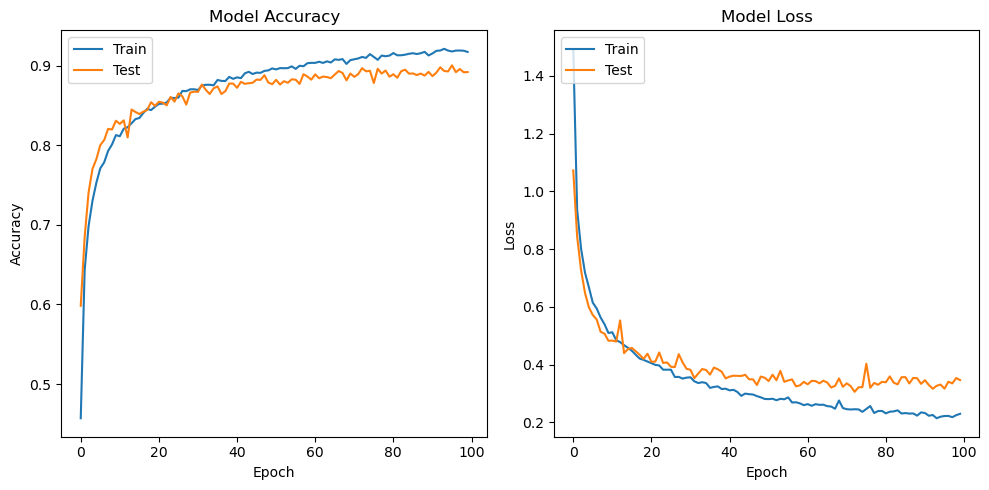

In [23]:
# Importing Required Libraries
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [24]:
em=['angry','sad','neutral','happy','fear','disgust','ps']
     

In [25]:
loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of first model : {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8931 - loss: 0.3454
Restored model, accuracy of first model : 89.20%


# **Second(3CNN+1Faltten) dropout=0.25**

In [28]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

um = Sequential()

um.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
um.add(Activation('relu'))
um.add(Dropout(0.25))
um.add(MaxPooling1D(pool_size=(8)))

um.add(Conv1D(128, 5,padding='same',))                  #2
um.add(Activation('relu'))
um.add(MaxPooling1D(pool_size=(8)))
um.add(Dropout(0.25))

um.add(Conv1D(128, 5,padding='same',))                  #3
um.add(Activation('relu'))
um.add(Dropout(0.25))

um.add(Flatten())
um.add(Dense(8))                                        #4                      
um.add(Activation('softmax'))
# Change the optimizer to Adam
opt = Adam()

C:\Users\samenanc\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
um.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)                   │ (None, 180, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 22, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 2, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,920 (652.03 KB)

 Trainable params: 166,920 (652.03 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
um.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [31]:
umhistory=um.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))
     

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.2536 - loss: 2.5297 - val_accuracy: 0.5008 - val_loss: 1.3018
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.4677 - loss: 1.2970 - val_accuracy: 0.6173 - val_loss: 1.0825
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5562 - loss: 1.0978 - val_accuracy: 0.6637 - val_loss: 0.9138
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.6026 - loss: 0.9827 - val_accuracy: 0.6947 - val_loss: 0.8486
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.6339 - loss: 0.9085 - val_accuracy: 0.7099 - val_loss: 0.7890
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.6567 - loss: 0.8570 - val_accuracy: 0.7262 - val_loss: 0.7673
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.6688 - loss: 0.8306 - val_accuracy: 0.7405 - val_loss: 0.7197
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.6848 - loss: 0

326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.8231 - loss: 0.4604 - val_accuracy: 0.8623 - val_loss: 0.3974
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8286 - loss: 0.4509 - val_accuracy: 0.8689 - val_loss: 0.3929


In [32]:
loss, acc = um.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of second model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8676 - loss: 0.3949
Restored model, accuracy of second model: 86.89%


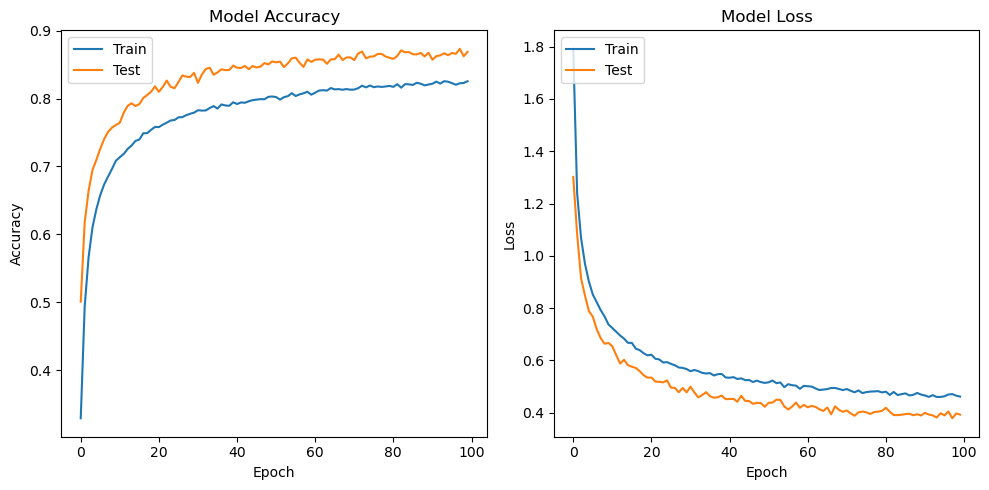

In [33]:
# Importing Required Libraries
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(umhistory.history['accuracy'])
plt.plot(umhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(umhistory.history['loss'])
plt.plot(umhistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# **Third(3CNN+1Faltten) Dropout=0.1**

In [35]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

tm = Sequential()

tm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
tm.add(Activation('relu'))
tm.add(Dropout(0.1))
tm.add(MaxPooling1D(pool_size=(8)))

tm.add(Conv1D(128, 5,padding='same',))                  #2
tm.add(Activation('relu'))
tm.add(MaxPooling1D(pool_size=(8)))
tm.add(Dropout(0.1))

tm.add(Conv1D(128, 5,padding='same',))                  #3
tm.add(Activation('relu'))
tm.add(Dropout(0.1))

tm.add(Flatten())
tm.add(Dense(8))                                        #4                      
tm.add(Activation('softmax'))
# Change the optimizer to Adam
opt = Adam()

C:\Users\samenanc\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
tm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)                   │ (None, 180, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 22, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 2, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,920 (652.03 KB)

 Trainable params: 166,920 (652.03 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
tm.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [38]:
tmhistory=tm.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.2959 - loss: 2.1799 - val_accuracy: 0.5635 - val_loss: 1.1032
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.5587 - loss: 1.0996 - val_accuracy: 0.6760 - val_loss: 0.8658
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6436 - loss: 0.9247 - val_accuracy: 0.7129 - val_loss: 0.7443
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.6921 - loss: 0.7929 - val_accuracy: 0.7527 - val_loss: 0.6822
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.7246 - loss: 0.7101 - val_accuracy: 0.7732 - val_loss: 0.6168
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.7421 - loss: 0.6618 - val_accuracy: 0.7885 - val_loss: 0.5570
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7719 - loss: 0.5946 - val_accuracy: 0.7967 - val_loss: 0.5499
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7824 - loss: 0

326/326 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9107 - loss: 0.2552 - val_accuracy: 0.9084 - val_loss: 0.2694
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9218 - loss: 0.2128 - val_accuracy: 0.9046 - val_loss: 0.2709


In [39]:
loss, acc = tm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of third model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9035 - loss: 0.2731
Restored model, accuracy of third model: 90.46%


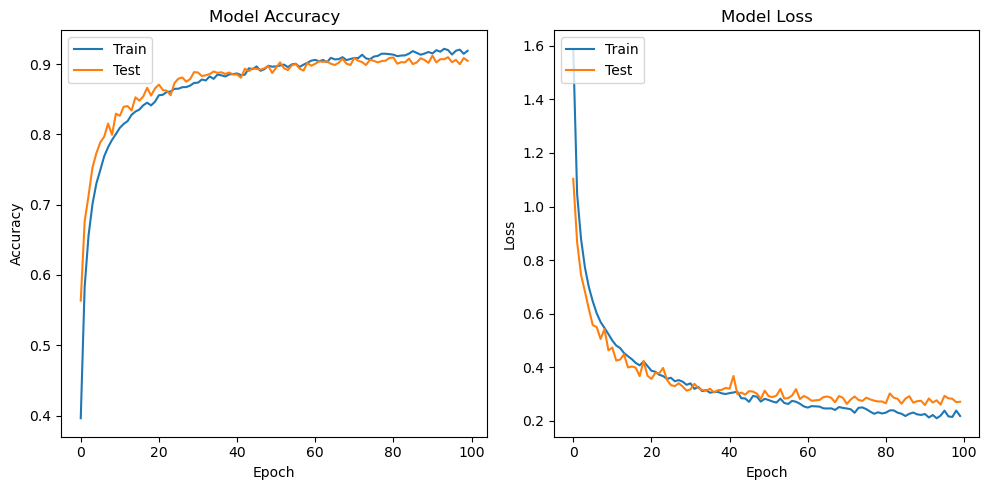

In [40]:
# Importing Required Libraries
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(tmhistory.history['accuracy'])
plt.plot(tmhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(tmhistory.history['loss'])
plt.plot(tmhistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# **Fourth(4CNN+1Faltten)**


In [42]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

sm = Sequential()

sm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm.add(Activation('relu'))
sm.add(Dropout(0.1))
sm.add(MaxPooling1D(pool_size=(8)))

sm.add(Conv1D(128, 5,padding='same',))                  #2
sm.add(Activation('relu'))
sm.add(MaxPooling1D(pool_size=(8)))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #3
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #4
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

sm.add(Flatten())
sm.add(Dense(8))                                        #5                     
sm.add(Activation('softmax'))
# Change the optimizer to Adam
opt = Adam()

C:\Users\samenanc\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [43]:
sm.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_21 (Conv1D)                   │ (None, 180, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_22 (Conv1D)                   │ (None, 22, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_13 (MaxPooling1D)      │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_23 (Conv1D)                   │ (None, 2, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_24 (Conv1D)                   │ (None, 2, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_33 (Activation)           │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_34 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,968 (972.53 KB)

 Trainable params: 248,968 (972.53 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
sm.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [45]:
smhistory=sm.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.2999 - loss: 1.9412 - val_accuracy: 0.5886 - val_loss: 1.0432
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5763 - loss: 1.0415 - val_accuracy: 0.6717 - val_loss: 0.8298
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.6629 - loss: 0.8491 - val_accuracy: 0.7226 - val_loss: 0.7068
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7015 - loss: 0.7491 - val_accuracy: 0.7622 - val_loss: 0.6152
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7340 - loss: 0.6720 - val_accuracy: 0.7908 - val_loss: 0.5521
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7599 - loss: 0.6132 - val_accuracy: 0.8013 - val_loss: 0.5186
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7801 - loss: 0.5694 - val_accuracy: 0.8100 - val_loss: 0.4896
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7923 - loss: 0

326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9193 - loss: 0.2121 - val_accuracy: 0.9038 - val_loss: 0.2569
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9220 - loss: 0.2098 - val_accuracy: 0.9094 - val_loss: 0.2598


In [46]:
loss, acc = sm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of forth model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9069 - loss: 0.2686
Restored model, accuracy of forth model: 90.94%


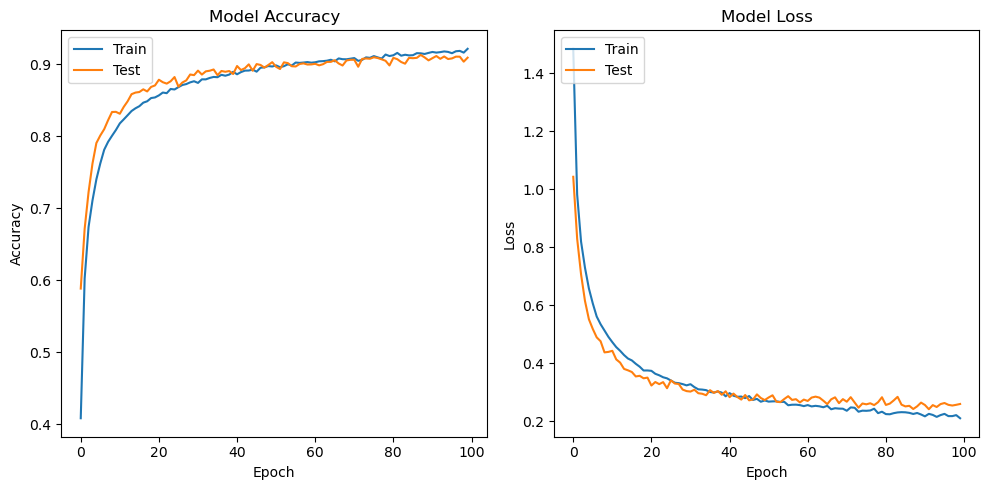

In [47]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(smhistory.history['accuracy'])
plt.plot(smhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(smhistory.history['loss'])
plt.plot(smhistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# **Fifth(3CNN+2LSTM+1Faltten)**

In [49]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

sm = Sequential()

sm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm.add(Activation('relu'))
sm.add(Dropout(0.1))
sm.add(MaxPooling1D(pool_size=(8)))

sm.add(Conv1D(128, 5,padding='same',))                  #2
sm.add(Activation('relu'))
sm.add(MaxPooling1D(pool_size=(8)))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #3
sm.add(Activation('relu'))
sm.add(Dropout(0.1))


# Add LSTM layer with return_sequences=True
sm.add(LSTM(128, return_sequences=True))
sm.add(LSTM(128))

sm.add(Flatten())
sm.add(Dense(8))                                        #5                     
sm.add(Activation('softmax'))
# Change the optimizer to Adam
opt = Adam()
sm.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])



C:\Users\samenanc\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [50]:
sm.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_25 (Conv1D)                   │ (None, 180, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_35 (Activation)           │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_26 (Conv1D)                   │ (None, 22, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 22, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2816)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │          22,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,936 (925.53 KB)

 Trainable params: 236,936 (925.53 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Example modification: Increasing batch size
model1history = sm.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.4145 - loss: 1.4341 - val_accuracy: 0.6279 - val_loss: 0.9135
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.6759 - loss: 0.8117 - val_accuracy: 0.7453 - val_loss: 0.6595
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 29s 89ms/step - accuracy: 0.7507 - loss: 0.6415 - val_accuracy: 0.7798 - val_loss: 0.5718
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.7907 - loss: 0.5368 - val_accuracy: 0.8099 - val_loss: 0.5010
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - accuracy: 0.8194 - loss: 0.4760 - val_accuracy: 0.8151 - val_loss: 0.4975
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 29s 89ms/step - accuracy: 0.8389 - loss: 0.4290 - val_accuracy: 0.8303 - val_loss: 0.4543
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step - accuracy: 0.8470 - loss: 0.4020 - val_accuracy: 0.8522 - val_loss: 0.3921
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step - accuracy: 0.8642 - loss: 0

326/326 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9781 - loss: 0.0624 - val_accuracy: 0.9177 - val_loss: 0.3388
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 29s 89ms/step - accuracy: 0.9803 - loss: 0.0560 - val_accuracy: 0.9204 - val_loss: 0.3403


In [52]:
loss, acc = sm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of forth model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9229 - loss: 0.3376
Restored model, accuracy of forth model: 92.04%


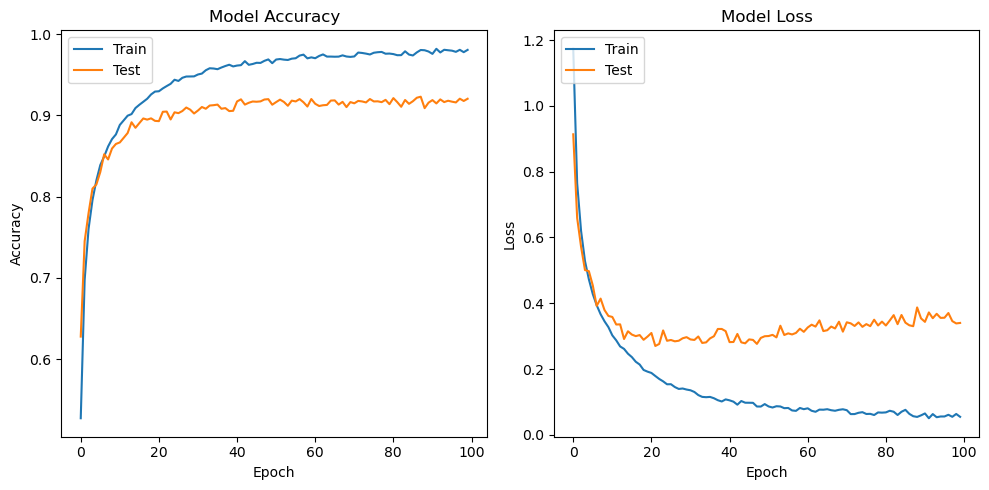

In [53]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(model1history.history['accuracy'])
plt.plot(model1history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(model1history.history['loss'])
plt.plot(model1history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# **Sixth(4CNN+2LSTM+1Faltten)**

In [54]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

sm = Sequential()

sm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm.add(Activation('relu'))
sm.add(Dropout(0.1))
sm.add(MaxPooling1D(pool_size=(8)))

sm.add(Conv1D(128, 5,padding='same',))                  #2
sm.add(Activation('relu'))
sm.add(MaxPooling1D(pool_size=(8)))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #3
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #4
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

# Add LSTM layer with return_sequences=True
sm.add(LSTM(128, return_sequences=True))
sm.add(LSTM(128))

sm.add(Flatten())
sm.add(Dense(8))                                        #5                     
sm.add(Activation('softmax'))
# Change the optimizer to Adam
opt = Adam()
sm.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])



In [55]:
sm.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_27 (Conv1D)                   │ (None, 180, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_28 (Conv1D)                   │ (None, 22, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 22, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_40 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,016 (1.32 MB)

 Trainable params: 347,016 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Example modification: Increasing batch size
model1history = sm.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 50s 131ms/step - accuracy: 0.3503 - loss: 1.5755 - val_accuracy: 0.6191 - val_loss: 0.9722
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.6228 - loss: 0.9485 - val_accuracy: 0.6836 - val_loss: 0.7840
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 43s 133ms/step - accuracy: 0.6894 - loss: 0.7815 - val_accuracy: 0.7367 - val_loss: 0.6638
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.7403 - loss: 0.6542 - val_accuracy: 0.7780 - val_loss: 0.5650
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.7822 - loss: 0.5607 - val_accuracy: 0.7996 - val_loss: 0.5151
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.8039 - loss: 0.5090 - val_accuracy: 0.8168 - val_loss: 0.4768
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.8208 - loss: 0.4665 - val_accuracy: 0.8234 - val_loss: 0.4609
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.8322 -

326/326 ━━━━━━━━━━━━━━━━━━━━ 28s 85ms/step - accuracy: 0.9762 - loss: 0.0685 - val_accuracy: 0.9195 - val_loss: 0.3102
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.9785 - loss: 0.0610 - val_accuracy: 0.9221 - val_loss: 0.3118


In [57]:
loss, acc = sm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of forth model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9218 - loss: 0.3130
Restored model, accuracy of forth model: 92.21%


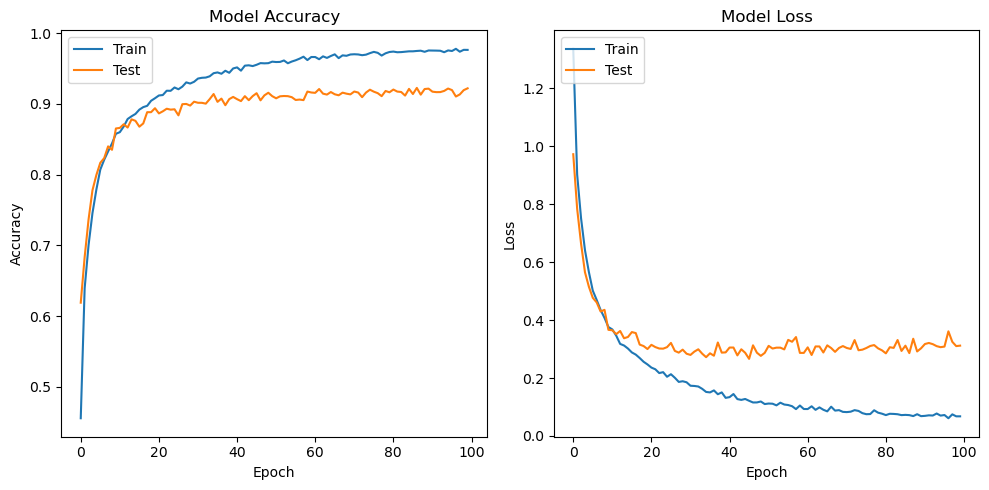

In [58]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(model1history.history['accuracy'])
plt.plot(model1history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(model1history.history['loss'])
plt.plot(model1history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# **Seventh(2CNN+1LSTM+1Faltten)**

In [59]:
from tensorflow.keras.layers import LSTM, TimeDistributed

model1 = Sequential()

model1.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        #1
model1.add(Activation('relu'))
model1.add(Dropout(0.1))
model1.add(MaxPooling1D(pool_size=(8)))

model1.add(Conv1D(128, 5,padding='same',))                           #2
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

# Add LSTM layer with return_sequences=True
model1.add(LSTM(128))

model1.add(Flatten())
model1.add(Dense(8))                                                 #3
model1.add(Activation('softmax'))

# Change the optimizer to Adam
opt = Adam()

model1.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [60]:
model1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_29 (Conv1D)                   │ (None, 180, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_41 (Activation)           │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 180, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_30 (Conv1D)                   │ (None, 22, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_42 (Activation)           │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_31 (Conv1D)                   │ (None, 2, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_43 (Activation)           │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_32 (Conv1D)                   │ (None, 2, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_44 (Activation)           │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 2, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_45 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 380,552 (1.45 MB)

 Trainable params: 380,552 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
smhistory=model1.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.3172 - loss: 1.6267 - val_accuracy: 0.6048 - val_loss: 0.9605
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6086 - loss: 0.9546 - val_accuracy: 0.6552 - val_loss: 0.8797
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6767 - loss: 0.8016 - val_accuracy: 0.7478 - val_loss: 0.6426
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7319 - loss: 0.6756 - val_accuracy: 0.7659 - val_loss: 0.5840
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7565 - loss: 0.6178 - val_accuracy: 0.7907 - val_loss: 0.5379
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7782 - loss: 0.5651 - val_accuracy: 0.8075 - val_loss: 0.5018
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.7912 - loss: 0.5272 - val_accuracy: 0.8099 - val_loss: 0.4878
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8032 - loss: 0

326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9165 - loss: 0.2236 - val_accuracy: 0.9033 - val_loss: 0.2821
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9123 - loss: 0.2313 - val_accuracy: 0.9035 - val_loss: 0.2667


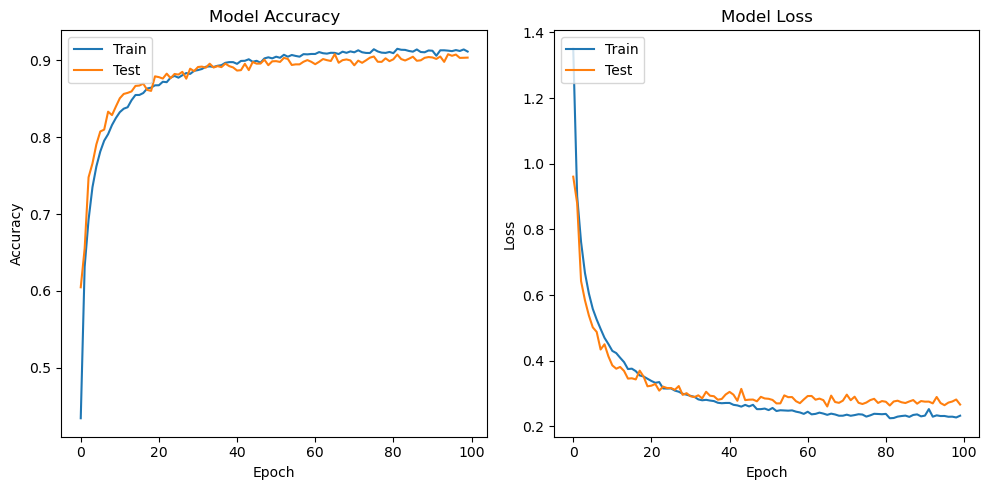

In [62]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(smhistory.history['accuracy'])
plt.plot(smhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(smhistory.history['loss'])
plt.plot(smhistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [63]:
loss, acc = sm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of forth model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9021 - loss: 0.2698
Restored model, accuracy of forth model: 90.35%


# **Eight(2CNN+2LSTM+1Faltten)**

In [64]:
from tensorflow.keras.layers import LSTM, TimeDistributed

model1 = Sequential()

model1.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        #1
model1.add(Activation('relu'))
model1.add(Dropout(0.1))
model1.add(MaxPooling1D(pool_size=(8)))

model1.add(Conv1D(128, 5,padding='same',))                           #2
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

# Add LSTM layer with return_sequences=True
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128))

model1.add(Flatten())
model1.add(Dense(8))                                                 
model1.add(Activation('softmax'))

# Change the optimizer to Adam
opt = Adam()

model1.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])



In [65]:
smhistory=sm.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.2899 - loss: 1.6790 - val_accuracy: 0.5922 - val_loss: 1.0158
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.5910 - loss: 0.9936 - val_accuracy: 0.6768 - val_loss: 0.7941
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.6719 - loss: 0.8110 - val_accuracy: 0.7081 - val_loss: 0.7442
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7223 - loss: 0.7004 - val_accuracy: 0.7402 - val_loss: 0.6483
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7474 - loss: 0.6371 - val_accuracy: 0.7863 - val_loss: 0.5649
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7694 - loss: 0.5835 - val_accuracy: 0.7990 - val_loss: 0.5225
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7838 - loss: 0.5513 - val_accuracy: 0.8213 - val_loss: 0.4659
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8000 - loss: 0

326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9136 - loss: 0.2304 - val_accuracy: 0.9052 - val_loss: 0.2697
Epoch 100/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9162 - loss: 0.2263 - val_accuracy: 0.9038 - val_loss: 0.2687


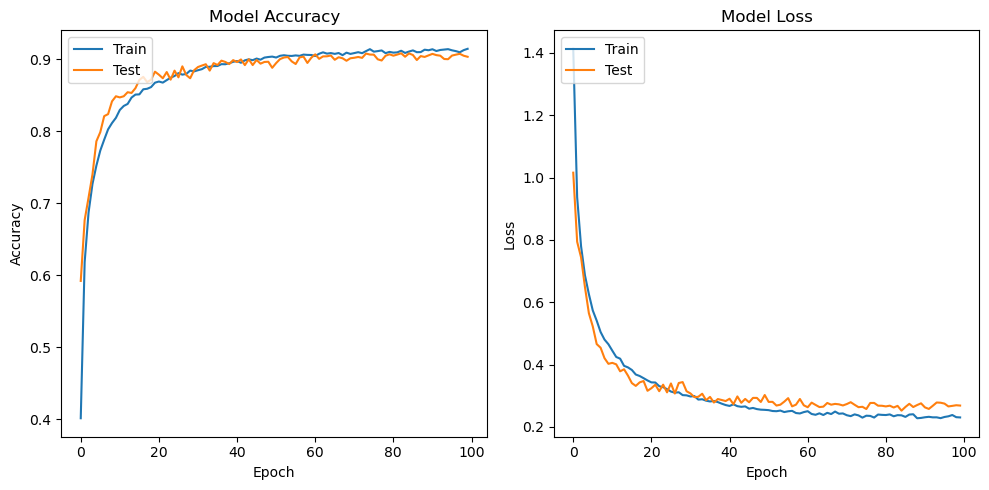

In [66]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(smhistory.history['accuracy'])
plt.plot(smhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(smhistory.history['loss'])
plt.plot(smhistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [67]:
loss, acc = sm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of forth model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9059 - loss: 0.2655
Restored model, accuracy of forth model: 90.38%
